# Multi-variate Linear Regression on Boston Dataset

In [1]:
# This is a code to implement multivariate linear regression on boston dataset from scratch

# ===================================Importing libraries====================================
import numpy as np                              #for handling arrays and matrices
import pandas as pd                             #for working with datasets and dataframes
from matplotlib import pyplot as plt            #for visualisation purposes
from sklearn.datasets import load_boston        #importing the boston dataset from scikit-learn  

from sklearn.linear_model import LinearRegression  #to compare our results with standard library results
from sklearn.model_selection import train_test_split #to split the dataset into test and train 

In [2]:
# loading dataset from sklearn
dataset = load_boston()         #loading the contents of the dictionary-dataset into 'dataset'
print(dataset.keys())           #displaying the keys of the dictionary dataset

#=====================================DATASET INFORMATION===================================
#data-input data
#target- results of each sample stored in the target variable
#feature_names- attribute names/column names in the input data
#DESCR- description of the dataset

print(dataset['feature_names'])     #printing the names of the features

print(dataset.data.shape)           #printing the shape (dimensional size) of the input data
print(dataset.target.shape)         #printing the size of target variable
print(dataset.DESCR)                #describing the dataset

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

In [3]:
# storing features in x and target variable in y
x = dataset.data
y = dataset.target

y = y.reshape(y.shape[0], 1)

# converting into a dataframe
df = pd.DataFrame(x)
df.columns = dataset.feature_names
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
#adding target variable to our dataframe
df['PRICE'] = y

# ============finding correlation between attributes and target variable===============
print(np.corrcoef(np.transpose(df))[-1, :])

df.head()

[-0.38583169  0.36044534 -0.48372516  0.17526018 -0.42732077  0.69535995
 -0.37695457  0.24992873 -0.38162623 -0.46853593 -0.50778669  0.33346082
 -0.73766273  1.        ]


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [6]:
# ============================ normalising the dataset=========================

df =(df - df.mean()) / df.std()
df.head()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.417300  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1 -0.414859 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2 -0.414861 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3 -0.414270 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4 -0.410003 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   

        DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
0  0.140075 -0.981871 -0.665949 -1.457558  0.440616 -1.074499  0.159528  
1  0.556609 -0.867024 -0.986353 -0.302794  0.440616 -0.491953 -0.101424  
2  0.556609 -0.867024 -0.986353 -0.302794  0.396035 -1.207532  1.322937  
3  1.076671 -0.752178 -1.105022  0.112920  0.415751 -1.360171  1.181589  
4  1.076671 -0.752178 -1.105022  0.112920  0.440616 -1.025487  1.486032

In [7]:
#=============================== MULTI-VARIATE LINEAR REGRESSION ========================

# ============================== INITIALISING HYPER-PARAMETERS =========================
# Hyper-parameters for a multi-variate linear regression are: 
#  1. Theta (weights) which describe the line
#  2. epochs- number of times we run our linear regression to minimise the loss
#  3. alpha- the learning rate


# initialising theta with zeros 
theta = np.zeros((1, x.shape[1] + 1)) #its dimensions are (1,14) because of the presence of a bias term (intercept)
print(theta.shape)
print(theta)

#Both epoch and alpha can be changed and tested on different numbers 
# to minimise loss at a different rate(Advisable)
epoch = 100000
alpha = 0.000001 

# creating bias vector x0
x0 = np.ones((x.shape[0], 1))

# forming input variable
X = np.concatenate((x0, x), axis = 1)
print(X.shape)

(1, 14)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(506, 14)


In [8]:
# ======================splitting the data into train and test===========================

def train_test_splitt(dataset, ratio = 0.7):
    m = len(df)
    
    #if ratio to be divided is given in percentage, multiply with 0.01
    if ratio > 1:
        train_ratio = int(ratio * 0.01 * m)
    else:
        train_ratio = int(ratio * m)

    x_train = dataset[:train_ratio, :-1]
    x_test = dataset[train_ratio: , :-1]
    
    y_train = dataset[:train_ratio, -1:]
    y_test = dataset[train_ratio: , -1:]
    
    return x_train, x_test, y_train, y_test

# data = np.concatenate((X, y), axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# x_train, x_test, y_train, y_test = train_test_split(data)
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

print(df.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 14)
(354, 14)
(152, 14)
(354, 1)
(152, 1)


In [9]:
# ================================ DEFINING COST FUNCTION ================================
def cost_function(X, y, theta):
    h = X.dot(theta.T)
    loss = h - y
    return np.sum(loss ** 2)/ (2 * len(X))

# For testing the function
cost = cost_function(x_train, y_train, theta)
print(cost)

308.8122316384181


In [10]:
# ============================ DEFINING GRADIENT DESCENT =========================
def grad_descent(X, y, theta, alpha):
    h = X.dot(theta.T)
    loss = h - y
    dj = (loss.T).dot(X)
    theta = theta - (alpha/len(X)) * dj
    return theta

# For testing the function 
cost = cost_function(x_train, y_train, theta)
print("Cost before: ", cost)

theta = grad_descent(x_train, y_train, theta, 0.0000001)

cost = cost_function(x_train, y_train, theta)
print("Cost after: ", cost)

Cost before:  308.8122316384181
Cost after:  293.9748649185804


In [11]:
# ========================== DEFINING OUR LINEAR REGRESSION =========================
def linear_reg(epoch, X, y, theta, alpha):
    for ep in range(epoch):
        
        #calculate new theta
        theta = grad_descent(X, y, theta, alpha)
        
        #compute new loss
        loss = cost_function(X, y, theta)
        print("Cost function: ", loss)
        
    return theta

theta = linear_reg(epoch, x_train, y_train, theta, alpha)

Cost function:  174.5423273098458
Cost function:  117.76124665361907
Cost function:  90.47124747892367
Cost function:  77.07607517656588
Cost function:  70.23981394284262
Cost function:  66.51137800220695
Cost function:  64.2667369556045
Cost function:  62.741156109527495
Cost function:  61.57406366188878
Cost function:  60.595002959832996
Cost function:  59.722965536763276
Cost function:  58.9190464485983
Cost function:  58.16417680368044
Cost function:  57.448649998556085
Cost function:  56.7671945209823
Cost function:  56.116655329679624
Cost function:  55.49490209077319
Cost function:  54.90031445457542
Cost function:  54.33153876590878
Cost function:  53.787372480727555
Cost function:  53.26670869277906
Cost function:  52.76850897803664
Cost function:  52.29178960311077
Cost function:  51.83561406295807
Cost function:  51.39908863760106
Cost function:  50.98135940921255
Cost function:  50.58161000478376
Cost function:  50.19905971712903
Cost function:  49.83296183930924
Cost funct

Cost function:  41.09395762216696
Cost function:  41.090860291959046
Cost function:  41.08776601144083
Cost function:  41.08467474628627
Cost function:  41.08158646353737
Cost function:  41.07850113154496
Cost function:  41.075418719912015
Cost function:  41.07233919943955
Cost function:  41.069262542074675
Cost function:  41.066188720861106
Cost function:  41.06311770989169
Cost function:  41.060049484263025
Cost function:  41.056984020032075
Cost function:  41.053921294174664
Cost function:  41.05086128454571
Cost function:  41.0478039698413
Cost function:  41.04474932956228
Cost function:  41.041697343979536
Cost function:  41.038647994100735
Cost function:  41.03560126163848
Cost function:  41.03255712897991
Cost function:  41.02951557915756
Cost function:  41.02647659582156
Cost function:  41.02344016321296
Cost function:  41.02040626613825
Cost function:  41.01737488994498
Cost function:  41.01434602049847
Cost function:  41.01131964415951
Cost function:  41.00829574776294
Cost f

Cost function:  40.39152346342488
Cost function:  40.38894194718675
Cost function:  40.386362148273186
Cost function:  40.383784064654805
Cost function:  40.38120769430518
Cost function:  40.37863303520077
Cost function:  40.376060085320994
Cost function:  40.373488842648165
Cost function:  40.37091930516753
Cost function:  40.36835147086721
Cost function:  40.36578533773826
Cost function:  40.36322090377461
Cost function:  40.36065816697308
Cost function:  40.358097125333394
Cost function:  40.35553777685814
Cost function:  40.35298011955278
Cost function:  40.35042415142565
Cost function:  40.34786987048796
Cost function:  40.345317274753775
Cost function:  40.34276636224
Cost function:  40.34021713096641
Cost function:  40.33766957895562
Cost function:  40.33512370423307
Cost function:  40.33257950482707
Cost function:  40.330036978768725
Cost function:  40.327496124092
Cost function:  40.32495693883364
Cost function:  40.32241942103323
Cost function:  40.31988356873319
Cost functio

Cost function:  39.649620038374046
Cost function:  39.647494902897506
Cost function:  39.64537096625626
Cost function:  39.64324822715094
Cost function:  39.64112668428394
Cost function:  39.639006336359465
Cost function:  39.63688718208348
Cost function:  39.634769220163705
Cost function:  39.63265244930968
Cost function:  39.63053686823268
Cost function:  39.62842247564576
Cost function:  39.62630927026373
Cost function:  39.624197250803164
Cost function:  39.6220864159824
Cost function:  39.61997676452153
Cost function:  39.617868295142394
Cost function:  39.61576100656859
Cost function:  39.613654897525464
Cost function:  39.6115499667401
Cost function:  39.60944621294133
Cost function:  39.607343634859724
Cost function:  39.605242231227585
Cost function:  39.60314200077895
Cost function:  39.60104294224963
Cost function:  39.59894505437709
Cost function:  39.59684833590056
Cost function:  39.59475278556102
Cost function:  39.59265840210114
Cost function:  39.5905651842653
Cost fun

Cost function:  39.055151383480236
Cost function:  39.05333737433644
Cost function:  39.0515242407478
Cost function:  39.049711981848276
Cost function:  39.04790059677292
Cost function:  39.04609008465795
Cost function:  39.04428044464065
Cost function:  39.04247167585948
Cost function:  39.040663777454
Cost function:  39.03885674856489
Cost function:  39.03705058833396
Cost function:  39.0352452959041
Cost function:  39.033440870419355
Cost function:  39.03163731102486
Cost function:  39.029834616866864
Cost function:  39.028032787092734
Cost function:  39.02623182085093
Cost function:  39.02443171729104
Cost function:  39.022632475563725
Cost function:  39.02083409482077
Cost function:  39.019036574215065
Cost function:  39.01723991290059
Cost function:  39.01544411003242
Cost function:  39.01364916476672
Cost function:  39.01185507626077
Cost function:  39.010061843672936
Cost function:  39.008269466162666
Cost function:  39.0064779428905
Cost function:  39.004687273018064
Cost func

Cost function:  38.45890345531354
Cost function:  38.457353830621706
Cost function:  38.45580483344545
Cost function:  38.45425646323113
Cost function:  38.45270871942579
Cost function:  38.45116160147716
Cost function:  38.44961510883363
Cost function:  38.44806924094422
Cost function:  38.44652399725868
Cost function:  38.44497937722736
Cost function:  38.44343538030134
Cost function:  38.44189200593228
Cost function:  38.44034925357258
Cost function:  38.43880712267524
Cost function:  38.43726561269398
Cost function:  38.435724723083126
Cost function:  38.434184453297675
Cost function:  38.432644802793305
Cost function:  38.43110577102632
Cost function:  38.429567357453685
Cost function:  38.42802956153304
Cost function:  38.42649238272264
Cost function:  38.424955820481436
Cost function:  38.423419874269
Cost function:  38.42188454354556
Cost function:  38.42034982777201
Cost function:  38.418815726409846
Cost function:  38.417282238921274
Cost function:  38.4157493647691
Cost func

Cost function:  37.966298468309915
Cost function:  37.96493369043245
Cost function:  37.963569385273935
Cost function:  37.962205552461015
Cost function:  37.96084219162073
Cost function:  37.95947930238055
Cost function:  37.95811688436836
Cost function:  37.95675493721245
Cost function:  37.95539346054154
Cost function:  37.95403245398475
Cost function:  37.952671917171614
Cost function:  37.95131184973208
Cost function:  37.94995225129649
Cost function:  37.948593121495634
Cost function:  37.947234459960676
Cost function:  37.94587626632322
Cost function:  37.944518540215235
Cost function:  37.94316128126915
Cost function:  37.94180448911778
Cost function:  37.94044816339432
Cost function:  37.939092303732416
Cost function:  37.9377369097661
Cost function:  37.936381981129806
Cost function:  37.93502751745837
Cost function:  37.93367351838705
Cost function:  37.9323199835515
Cost function:  37.93096691258778
Cost function:  37.92961430513232
Cost function:  37.92826216082201
Cost fu

Cost function:  37.512646960475244
Cost function:  37.51142818761334
Cost function:  37.5102097781153
Cost function:  37.50899173172439
Cost function:  37.507774048184174
Cost function:  37.50655672723843
Cost function:  37.505339768631245
Cost function:  37.50412317210691
Cost function:  37.502906937410046
Cost function:  37.50169106428545
Cost function:  37.50047555247826
Cost function:  37.49926040173381
Cost function:  37.498045611797714
Cost function:  37.496831182415846
Cost function:  37.495617113334326
Cost function:  37.494403404299554
Cost function:  37.49319005505817
Cost function:  37.49197706535706
Cost function:  37.49076443494338
Cost function:  37.48955216356454
Cost function:  37.4883402509682
Cost function:  37.48712869690229
Cost function:  37.48591750111496
Cost function:  37.48470666335465
Cost function:  37.48349618337004
Cost function:  37.48228606091006
Cost function:  37.4810762957239
Cost function:  37.479866887561
Cost function:  37.47865783617104
Cost functi

Cost function:  37.08453906242341
Cost function:  37.08343915738562
Cost function:  37.08233953603368
Cost function:  37.08124019818795
Cost function:  37.080141143668946
Cost function:  37.07904237229736
Cost function:  37.07794388389404
Cost function:  37.07684567827998
Cost function:  37.07574775527638
Cost function:  37.07465011470457
Cost function:  37.07355275638606
Cost function:  37.07245568014251
Cost function:  37.07135888579574
Cost function:  37.070262373167765
Cost function:  37.06916614208072
Cost function:  37.068070192356934
Cost function:  37.066974523818885
Cost function:  37.065879136289226
Cost function:  37.06478402959073
Cost function:  37.06368920354639
Cost function:  37.062594657979325
Cost function:  37.06150039271282
Cost function:  37.06040640757033
Cost function:  37.059312702375465
Cost function:  37.05821927695199
Cost function:  37.05712613112383
Cost function:  37.0560332647151
Cost function:  37.05494067755003
Cost function:  37.05384836945304
Cost fun

Cost function:  36.80143724424617
Cost function:  36.800406941383216
Cost function:  36.799376879666454
Cost function:  36.79834705895391
Cost function:  36.79731747910371
Cost function:  36.79628813997412
Cost function:  36.79525904142353
Cost function:  36.79423018331041
Cost function:  36.7932015654934
Cost function:  36.792173187831224
Cost function:  36.79114505018276
Cost function:  36.790117152406985
Cost function:  36.789089494363
Cost function:  36.78806207591
Cost function:  36.78703489690736
Cost function:  36.78600795721452
Cost function:  36.784981256691054
Cost function:  36.78395479519668
Cost function:  36.7829285725912
Cost function:  36.78190258873456
Cost function:  36.78087684348681
Cost function:  36.77985133670812
Cost function:  36.77882606825879
Cost function:  36.77780103799923
Cost function:  36.776776245789975
Cost function:  36.77575169149167
Cost function:  36.774727374965074
Cost function:  36.773703296071076
Cost function:  36.77267945467069
Cost function

Cost function:  36.46991010268332
Cost function:  36.46895312893122
Cost function:  36.46799635489067
Cost function:  36.46703978045365
Cost function:  36.46608340551219
Cost function:  36.465127229958405
Cost function:  36.46417125368452
Cost function:  36.46321547658282
Cost function:  36.46225989854569
Cost function:  36.461304519465564
Cost function:  36.46034933923504
Cost function:  36.45939435774671
Cost function:  36.45843957489329
Cost function:  36.45748499056759
Cost function:  36.45653060466249
Cost function:  36.455576417070965
Cost function:  36.45462242768605
Cost function:  36.453668636400884
Cost function:  36.45271504310868
Cost function:  36.451761647702746
Cost function:  36.45080845007646
Cost function:  36.449855450123295
Cost function:  36.44890264773679
Cost function:  36.44795004281059
Cost function:  36.44699763523841
Cost function:  36.44604542491403
Cost function:  36.44509341173137
Cost function:  36.44414159558436
Cost function:  36.44318997636706
Cost fun

Cost function:  36.17511817292649
Cost function:  36.17421967787467
Cost function:  36.17332135202811
Cost function:  36.172423195301874
Cost function:  36.17152520761106
Cost function:  36.17062738887086
Cost function:  36.169729738996494
Cost function:  36.16883225790328
Cost function:  36.16793494550657
Cost function:  36.1670378017218
Cost function:  36.16614082646442
Cost function:  36.165244019650004
Cost function:  36.16434738119416
Cost function:  36.16345091101255
Cost function:  36.16255460902091
Cost function:  36.16165847513502
Cost function:  36.160762509270754
Cost function:  36.15986671134401
Cost function:  36.15897108127076
Cost function:  36.15807561896706
Cost function:  36.157180324348985
Cost function:  36.15628519733271
Cost function:  36.15539023783445
Cost function:  36.15449544577049
Cost function:  36.15360082105717
Cost function:  36.15270636361088
Cost function:  36.1518120733481
Cost function:  36.150917950185345
Cost function:  36.150023994039195
Cost func

Cost function:  35.901744166327106
Cost function:  35.900894777122225
Cost function:  35.9000455332903
Cost function:  35.899196434763276
Cost function:  35.89834748147311
Cost function:  35.89749867335181
Cost function:  35.89665001033145
Cost function:  35.895801492344134
Cost function:  35.894953119322025
Cost function:  35.894104891197316
Cost function:  35.89325680790226
Cost function:  35.89240886936916
Cost function:  35.89156107553036
Cost function:  35.89071342631823
Cost function:  35.88986592166522
Cost function:  35.8890185615038
Cost function:  35.888171345766516
Cost function:  35.88732427438591
Cost function:  35.88647734729464
Cost function:  35.885630564425334
Cost function:  35.884783925710735
Cost function:  35.88393743108358
Cost function:  35.88309108047668
Cost function:  35.88224487382289
Cost function:  35.88139881105509
Cost function:  35.880552892106245
Cost function:  35.879707116909316
Cost function:  35.87886148539735
Cost function:  35.87801599750342
Cost 

Cost function:  35.70191120809818
Cost function:  35.701094857019605
Cost function:  35.70027863622832
Cost function:  35.69946254566641
Cost function:  35.69864658527595
Cost function:  35.697830754999096
Cost function:  35.69701505477802
Cost function:  35.69619948455493
Cost function:  35.695384044272096
Cost function:  35.694568733871805
Cost function:  35.693753553296375
Cost function:  35.69293850248818
Cost function:  35.69212358138963
Cost function:  35.691308789943164
Cost function:  35.69049412809126
Cost function:  35.68967959577644
Cost function:  35.68886519294126
Cost function:  35.68805091952831
Cost function:  35.68723677548022
Cost function:  35.68642276073967
Cost function:  35.68560887524936
Cost function:  35.68479511895203
Cost function:  35.68398149179048
Cost function:  35.683167993707514
Cost function:  35.68235462464599
Cost function:  35.681541384548815
Cost function:  35.6807282733589
Cost function:  35.679915291019235
Cost function:  35.679102437472814
Cost 

Cost function:  35.413703601124205
Cost function:  35.412931018530415
Cost function:  35.41215854747271
Cost function:  35.41138618790515
Cost function:  35.410613939781875
Cost function:  35.40984180305701
Cost function:  35.40906977768473
Cost function:  35.408297863619225
Cost function:  35.407526060814746
Cost function:  35.406754369225524
Cost function:  35.40598278880587
Cost function:  35.40521131951008
Cost function:  35.404439961292496
Cost function:  35.403668714107496
Cost function:  35.40289757790948
Cost function:  35.40212655265286
Cost function:  35.40135563829212
Cost function:  35.40058483478172
Cost function:  35.39981414207617
Cost function:  35.39904356013003
Cost function:  35.39827308889786
Cost function:  35.39750272833425
Cost function:  35.396732478393844
Cost function:  35.39596233903128
Cost function:  35.395192310201246
Cost function:  35.39442239185844
Cost function:  35.393652583957625
Cost function:  35.392882886453556
Cost function:  35.392113299301016
C

Cost function:  35.226901001220234
Cost function:  35.22615453998448
Cost function:  35.22540817980279
Cost function:  35.22466192063572
Cost function:  35.2239157624438
Cost function:  35.22316970518761
Cost function:  35.22242374882775
Cost function:  35.22167789332483
Cost function:  35.220932138639505
Cost function:  35.22018648473244
Cost function:  35.219440931564336
Cost function:  35.218695479095906
Cost function:  35.21795012728789
Cost function:  35.21720487610104
Cost function:  35.216459725496165
Cost function:  35.21571467543407
Cost function:  35.21496972587557
Cost function:  35.21422487678155
Cost function:  35.21348012811288
Cost function:  35.21273547983047
Cost function:  35.21199093189526
Cost function:  35.21124648426818
Cost function:  35.21050213691022
Cost function:  35.20975788978239
Cost function:  35.20901374284569
Cost function:  35.20826969606118
Cost function:  35.207525749389944
Cost function:  35.20678190279306
Cost function:  35.20603815623165
Cost func

Cost function:  34.84523901043332
Cost function:  34.844541028877394
Cost function:  34.84384313044932
Cost function:  34.84314531512018
Cost function:  34.84244758286106
Cost function:  34.84174993364307
Cost function:  34.84105236743735
Cost function:  34.84035488421501
Cost function:  34.83965748394723
Cost function:  34.83896016660517
Cost function:  34.83826293216003
Cost function:  34.83756578058302
Cost function:  34.83686871184534
Cost function:  34.83617172591825
Cost function:  34.83547482277301
Cost function:  34.83477800238088
Cost function:  34.83408126471315
Cost function:  34.83338460974113
Cost function:  34.832688037436135
Cost function:  34.83199154776951
Cost function:  34.83129514071261
Cost function:  34.8305988162368
Cost function:  34.829902574313465
Cost function:  34.82920641491402
Cost function:  34.82851033800986
Cost function:  34.82781434357245
Cost function:  34.82711843157323
Cost function:  34.82642260198366
Cost function:  34.82572685477523
Cost functio

Cost function:  34.57305720827576
Cost function:  34.57239026092024
Cost function:  34.57172338635628
Cost function:  34.57105658456079
Cost function:  34.57038985551066
Cost function:  34.56972319918278
Cost function:  34.569056615554075
Cost function:  34.56839010460146
Cost function:  34.56772366630189
Cost function:  34.5670573006323
Cost function:  34.56639100756967
Cost function:  34.56572478709097
Cost function:  34.565058639173195
Cost function:  34.564392563793355
Cost function:  34.56372656092846
Cost function:  34.563060630555526
Cost function:  34.562394772651615
Cost function:  34.56172898719378
Cost function:  34.561063274159075
Cost function:  34.56039763352458
Cost function:  34.5597320652674
Cost function:  34.559066569364624
Cost function:  34.55840114579339
Cost function:  34.5577357945308
Cost function:  34.557070515554024
Cost function:  34.5564053088402
Cost function:  34.5557401743665
Cost function:  34.555075112110096
Cost function:  34.55441012204819
Cost funct

Cost function:  34.327864704404035
Cost function:  34.32722353710118
Cost function:  34.326582434744886
Cost function:  34.325941397316264
Cost function:  34.32530042479646
Cost function:  34.324659517166616
Cost function:  34.3240186744079
Cost function:  34.323377896501455
Cost function:  34.322737183428494
Cost function:  34.322096535170175
Cost function:  34.321455951707705
Cost function:  34.32081543302228
Cost function:  34.320174979095135
Cost function:  34.31953458990749
Cost function:  34.31889426544058
Cost function:  34.31825400567566
Cost function:  34.317613810593976
Cost function:  34.3169736801768
Cost function:  34.316333614405416
Cost function:  34.3156936132611
Cost function:  34.31505367672514
Cost function:  34.31441380477887
Cost function:  34.31377399740358
Cost function:  34.31313425458062
Cost function:  34.31249457629131
Cost function:  34.311854962517
Cost function:  34.31121541323906
Cost function:  34.31057592843884
Cost function:  34.309936508097714
Cost fu

Cost function:  34.1476909716091
Cost function:  34.147067587020224
Cost function:  34.146444262382964
Cost function:  34.14582099768107
Cost function:  34.1451977928983
Cost function:  34.14457464801844
Cost function:  34.14395156302525
Cost function:  34.14332853790252
Cost function:  34.14270557263406
Cost function:  34.14208266720365
Cost function:  34.14145982159511
Cost function:  34.14083703579227
Cost function:  34.14021430977897
Cost function:  34.13959164353902
Cost function:  34.13896903705627
Cost function:  34.13834649031459
Cost function:  34.13772400329783
Cost function:  34.13710157598986
Cost function:  34.13647920837457
Cost function:  34.13585690043583
Cost function:  34.13523465215756
Cost function:  34.134612463523645
Cost function:  34.133990334517996
Cost function:  34.13336826512455
Cost function:  34.13274625532723
Cost function:  34.13212430510996
Cost function:  34.131502414456705
Cost function:  34.1308805833514
Cost function:  34.13025881177803
Cost functio

Cost function:  33.98332695566969
Cost function:  33.98271902663202
Cost function:  33.982111153491914
Cost function:  33.98150333623522
Cost function:  33.980895574847764
Cost function:  33.98028786931539
Cost function:  33.979680219623965
Cost function:  33.97907262575934
Cost function:  33.97846508770738
Cost function:  33.977857605453956
Cost function:  33.97725017898495
Cost function:  33.976642808286265
Cost function:  33.97603549334378
Cost function:  33.97542823414341
Cost function:  33.974821030671045
Cost function:  33.97421388291263
Cost function:  33.97360679085406
Cost function:  33.97299975448129
Cost function:  33.97239277378024
Cost function:  33.97178584873687
Cost function:  33.97117897933713
Cost function:  33.97057216556697
Cost function:  33.96996540741236
Cost function:  33.969358704859275
Cost function:  33.96875205789371
Cost function:  33.968145466501625
Cost function:  33.967538930669036
Cost function:  33.96693245038193
Cost function:  33.96632602562634
Cost 

Cost function:  33.82295187466328
Cost function:  33.82235838874814
Cost function:  33.82176495518906
Cost function:  33.82117157397363
Cost function:  33.82057824508946
Cost function:  33.819984968524174
Cost function:  33.81939174426536
Cost function:  33.818798572300686
Cost function:  33.81820545261774
Cost function:  33.81761238520419
Cost function:  33.81701937004766
Cost function:  33.81642640713581
Cost function:  33.815833496456285
Cost function:  33.81524063799676
Cost function:  33.814647831744885
Cost function:  33.81405507768834
Cost function:  33.813462375814815
Cost function:  33.81286972611198
Cost function:  33.81227712856754
Cost function:  33.81168458316917
Cost function:  33.81109208990461
Cost function:  33.810499648761535
Cost function:  33.80990725972768
Cost function:  33.809314922790755
Cost function:  33.8087226379385
Cost function:  33.80813040515864
Cost function:  33.807538224438915
Cost function:  33.80694609576707
Cost function:  33.80635401913087
Cost fu

Cost function:  33.61604198686545
Cost function:  33.61546630278596
Cost function:  33.61489066702945
Cost function:  33.61431507958545
Cost function:  33.61373954044355
Cost function:  33.61316404959328
Cost function:  33.61258860702422
Cost function:  33.61201321272595
Cost function:  33.611437866688036
Cost function:  33.61086256890005
Cost function:  33.610287319351606
Cost function:  33.60971211803227
Cost function:  33.60913696493165
Cost function:  33.60856186003933
Cost function:  33.60798680334495
Cost function:  33.607411794838086
Cost function:  33.60683683450837
Cost function:  33.606261922345425
Cost function:  33.60568705833887
Cost function:  33.60511224247834
Cost function:  33.604537474753464
Cost function:  33.603962755153894
Cost function:  33.60338808366926
Cost function:  33.60281346028923
Cost function:  33.60223888500344
Cost function:  33.60166435780156
Cost function:  33.601089878673264
Cost function:  33.6005154476082
Cost function:  33.59994106459606
Cost fun

Cost function:  33.47134351114197
Cost function:  33.4707797782776
Cost function:  33.47021609123401
Cost function:  33.4696524500019
Cost function:  33.46908885457198
Cost function:  33.46852530493501
Cost function:  33.467961801081685
Cost function:  33.46739834300276
Cost function:  33.466834930689
Cost function:  33.46627156413113
Cost function:  33.4657082433199
Cost function:  33.465144968246086
Cost function:  33.46458173890042
Cost function:  33.46401855527368
Cost function:  33.46345541735664
Cost function:  33.46289232514007
Cost function:  33.46232927861474
Cost function:  33.46176627777144
Cost function:  33.461203322600944
Cost function:  33.460640413094055
Cost function:  33.460077549241554
Cost function:  33.45951473103425
Cost function:  33.45895195846293
Cost function:  33.45838923151842
Cost function:  33.45782655019152
Cost function:  33.457263914473046
Cost function:  33.456701324353816
Cost function:  33.456138779824656
Cost function:  33.45557628087639
Cost functi

Cost function:  33.325185459738236
Cost function:  33.32463342686935
Cost function:  33.324081437529244
Cost function:  33.323529491709685
Cost function:  33.32297758940244
Cost function:  33.32242573059928
Cost function:  33.321873915291974
Cost function:  33.32132214347229
Cost function:  33.320770415132
Cost function:  33.320218730262916
Cost function:  33.319667088856804
Cost function:  33.31911549090545
Cost function:  33.31856393640066
Cost function:  33.31801242533421
Cost function:  33.31746095769792
Cost function:  33.31690953348359
Cost function:  33.31635815268302
Cost function:  33.31580681528803
Cost function:  33.31525552129043
Cost function:  33.31470427068204
Cost function:  33.31415306345468
Cost function:  33.313601899600194
Cost function:  33.313050779110384
Cost function:  33.312499701977096
Cost function:  33.311948668192166
Cost function:  33.311397677747436
Cost function:  33.31084673063475
Cost function:  33.31029582684596
Cost function:  33.309744966372904
Cost

Cost function:  33.15394548435598
Cost function:  33.15340673256476
Cost function:  33.152868021885105
Cost function:  33.152329352309806
Cost function:  33.15179072383169
Cost function:  33.15125213644359
Cost function:  33.15071359013832
Cost function:  33.150175084908696
Cost function:  33.14963662074757
Cost function:  33.14909819764777
Cost function:  33.14855981560212
Cost function:  33.14802147460347
Cost function:  33.14748317464466
Cost function:  33.146944915718535
Cost function:  33.14640669781794
Cost function:  33.14586852093574
Cost function:  33.14533038506478
Cost function:  33.14479229019791
Cost function:  33.14425423632802
Cost function:  33.14371622344793
Cost function:  33.143178251550545
Cost function:  33.14264032062871
Cost function:  33.142102430675315
Cost function:  33.14156458168323
Cost function:  33.141026773645336
Cost function:  33.1404890065545
Cost function:  33.139951280403636
Cost function:  33.13941359518561
Cost function:  33.13887595089332
Cost fu

Cost function:  33.023163161415894
Cost function:  33.022634274370596
Cost function:  33.0221054267641
Cost function:  33.021576618589904
Cost function:  33.02104784984154
Cost function:  33.020519120512525
Cost function:  33.01999043059637
Cost function:  33.01946178008664
Cost function:  33.018933168976815
Cost function:  33.01840459726047
Cost function:  33.01787606493111
Cost function:  33.01734757198229
Cost function:  33.01681911840754
Cost function:  33.016290704200415
Cost function:  33.01576232935445
Cost function:  33.01523399386321
Cost function:  33.014705697720224
Cost function:  33.01417744091905
Cost function:  33.01364922345325
Cost function:  33.01312104531639
Cost function:  33.01259290650201
Cost function:  33.012064807003696
Cost function:  33.011536746815004
Cost function:  33.0110087259295
Cost function:  33.01048074434077
Cost function:  33.00995280204237
Cost function:  33.0094248990279
Cost function:  33.008897035290914
Cost function:  33.008369210825016
Cost f

Cost function:  32.795198710942145
Cost function:  32.79468651251393
Cost function:  32.79417435092025
Cost function:  32.79366222615566
Cost function:  32.79315013821473
Cost function:  32.792638087091994
Cost function:  32.792126072782025
Cost function:  32.79161409527938
Cost function:  32.79110215457861
Cost function:  32.7905902506743
Cost function:  32.790078383561
Cost function:  32.7895665532333
Cost function:  32.78905475968573
Cost function:  32.78854300291292
Cost function:  32.78803128290939
Cost function:  32.78751959966975
Cost function:  32.78700795318857
Cost function:  32.78649634346043
Cost function:  32.785984770479914
Cost function:  32.78547323424161
Cost function:  32.7849617347401
Cost function:  32.78445027196998
Cost function:  32.78393884592584
Cost function:  32.78342745660226
Cost function:  32.78291610399386
Cost function:  32.78240478809522
Cost function:  32.78189350890095
Cost function:  32.78138226640564
Cost function:  32.78087106060391
Cost function: 

Cost function:  32.64166356406432
Cost function:  32.64116228643447
Cost function:  32.640661044078804
Cost function:  32.640159836992446
Cost function:  32.639658665170536
Cost function:  32.6391575286082
Cost function:  32.63865642730059
Cost function:  32.63815536124284
Cost function:  32.63765433043009
Cost function:  32.637153334857494
Cost function:  32.636652374520196
Cost function:  32.63615144941334
Cost function:  32.63565055953208
Cost function:  32.63514970487156
Cost function:  32.63464888542694
Cost function:  32.63414810119338
Cost function:  32.63364735216603
Cost function:  32.63314663834004
Cost function:  32.6326459597106
Cost function:  32.63214531627283
Cost function:  32.63164470802193
Cost function:  32.631144134953054
Cost function:  32.63064359706137
Cost function:  32.63014309434204
Cost function:  32.62964262679024
Cost function:  32.629142194401155
Cost function:  32.62864179716993
Cost function:  32.62814143509177
Cost function:  32.62764110816184
Cost func

Cost function:  32.50364972533748
Cost function:  32.50315807259907
Cost function:  32.502666453846764
Cost function:  32.50217486907614
Cost function:  32.50168331828281
Cost function:  32.50119180146235
Cost function:  32.500700318610356
Cost function:  32.50020886972243
Cost function:  32.49971745479416
Cost function:  32.49922607382115
Cost function:  32.49873472679901
Cost function:  32.498243413723316
Cost function:  32.497752134589696
Cost function:  32.49726088939373
Cost function:  32.496769678131045
Cost function:  32.496278500797246
Cost function:  32.495787357387925
Cost function:  32.49529624789872
Cost function:  32.49480517232522
Cost function:  32.49431413066304
Cost function:  32.49382312290781
Cost function:  32.493332149055135
Cost function:  32.49284120910064
Cost function:  32.492350303039935
Cost function:  32.491859430868644
Cost function:  32.49136859258238
Cost function:  32.4908777881768
Cost function:  32.4903870176475
Cost function:  32.48989628099011
Cost f

Cost function:  32.33361661753971
Cost function:  32.33313660080905
Cost function:  32.33265661660781
Cost function:  32.33217666493204
Cost function:  32.33169674577784
Cost function:  32.33121685914127
Cost function:  32.33073700501842
Cost function:  32.33025718340536
Cost function:  32.32977739429817
Cost function:  32.329297637692925
Cost function:  32.32881791358573
Cost function:  32.328338221972636
Cost function:  32.32785856284975
Cost function:  32.327378936213144
Cost function:  32.326899342058915
Cost function:  32.32641978038314
Cost function:  32.32594025118192
Cost function:  32.32546075445134
Cost function:  32.32498129018749
Cost function:  32.32450185838647
Cost function:  32.324022459044365
Cost function:  32.32354309215728
Cost function:  32.3230637577213
Cost function:  32.32258445573253
Cost function:  32.32210518618707
Cost function:  32.32162594908103
Cost function:  32.32114674441049
Cost function:  32.320667572171565
Cost function:  32.32018843236036
Cost func

Cost function:  32.19293547890721
Cost function:  32.19246492460257
Cost function:  32.19199440171705
Cost function:  32.19152391024708
Cost function:  32.19105345018906
Cost function:  32.190583021539425
Cost function:  32.190112624294606
Cost function:  32.189642258451
Cost function:  32.18917192400504
Cost function:  32.188701620953154
Cost function:  32.188231349291755
Cost function:  32.18776110901727
Cost function:  32.18729090012615
Cost function:  32.1868207226148
Cost function:  32.18635057647965
Cost function:  32.18588046171714
Cost function:  32.185410378323695
Cost function:  32.184940326295745
Cost function:  32.18447030562973
Cost function:  32.18400031632208
Cost function:  32.183530358369225
Cost function:  32.183060431767615
Cost function:  32.18259053651368
Cost function:  32.18212067260385
Cost function:  32.18165084003459
Cost function:  32.18118103880231
Cost function:  32.18071126890347
Cost function:  32.18024153033451
Cost function:  32.179771823091876
Cost fun

Cost function:  32.04163971204647
Cost function:  32.04117918617147
Cost function:  32.04071869060474
Cost function:  32.04025822534304
Cost function:  32.03979779038308
Cost function:  32.03933738572162
Cost function:  32.0388770113554
Cost function:  32.03841666728116
Cost function:  32.03795635349564
Cost function:  32.03749606999559
Cost function:  32.037035816777745
Cost function:  32.036575593838855
Cost function:  32.03611540117568
Cost function:  32.03565523878494
Cost function:  32.03519510666341
Cost function:  32.03473500480783
Cost function:  32.03427493321495
Cost function:  32.033814891881526
Cost function:  32.0333548808043
Cost function:  32.032894899980036
Cost function:  32.03243494940548
Cost function:  32.031975029077394
Cost function:  32.031515138992525
Cost function:  32.031055279147644
Cost function:  32.03059544953949
Cost function:  32.03013565016484
Cost function:  32.02967588102044
Cost function:  32.02921614210306
Cost function:  32.02875643340945
Cost func

Cost function:  31.90708535748335
Cost function:  31.906633634832765
Cost function:  31.906181941565883
Cost function:  31.9057302776797
Cost function:  31.905278643171183
Cost function:  31.904827038037343
Cost function:  31.90437546227517
Cost function:  31.90392391588163
Cost function:  31.903472398853744
Cost function:  31.903020911188488
Cost function:  31.90256945288287
Cost function:  31.90211802393386
Cost function:  31.90166662433847
Cost function:  31.90121525409369
Cost function:  31.90076391319652
Cost function:  31.900312601643964
Cost function:  31.899861319432997
Cost function:  31.899410066560634
Cost function:  31.898958843023873
Cost function:  31.898507648819713
Cost function:  31.898056483945158
Cost function:  31.897605348397207
Cost function:  31.897154242172853
Cost function:  31.896703165269113
Cost function:  31.896252117682984
Cost function:  31.895801099411468
Cost function:  31.895350110451588
Cost function:  31.89489915080033
Cost function:  31.894448220454

Cost function:  31.748548361424124
Cost function:  31.74810688624918
Cost function:  31.74766543943499
Cost function:  31.74722402097877
Cost function:  31.746782630877785
Cost function:  31.746341269129275
Cost function:  31.745899935730474
Cost function:  31.74545863067864
Cost function:  31.745017353971022
Cost function:  31.744576105604853
Cost function:  31.744134885577378
Cost function:  31.74369369388586
Cost function:  31.743252530527535
Cost function:  31.74281139549966
Cost function:  31.74237028879948
Cost function:  31.74192921042425
Cost function:  31.74148816037121
Cost function:  31.741047138637622
Cost function:  31.74060614522074
Cost function:  31.740165180117813
Cost function:  31.739724243326087
Cost function:  31.73928333484283
Cost function:  31.73884245466529
Cost function:  31.738401602790713
Cost function:  31.737960779216372
Cost function:  31.73751998393952
Cost function:  31.737079216957408
Cost function:  31.7366384782673
Cost function:  31.736197767866447


Cost function:  31.64383629198237
Cost function:  31.643401518033855
Cost function:  31.642966771805032
Cost function:  31.64253205329329
Cost function:  31.642097362496028
Cost function:  31.64166269941063
Cost function:  31.6412280640345
Cost function:  31.640793456365024
Cost function:  31.640358876399592
Cost function:  31.639924324135606
Cost function:  31.639489799570455
Cost function:  31.63905530270154
Cost function:  31.63862083352625
Cost function:  31.638186392041987
Cost function:  31.637751978246147
Cost function:  31.637317592136128
Cost function:  31.63688323370933
Cost function:  31.636448902963153
Cost function:  31.63601459989499
Cost function:  31.635580324502243
Cost function:  31.63514607678232
Cost function:  31.634711856732622
Cost function:  31.634277664350535
Cost function:  31.63384349963348
Cost function:  31.633409362578856
Cost function:  31.632975253184068
Cost function:  31.632541171446505
Cost function:  31.632107117363596
Cost function:  31.631673090932

Cost function:  31.479746277719293
Cost function:  31.479321907995885
Cost function:  31.478897565035705
Cost function:  31.478473248836362
Cost function:  31.478048959395455
Cost function:  31.477624696710567
Cost function:  31.477200460779308
Cost function:  31.476776251599276
Cost function:  31.476352069168055
Cost function:  31.475927913483257
Cost function:  31.475503784542482
Cost function:  31.47507968234332
Cost function:  31.474655606883385
Cost function:  31.47423155816026
Cost function:  31.473807536171563
Cost function:  31.473383540914888
Cost function:  31.47295957238784
Cost function:  31.472535630588027
Cost function:  31.472111715513027
Cost function:  31.47168782716048
Cost function:  31.47126396552797
Cost function:  31.470840130613105
Cost function:  31.470416322413485
Cost function:  31.469992540926718
Cost function:  31.46956878615042
Cost function:  31.46914505808219
Cost function:  31.46872135671964
Cost function:  31.468297682060367
Cost function:  31.467874034

Cost function:  31.366547919755018
Cost function:  31.366130664216307
Cost function:  31.36571343481117
Cost function:  31.36529623153731
Cost function:  31.364879054392468
Cost function:  31.364461903374348
Cost function:  31.364044778480682
Cost function:  31.363627679709193
Cost function:  31.363210607057603
Cost function:  31.36279356052362
Cost function:  31.362376540104997
Cost function:  31.361959545799422
Cost function:  31.36154257760465
Cost function:  31.361125635518388
Cost function:  31.360708719538373
Cost function:  31.360291829662316
Cost function:  31.35987496588797
Cost function:  31.35945812821302
Cost function:  31.35904131663523
Cost function:  31.35862453115231
Cost function:  31.358207771761997
Cost function:  31.357791038462004
Cost function:  31.357374331250075
Cost function:  31.35695765012393
Cost function:  31.356540995081307
Cost function:  31.35612436611993
Cost function:  31.355707763237525
Cost function:  31.35529118643183
Cost function:  31.354874635700

Cost function:  31.22658106844087
Cost function:  31.22617254428578
Cost function:  31.225764045515255
Cost function:  31.22535557212716
Cost function:  31.224947124119353
Cost function:  31.224538701489685
Cost function:  31.224130304236024
Cost function:  31.22372193235623
Cost function:  31.22331358584815
Cost function:  31.22290526470966
Cost function:  31.222496968938604
Cost function:  31.222088698532858
Cost function:  31.221680453490272
Cost function:  31.221272233808712
Cost function:  31.22086403948604
Cost function:  31.22045587052012
Cost function:  31.220047726908817
Cost function:  31.21963960864998
Cost function:  31.219231515741495
Cost function:  31.218823448181208
Cost function:  31.218415405966983
Cost function:  31.21800738909669
Cost function:  31.2175993975682
Cost function:  31.217191431379373
Cost function:  31.21678349052807
Cost function:  31.216375575012158
Cost function:  31.21596768482951
Cost function:  31.215559819977987
Cost function:  31.21515198045546


Cost function:  31.09954110460677
Cost function:  31.099140447800096
Cost function:  31.09873981572306
Cost function:  31.09833920837364
Cost function:  31.097938625749812
Cost function:  31.097538067849545
Cost function:  31.097137534670797
Cost function:  31.096737026211542
Cost function:  31.09633654246975
Cost function:  31.095936083443405
Cost function:  31.095535649130458
Cost function:  31.095135239528897
Cost function:  31.09473485463668
Cost function:  31.09433449445179
Cost function:  31.093934158972196
Cost function:  31.09353384819587
Cost function:  31.093133562120784
Cost function:  31.092733300744907
Cost function:  31.09233306406622
Cost function:  31.091932852082703
Cost function:  31.091532664792314
Cost function:  31.09113250219304
Cost function:  31.090732364282847
Cost function:  31.09033225105972
Cost function:  31.089932162521627
Cost function:  31.089532098666545
Cost function:  31.08913205949245
Cost function:  31.088732044997332
Cost function:  31.088332055179

Cost function:  30.968262303672187
Cost function:  30.967869723362067
Cost function:  30.967477167126567
Cost function:  30.967084634963776
Cost function:  30.966692126871745
Cost function:  30.96629964284856
Cost function:  30.9659071828923
Cost function:  30.96551474700102
Cost function:  30.9651223351728
Cost function:  30.96472994740572
Cost function:  30.964337583697844
Cost function:  30.963945244047252
Cost function:  30.963552928452017
Cost function:  30.96316063691021
Cost function:  30.96276836941991
Cost function:  30.962376125979187
Cost function:  30.961983906586124
Cost function:  30.961591711238796
Cost function:  30.96119953993527
Cost function:  30.96080739267363
Cost function:  30.960415269451946
Cost function:  30.960023170268297
Cost function:  30.959631095120766
Cost function:  30.95923904400743
Cost function:  30.958847016926356
Cost function:  30.958455013875632
Cost function:  30.958063034853335
Cost function:  30.957671079857533
Cost function:  30.9572791488863

Cost function:  30.860817153521218
Cost function:  30.860431145607954
Cost function:  30.860045161247754
Cost function:  30.859659200438763
Cost function:  30.859273263179134
Cost function:  30.85888734946701
Cost function:  30.858501459300538
Cost function:  30.85811559267787
Cost function:  30.857729749597155
Cost function:  30.857343930056544
Cost function:  30.856958134054185
Cost function:  30.85657236158823
Cost function:  30.856186612656828
Cost function:  30.85580088725813
Cost function:  30.855415185390285
Cost function:  30.855029507051444
Cost function:  30.854643852239754
Cost function:  30.85425822095338
Cost function:  30.853872613190465
Cost function:  30.85348702894916
Cost function:  30.853101468227624
Cost function:  30.852715931024008
Cost function:  30.852330417336457
Cost function:  30.851944927163128
Cost function:  30.851559460502177
Cost function:  30.851174017351763
Cost function:  30.85078859771003
Cost function:  30.850403201575133
Cost function:  30.85001782

Cost function:  30.75972316846082
Cost function:  30.75934331503976
Cost function:  30.758963484691684
Cost function:  30.758583677414798
Cost function:  30.75820389320732
Cost function:  30.757824132067462
Cost function:  30.757444393993442
Cost function:  30.757064678983475
Cost function:  30.756684987035776
Cost function:  30.756305318148566
Cost function:  30.755925672320046
Cost function:  30.755546049548446
Cost function:  30.75516644983198
Cost function:  30.754786873168857
Cost function:  30.75440731955731
Cost function:  30.754027788995536
Cost function:  30.753648281481762
Cost function:  30.75326879701421
Cost function:  30.7528893355911
Cost function:  30.752509897210636
Cost function:  30.752130481871042
Cost function:  30.75175108957055
Cost function:  30.751371720307358
Cost function:  30.750992374079697
Cost function:  30.75061305088579
Cost function:  30.750233750723847
Cost function:  30.749854473592087
Cost function:  30.749475219488737
Cost function:  30.74909598841

Cost function:  30.614797414382398
Cost function:  30.614426336651874
Cost function:  30.614055281322123
Cost function:  30.613684248391433
Cost function:  30.613313237858108
Cost function:  30.612942249720458
Cost function:  30.612571283976784
Cost function:  30.61220034062538
Cost function:  30.611829419664545
Cost function:  30.611458521092594
Cost function:  30.611087644907826
Cost function:  30.610716791108537
Cost function:  30.61034595969304
Cost function:  30.60997515065963
Cost function:  30.609604364006614
Cost function:  30.609233599732292
Cost function:  30.608862857834968
Cost function:  30.60849213831296
Cost function:  30.608121441164556
Cost function:  30.60775076638807
Cost function:  30.607380113981797
Cost function:  30.607009483944044
Cost function:  30.606638876273124
Cost function:  30.60626829096734
Cost function:  30.605897728024996
Cost function:  30.605527187444395
Cost function:  30.605156669223845
Cost function:  30.604786173361653
Cost function:  30.6044156

Cost function:  30.491365475173804
Cost function:  30.491001829778554
Cost function:  30.49063820622474
Cost function:  30.490274604510727
Cost function:  30.489911024634885
Cost function:  30.489547466595585
Cost function:  30.489183930391192
Cost function:  30.48882041602009
Cost function:  30.48845692348063
Cost function:  30.488093452771192
Cost function:  30.48773000389014
Cost function:  30.487366576835843
Cost function:  30.487003171606684
Cost function:  30.486639788201018
Cost function:  30.486276426617227
Cost function:  30.485913086853678
Cost function:  30.485549768908736
Cost function:  30.48518647278079
Cost function:  30.48482319846818
Cost function:  30.48445994596931
Cost function:  30.484096715282533
Cost function:  30.48373350640623
Cost function:  30.483370319338768
Cost function:  30.48300715407852
Cost function:  30.48264401062386
Cost function:  30.48228088897316
Cost function:  30.48191778912479
Cost function:  30.48155471107713
Cost function:  30.48119165482855

Cost function:  30.404713306038364
Cost function:  30.404354856224188
Cost function:  30.40399642786524
Cost function:  30.403638020959946
Cost function:  30.403279635506713
Cost function:  30.40292127150395
Cost function:  30.40256292895006
Cost function:  30.402204607843487
Cost function:  30.40184630818261
Cost function:  30.401488029965872
Cost function:  30.40112977319167
Cost function:  30.40077153785842
Cost function:  30.400413323964536
Cost function:  30.40005513150844
Cost function:  30.39969696048854
Cost function:  30.399338810903252
Cost function:  30.398980682751
Cost function:  30.398622576030185
Cost function:  30.398264490739226
Cost function:  30.397906426876542
Cost function:  30.397548384440555
Cost function:  30.397190363429665
Cost function:  30.3968323638423
Cost function:  30.39647438567688
Cost function:  30.39611642893181
Cost function:  30.395758493605502
Cost function:  30.395400579696396
Cost function:  30.39504268720289
Cost function:  30.394684816123405
C

Cost function:  30.316470923686268
Cost function:  30.316117746595697
Cost function:  30.315764590572062
Cost function:  30.315411455613802
Cost function:  30.31505834171939
Cost function:  30.31470524888727
Cost function:  30.314352177115904
Cost function:  30.31399912640376
Cost function:  30.313646096749263
Cost function:  30.313293088150896
Cost function:  30.31294010060711
Cost function:  30.312587134116352
Cost function:  30.312234188677095
Cost function:  30.311881264287784
Cost function:  30.311528360946873
Cost function:  30.311175478652828
Cost function:  30.310822617404114
Cost function:  30.310469777199174
Cost function:  30.310116958036467
Cost function:  30.309764159914458
Cost function:  30.30941138283161
Cost function:  30.309058626786364
Cost function:  30.308705891777187
Cost function:  30.308353177802548
Cost function:  30.308000484860894
Cost function:  30.30764781295068
Cost function:  30.307295162070382
Cost function:  30.306942532218454
Cost function:  30.3065899

Cost function:  30.193788865721288
Cost function:  30.193442989412365
Cost function:  30.19309713363815
Cost function:  30.19275129839717
Cost function:  30.19240548368793
Cost function:  30.192059689508948
Cost function:  30.191713915858724
Cost function:  30.191368162735774
Cost function:  30.19102243013862
Cost function:  30.190676718065756
Cost function:  30.19033102651571
Cost function:  30.189985355486986
Cost function:  30.189639704978102
Cost function:  30.18929407498758
Cost function:  30.188948465513896
Cost function:  30.18860287655561
Cost function:  30.188257308111204
Cost function:  30.18791176017921
Cost function:  30.187566232758126
Cost function:  30.187220725846473
Cost function:  30.186875239442767
Cost function:  30.186529773545526
Cost function:  30.186184328153246
Cost function:  30.18583890326446
Cost function:  30.185493498877687
Cost function:  30.18514811499141
Cost function:  30.18480275160418
Cost function:  30.18445740871449
Cost function:  30.1841120863208

Cost function:  30.06483585104452
Cost function:  30.064497612133618
Cost function:  30.06415939320669
Cost function:  30.063821194262303
Cost function:  30.06348301529903
Cost function:  30.063144856315432
Cost function:  30.062806717310067
Cost function:  30.062468598281516
Cost function:  30.06213049922834
Cost function:  30.06179242014911
Cost function:  30.061454361042387
Cost function:  30.061116321906734
Cost function:  30.060778302740733
Cost function:  30.06044030354295
Cost function:  30.060102324311938
Cost function:  30.05976436504628
Cost function:  30.059426425744533
Cost function:  30.059088506405278
Cost function:  30.058750607027065
Cost function:  30.05841272760848
Cost function:  30.058074868148086
Cost function:  30.05773702864445
Cost function:  30.05739920909615
Cost function:  30.057061409501735
Cost function:  30.056723629859786
Cost function:  30.056385870168878
Cost function:  30.05604813042758
Cost function:  30.055710410634454
Cost function:  30.055372710788

Cost function:  29.90475256952257
Cost function:  29.904423760595563
Cost function:  29.904094970979877
Cost function:  29.903766200674134
Cost function:  29.903437449676982
Cost function:  29.903108717987042
Cost function:  29.90278000560293
Cost function:  29.902451312523294
Cost function:  29.902122638746764
Cost function:  29.90179398427196
Cost function:  29.90146534909752
Cost function:  29.901136733222085
Cost function:  29.90080813664427
Cost function:  29.900479559362704
Cost function:  29.90015100137603
Cost function:  29.89982246268288
Cost function:  29.899493943281882
Cost function:  29.89916544317167
Cost function:  29.898836962350867
Cost function:  29.898508500818114
Cost function:  29.898180058572038
Cost function:  29.89785163561128
Cost function:  29.89752323193446
Cost function:  29.89719484754022
Cost function:  29.89686648242719
Cost function:  29.896538136594
Cost function:  29.896209810039284
Cost function:  29.89588150276168
Cost function:  29.89555321475982
Co

Cost function:  29.774113303187402
Cost function:  29.773792148322485
Cost function:  29.7734710122281
Cost function:  29.77314989490291
Cost function:  29.7728287963456
Cost function:  29.772507716554852
Cost function:  29.772186655529346
Cost function:  29.771865613267757
Cost function:  29.771544589768762
Cost function:  29.77122358503104
Cost function:  29.770902599053283
Cost function:  29.770581631834162
Cost function:  29.770260683372356
Cost function:  29.769939753666545
Cost function:  29.769618842715413
Cost function:  29.76929795051764
Cost function:  29.768977077071906
Cost function:  29.768656222376887
Cost function:  29.76833538643127
Cost function:  29.76801456923373
Cost function:  29.767693770782955
Cost function:  29.767372991077618
Cost function:  29.767052230116413
Cost function:  29.766731487898003
Cost function:  29.76641076442108
Cost function:  29.766090059684334
Cost function:  29.765769373686428
Cost function:  29.765448706426056
Cost function:  29.76512805790

Cost function:  29.625529322084848
Cost function:  29.625216827576082
Cost function:  29.624904351230775
Cost function:  29.62459189304768
Cost function:  29.62427945302551
Cost function:  29.623967031162998
Cost function:  29.623654627458883
Cost function:  29.623342241911896
Cost function:  29.623029874520775
Cost function:  29.622717525284234
Cost function:  29.622405194201022
Cost function:  29.622092881269868
Cost function:  29.621780586489507
Cost function:  29.621468309858663
Cost function:  29.621156051376076
Cost function:  29.62084381104047
Cost function:  29.620531588850596
Cost function:  29.620219384805175
Cost function:  29.61990719890295
Cost function:  29.619595031142634
Cost function:  29.619282881522977
Cost function:  29.61897075004271
Cost function:  29.618658636700562
Cost function:  29.618346541495274
Cost function:  29.618034464425584
Cost function:  29.617722405490202
Cost function:  29.617410364687892
Cost function:  29.617098342017375
Cost function:  29.616786

Cost function:  29.503799995192203
Cost function:  29.503494559979472
Cost function:  29.503189142438735
Cost function:  29.502883742568766
Cost function:  29.502578360368332
Cost function:  29.50227299583621
Cost function:  29.501967648971174
Cost function:  29.501662319772006
Cost function:  29.501357008237463
Cost function:  29.501051714366323
Cost function:  29.50074643815737
Cost function:  29.50044117960937
Cost function:  29.500135938721105
Cost function:  29.499830715491342
Cost function:  29.499525509918847
Cost function:  29.49922032200241
Cost function:  29.498915151740807
Cost function:  29.498609999132793
Cost function:  29.498304864177157
Cost function:  29.497999746872676
Cost function:  29.49769464721811
Cost function:  29.497389565212252
Cost function:  29.497084500853862
Cost function:  29.496779454141734
Cost function:  29.49647442507462
Cost function:  29.496169413651312
Cost function:  29.49586441987058
Cost function:  29.4955594437312
Cost function:  29.4952544852

Cost function:  29.366038246299073
Cost function:  29.36574076093831
Cost function:  29.365443292699247
Cost function:  29.36514584158072
Cost function:  29.364848407581547
Cost function:  29.364550990700543
Cost function:  29.364253590936528
Cost function:  29.36395620828831
Cost function:  29.363658842754724
Cost function:  29.363361494334573
Cost function:  29.363064163026692
Cost function:  29.362766848829885
Cost function:  29.362469551742983
Cost function:  29.3621722717648
Cost function:  29.361875008894156
Cost function:  29.36157776312987
Cost function:  29.36128053447076
Cost function:  29.360983322915647
Cost function:  29.36068612846335
Cost function:  29.360388951112686
Cost function:  29.360091790862487
Cost function:  29.35979464771156
Cost function:  29.35949752165873
Cost function:  29.359200412702815
Cost function:  29.35890332084264
Cost function:  29.358606246077017
Cost function:  29.358309188404778
Cost function:  29.35801214782473
Cost function:  29.3577151243357

Cost function:  29.26266420030678
Cost function:  29.262372652754046
Cost function:  29.262081121914015
Cost function:  29.261789607785538
Cost function:  29.261498110367476
Cost function:  29.261206629658666
Cost function:  29.260915165657966
Cost function:  29.260623718364236
Cost function:  29.26033228777631
Cost function:  29.26004087389305
Cost function:  29.259749476713306
Cost function:  29.259458096235935
Cost function:  29.259166732459768
Cost function:  29.258875385383693
Cost function:  29.25858405500652
Cost function:  29.258292741327132
Cost function:  29.258001444344377
Cost function:  29.257710164057105
Cost function:  29.257418900464163
Cost function:  29.257127653564407
Cost function:  29.256836423356685
Cost function:  29.256545209839853
Cost function:  29.256254013012764
Cost function:  29.25596283287427
Cost function:  29.255671669423233
Cost function:  29.2553805226585
Cost function:  29.255089392578913
Cost function:  29.254798279183344
Cost function:  29.25450718

Cost function:  29.17279287741647
Cost function:  29.17250647257992
Cost function:  29.172220084103113
Cost function:  29.171933711984913
Cost function:  29.17164735622421
Cost function:  29.171361016819876
Cost function:  29.171074693770798
Cost function:  29.170788387075845
Cost function:  29.170502096733916
Cost function:  29.170215822743867
Cost function:  29.16992956510459
Cost function:  29.16964332381496
Cost function:  29.16935709887386
Cost function:  29.169070890280175
Cost function:  29.168784698032773
Cost function:  29.168498522130538
Cost function:  29.16821236257235
Cost function:  29.1679262193571
Cost function:  29.16764009248365
Cost function:  29.1673539819509
Cost function:  29.167067887757714
Cost function:  29.16678180990298
Cost function:  29.16649574838558
Cost function:  29.166209703204384
Cost function:  29.165923674358293
Cost function:  29.16563766184617
Cost function:  29.165351665666897
Cost function:  29.165065685819364
Cost function:  29.16477972230245
C

Cost function:  29.080285184197514
Cost function:  29.08000405374605
Cost function:  29.079722939293458
Cost function:  29.07944184083865
Cost function:  29.079160758380535
Cost function:  29.078879691918022
Cost function:  29.078598641450014
Cost function:  29.07831760697542
Cost function:  29.078036588493152
Cost function:  29.077755586002116
Cost function:  29.077474599501212
Cost function:  29.07719362898935
Cost function:  29.076912674465444
Cost function:  29.076631735928398
Cost function:  29.076350813377122
Cost function:  29.07606990681052
Cost function:  29.075789016227507
Cost function:  29.07550814162698
Cost function:  29.075227283007862
Cost function:  29.07494644036905
Cost function:  29.07466561370946
Cost function:  29.074384803027993
Cost function:  29.074104008323573
Cost function:  29.073823229595085
Cost function:  29.07354246684146
Cost function:  29.073261720061595
Cost function:  29.0729809892544
Cost function:  29.07270027441879
Cost function:  29.0724195755536

Cost function:  28.96415390313965
Cost function:  28.963879365982866
Cost function:  28.96360484437541
Cost function:  28.96333033831621
Cost function:  28.963055847804224
Cost function:  28.962781372838386
Cost function:  28.962506913417638
Cost function:  28.962232469540922
Cost function:  28.961958041207183
Cost function:  28.961683628415354
Cost function:  28.961409231164392
Cost function:  28.961134849453234
Cost function:  28.960860483280815
Cost function:  28.960586132646082
Cost function:  28.960311797547988
Cost function:  28.96003747798546
Cost function:  28.959763173957448
Cost function:  28.959488885462896
Cost function:  28.959214612500745
Cost function:  28.958940355069934
Cost function:  28.958666113169414
Cost function:  28.958391886798125
Cost function:  28.95811767595501
Cost function:  28.957843480639006
Cost function:  28.957569300849066
Cost function:  28.957295136584133
Cost function:  28.957020987843148
Cost function:  28.956746854625056
Cost function:  28.956472

Cost function:  28.89789608256218
Cost function:  28.897625292965014
Cost function:  28.89735451866238
Cost function:  28.897083759653228
Cost function:  28.896813015936527
Cost function:  28.89654228751124
Cost function:  28.896271574376318
Cost function:  28.89600087653073
Cost function:  28.895730193973442
Cost function:  28.89545952670341
Cost function:  28.895188874719597
Cost function:  28.894918238020963
Cost function:  28.89464761660647
Cost function:  28.894377010475086
Cost function:  28.894106419625764
Cost function:  28.893835844057474
Cost function:  28.89356528376917
Cost function:  28.89329473875982
Cost function:  28.89302420902839
Cost function:  28.89275369457384
Cost function:  28.892483195395123
Cost function:  28.892212711491208
Cost function:  28.89194224286106
Cost function:  28.89167178950364
Cost function:  28.891401351417908
Cost function:  28.89113092860283
Cost function:  28.89086052105738
Cost function:  28.890590128780502
Cost function:  28.890319751771166

Cost function:  28.771501855534883
Cost function:  28.771238185654173
Cost function:  28.770974530585303
Cost function:  28.770710890327265
Cost function:  28.770447264879063
Cost function:  28.7701836542397
Cost function:  28.76992005840815
Cost function:  28.769656477383435
Cost function:  28.76939291116455
Cost function:  28.769129359750487
Cost function:  28.76886582314023
Cost function:  28.768602301332805
Cost function:  28.7683387943272
Cost function:  28.76807530212241
Cost function:  28.767811824717427
Cost function:  28.767548362111256
Cost function:  28.767284914302902
Cost function:  28.76702148129136
Cost function:  28.766758063075628
Cost function:  28.766494659654693
Cost function:  28.766231271027575
Cost function:  28.765967897193256
Cost function:  28.765704538150754
Cost function:  28.765441193899047
Cost function:  28.765177864437142
Cost function:  28.764914549764043
Cost function:  28.76465124987875
Cost function:  28.764387964780255
Cost function:  28.76412469446

Cost function:  28.70760313012494
Cost function:  28.707343044796115
Cost function:  28.70708297403676
Cost function:  28.70682291784591
Cost function:  28.70656287622256
Cost function:  28.706302849165745
Cost function:  28.70604283667448
Cost function:  28.70578283874777
Cost function:  28.705522855384633
Cost function:  28.705262886584094
Cost function:  28.705002932345163
Cost function:  28.704742992666862
Cost function:  28.704483067548203
Cost function:  28.70422315698819
Cost function:  28.703963260985873
Cost function:  28.703703379540237
Cost function:  28.703443512650306
Cost function:  28.7031836603151
Cost function:  28.702923822533645
Cost function:  28.70266399930495
Cost function:  28.702404190628023
Cost function:  28.702144396501893
Cost function:  28.701884616925582
Cost function:  28.701624851898092
Cost function:  28.701365101418446
Cost function:  28.701105365485663
Cost function:  28.70084564409877
Cost function:  28.70058593725676
Cost function:  28.7003262449586

Cost function:  28.63713748677613
Cost function:  28.636881342620207
Cost function:  28.636625212767783
Cost function:  28.636369097217916
Cost function:  28.636112995969622
Cost function:  28.63585690902195
Cost function:  28.63560083637392
Cost function:  28.63534477802458
Cost function:  28.635088733972974
Cost function:  28.634832704218127
Cost function:  28.63457668875907
Cost function:  28.63432068759485
Cost function:  28.634064700724497
Cost function:  28.633808728147056
Cost function:  28.63355276986155
Cost function:  28.633296825867017
Cost function:  28.633040896162505
Cost function:  28.63278498074704
Cost function:  28.632529079619673
Cost function:  28.632273192779426
Cost function:  28.632017320225344
Cost function:  28.631761461956454
Cost function:  28.63150561797181
Cost function:  28.631249788270434
Cost function:  28.63099397285137
Cost function:  28.63073817171365
Cost function:  28.63048238485632
Cost function:  28.630226612278406
Cost function:  28.6299708539789

Cost function:  28.5278020448616
Cost function:  28.527551990993466
Cost function:  28.527301951018845
Cost function:  28.527051924936796
Cost function:  28.52680191274638
Cost function:  28.526551914446674
Cost function:  28.526301930036734
Cost function:  28.52605195951564
Cost function:  28.52580200288244
Cost function:  28.52555206013622
Cost function:  28.52530213127604
Cost function:  28.525052216300953
Cost function:  28.524802315210046
Cost function:  28.524552428002366
Cost function:  28.524302554677
Cost function:  28.524052695233003
Cost function:  28.523802849669437
Cost function:  28.523553017985385
Cost function:  28.5233032001799
Cost function:  28.523053396252056
Cost function:  28.522803606200913
Cost function:  28.52255383002555
Cost function:  28.522304067725027
Cost function:  28.522054319298412
Cost function:  28.521804584744775
Cost function:  28.52155486406318
Cost function:  28.521305157252698
Cost function:  28.52105546431239
Cost function:  28.52080578524133
C

Cost function:  28.465718621102404
Cost function:  28.465472011718482
Cost function:  28.465225415996716
Cost function:  28.46497883393619
Cost function:  28.46473226553598
Cost function:  28.464485710795167
Cost function:  28.464239169712847
Cost function:  28.46399264228809
Cost function:  28.463746128519983
Cost function:  28.463499628407614
Cost function:  28.463253141950066
Cost function:  28.463006669146417
Cost function:  28.462760209995754
Cost function:  28.462513764497178
Cost function:  28.462267332649734
Cost function:  28.462020914452538
Cost function:  28.46177450990466
Cost function:  28.461528119005195
Cost function:  28.46128174175321
Cost function:  28.461035378147805
Cost function:  28.460789028188056
Cost function:  28.460542691873055
Cost function:  28.46029636920188
Cost function:  28.46005006017362
Cost function:  28.45980376478735
Cost function:  28.45955748304216
Cost function:  28.459311214937145
Cost function:  28.45906496047137
Cost function:  28.45881871964

Cost function:  28.38919236471788
Cost function:  28.388949987157275
Cost function:  28.388707622975108
Cost function:  28.388465272170478
Cost function:  28.388222934742487
Cost function:  28.387980610690242
Cost function:  28.38773830001285
Cost function:  28.3874960027094
Cost function:  28.387253718779025
Cost function:  28.3870114482208
Cost function:  28.386769191033842
Cost function:  28.38652694721726
Cost function:  28.38628471677015
Cost function:  28.386042499691627
Cost function:  28.38580029598078
Cost function:  28.385558105636722
Cost function:  28.385315928658567
Cost function:  28.38507376504541
Cost function:  28.384831614796344
Cost function:  28.384589477910506
Cost function:  28.38434735438697
Cost function:  28.38410524422486
Cost function:  28.38386314742327
Cost function:  28.383621063981312
Cost function:  28.383378993898088
Cost function:  28.383136937172704
Cost function:  28.38289489380427
Cost function:  28.382652863791886
Cost function:  28.382410847134658

Cost function:  28.278860409455778
Cost function:  28.278624105400592
Cost function:  28.27838781431764
Cost function:  28.278151536206053
Cost function:  28.277915271064963
Cost function:  28.277679018893508
Cost function:  28.277442779690812
Cost function:  28.277206553456026
Cost function:  28.27697034018827
Cost function:  28.27673413988668
Cost function:  28.276497952550397
Cost function:  28.27626177817855
Cost function:  28.276025616770276
Cost function:  28.275789468324707
Cost function:  28.27555333284098
Cost function:  28.27531721031822
Cost function:  28.275081100755568
Cost function:  28.27484500415217
Cost function:  28.274608920507145
Cost function:  28.27437284981963
Cost function:  28.274136792088765
Cost function:  28.27390074731368
Cost function:  28.273664715493513
Cost function:  28.273428696627395
Cost function:  28.27319269071447
Cost function:  28.27295669775386
Cost function:  28.272720717744715
Cost function:  28.272484750686157
Cost function:  28.272248796577

Cost function:  28.20738503096932
Cost function:  28.207152643574993
Cost function:  28.206920268891565
Cost function:  28.206687906918198
Cost function:  28.20645555765403
Cost function:  28.206223221098227
Cost function:  28.205990897249933
Cost function:  28.205758586108306
Cost function:  28.205526287672487
Cost function:  28.205294001941645
Cost function:  28.205061728914927
Cost function:  28.204829468591495
Cost function:  28.204597220970477
Cost function:  28.204364986051054
Cost function:  28.204132763832362
Cost function:  28.20390055431356
Cost function:  28.203668357493807
Cost function:  28.203436173372246
Cost function:  28.203204001948038
Cost function:  28.202971843220336
Cost function:  28.202739697188285
Cost function:  28.20250756385105
Cost function:  28.202275443207785
Cost function:  28.20204333525764
Cost function:  28.201811239999763
Cost function:  28.201579157433315
Cost function:  28.20134708755745
Cost function:  28.201115030371316
Cost function:  28.2008829

Cost function:  28.146473473668898
Cost function:  28.14624441272254
Cost function:  28.14601536426552
Cost function:  28.145786328296996
Cost function:  28.145557304816144
Cost function:  28.14532829382212
Cost function:  28.145099295314107
Cost function:  28.144870309291278
Cost function:  28.144641335752787
Cost function:  28.14441237469781
Cost function:  28.144183426125515
Cost function:  28.143954490035075
Cost function:  28.143725566425662
Cost function:  28.14349665529643
Cost function:  28.143267756646566
Cost function:  28.143038870475227
Cost function:  28.14280999678159
Cost function:  28.14258113556482
Cost function:  28.142352286824092
Cost function:  28.14212345055857
Cost function:  28.141894626767435
Cost function:  28.14166581544983
Cost function:  28.141437016604964
Cost function:  28.141208230231978
Cost function:  28.140979456330044
Cost function:  28.140750694898344
Cost function:  28.140521945936044
Cost function:  28.14029320944231
Cost function:  28.14006448541

Cost function:  28.049118366229525
Cost function:  28.048894599813263
Cost function:  28.048670845534385
Cost function:  28.048447103392114
Cost function:  28.04822337338562
Cost function:  28.047999655514108
Cost function:  28.047775949776767
Cost function:  28.047552256172807
Cost function:  28.047328574701396
Cost function:  28.04710490536175
Cost function:  28.046881248153056
Cost function:  28.046657603074507
Cost function:  28.046433970125296
Cost function:  28.046210349304626
Cost function:  28.045986740611696
Cost function:  28.045763144045686
Cost function:  28.045539559605796
Cost function:  28.04531598729122
Cost function:  28.045092427101164
Cost function:  28.044868879034812
Cost function:  28.04464534309136
Cost function:  28.044421819270013
Cost function:  28.044198307569946
Cost function:  28.043974807990374
Cost function:  28.043751320530493
Cost function:  28.043527845189487
Cost function:  28.04330438196655
Cost function:  28.04308093086089
Cost function:  28.0428574

Cost function:  27.967365990732727
Cost function:  27.96714664878815
Cost function:  27.966927318687556
Cost function:  27.966708000430163
Cost function:  27.966488694015187
Cost function:  27.966269399441845
Cost function:  27.966050116709347
Cost function:  27.965830845816917
Cost function:  27.96561158676377
Cost function:  27.965392339549112
Cost function:  27.965173104172163
Cost function:  27.964953880632137
Cost function:  27.96473466892827
Cost function:  27.964515469059748
Cost function:  27.964296281025803
Cost function:  27.96407710482565
Cost function:  27.963857940458503
Cost function:  27.96363878792358
Cost function:  27.963419647220093
Cost function:  27.963200518347264
Cost function:  27.962981401304308
Cost function:  27.962762296090443
Cost function:  27.962543202704882
Cost function:  27.96232412114684
Cost function:  27.96210505141553
Cost function:  27.96188599351018
Cost function:  27.961666947430004
Cost function:  27.961447913174208
Cost function:  27.961228890

Cost function:  27.91397933973205
Cost function:  27.913762876248786
Cost function:  27.913546424418968
Cost function:  27.91332998424181
Cost function:  27.913113555716546
Cost function:  27.912897138842418
Cost function:  27.912680733618636
Cost function:  27.912464340044448
Cost function:  27.912247958119075
Cost function:  27.912031587841742
Cost function:  27.91181522921169
Cost function:  27.911598882228137
Cost function:  27.91138254689032
Cost function:  27.911166223197473
Cost function:  27.91094991114881
Cost function:  27.910733610743566
Cost function:  27.910517321980983
Cost function:  27.910301044860276
Cost function:  27.910084779380682
Cost function:  27.909868525541437
Cost function:  27.90965228334176
Cost function:  27.909436052780887
Cost function:  27.909219833858042
Cost function:  27.90900362657246
Cost function:  27.908787430923372
Cost function:  27.90857124691001
Cost function:  27.908355074531606
Cost function:  27.908138913787386
Cost function:  27.907922764

Cost function:  27.853182314401973
Cost function:  27.85296911828794
Cost function:  27.852755933611398
Cost function:  27.852542760371563
Cost function:  27.8523295985677
Cost function:  27.852116448199048
Cost function:  27.851903309264852
Cost function:  27.85169018176436
Cost function:  27.851477065696827
Cost function:  27.851263961061463
Cost function:  27.851050867857545
Cost function:  27.850837786084305
Cost function:  27.850624715741
Cost function:  27.850411656826854
Cost function:  27.85019860934113
Cost function:  27.84998557328307
Cost function:  27.84977254865192
Cost function:  27.849559535446918
Cost function:  27.84934653366732
Cost function:  27.849133543312362
Cost function:  27.8489205643813
Cost function:  27.848707596873364
Cost function:  27.848494640787806
Cost function:  27.848281696123887
Cost function:  27.84806876288083
Cost function:  27.847855841057893
Cost function:  27.847642930654324
Cost function:  27.84743003166936
Cost function:  27.847217144102256


Cost function:  27.789103741825794
Cost function:  27.788893976954917
Cost function:  27.788684223295117
Cost function:  27.788474480845643
Cost function:  27.788264749605748
Cost function:  27.788055029574704
Cost function:  27.787845320751767
Cost function:  27.787635623136204
Cost function:  27.787425936727274
Cost function:  27.78721626152423
Cost function:  27.787006597526336
Cost function:  27.786796944732867
Cost function:  27.78658730314306
Cost function:  27.7863776727562
Cost function:  27.786168053571533
Cost function:  27.785958445588335
Cost function:  27.78574884880585
Cost function:  27.785539263223352
Cost function:  27.785329688840104
Cost function:  27.785120125655354
Cost function:  27.784910573668377
Cost function:  27.78470103287843
Cost function:  27.78449150328477
Cost function:  27.784281984886672
Cost function:  27.784072477683388
Cost function:  27.783862981674176
Cost function:  27.783653496858314
Cost function:  27.783444023235045
Cost function:  27.78323456

Cost function:  27.713072690667644
Cost function:  27.712866980102692
Cost function:  27.712661280481782
Cost function:  27.7124555918042
Cost function:  27.712249914069233
Cost function:  27.71204424727615
Cost function:  27.711838591424236
Cost function:  27.711632946512765
Cost function:  27.71142731254103
Cost function:  27.711221689508303
Cost function:  27.711016077413866
Cost function:  27.710810476257002
Cost function:  27.710604886036986
Cost function:  27.710399306753104
Cost function:  27.710193738404627
Cost function:  27.70998818099084
Cost function:  27.709782634511036
Cost function:  27.709577098964477
Cost function:  27.709371574350453
Cost function:  27.709166060668252
Cost function:  27.70896055791714
Cost function:  27.70875506609641
Cost function:  27.708549585205333
Cost function:  27.708344115243197
Cost function:  27.708138656209275
Cost function:  27.70793320810286
Cost function:  27.707727770923217
Cost function:  27.707522344669652
Cost function:  27.707316929

Cost function:  27.65549327610746
Cost function:  27.655290623425568
Cost function:  27.65508798148671
Cost function:  27.654885350290172
Cost function:  27.654682729835248
Cost function:  27.654480120121235
Cost function:  27.654277521147428
Cost function:  27.654074932913122
Cost function:  27.65387235541761
Cost function:  27.65366978866018
Cost function:  27.653467232640146
Cost function:  27.653264687356785
Cost function:  27.653062152809394
Cost function:  27.65285962899728
Cost function:  27.652657115919713
Cost function:  27.652454613576023
Cost function:  27.65225212196547
Cost function:  27.652049641087373
Cost function:  27.65184717094102
Cost function:  27.651644711525698
Cost function:  27.651442262840707
Cost function:  27.651239824885362
Cost function:  27.651037397658925
Cost function:  27.650834981160713
Cost function:  27.650632575390006
Cost function:  27.65043018034612
Cost function:  27.650227796028336
Cost function:  27.650025422435956
Cost function:  27.649823059

Cost function:  27.574686876462255
Cost function:  27.574488496600722
Cost function:  27.574290127201877
Cost function:  27.574091768265028
Cost function:  27.573893419789492
Cost function:  27.57369508177458
Cost function:  27.573496754219608
Cost function:  27.573298437123892
Cost function:  27.57310013048675
Cost function:  27.572901834307483
Cost function:  27.572703548585423
Cost function:  27.572505273319866
Cost function:  27.57230700851014
Cost function:  27.572108754155565
Cost function:  27.571910510255442
Cost function:  27.57171227680909
Cost function:  27.57151405381583
Cost function:  27.571315841274977
Cost function:  27.571117639185832
Cost function:  27.570919447547727
Cost function:  27.57072126635997
Cost function:  27.57052309562187
Cost function:  27.570324935332756
Cost function:  27.570126785491926
Cost function:  27.56992864609872
Cost function:  27.569730517152426
Cost function:  27.569532398652377
Cost function:  27.569334290597883
Cost function:  27.569136192

Cost function:  27.50939552486462
Cost function:  27.509200581231646
Cost function:  27.509005647836382
Cost function:  27.50881072467815
Cost function:  27.50861581175627
Cost function:  27.50842090907007
Cost function:  27.50822601661889
Cost function:  27.508031134402074
Cost function:  27.507836262418934
Cost function:  27.507641400668792
Cost function:  27.507446549151
Cost function:  27.507251707864878
Cost function:  27.50705687680976
Cost function:  27.50686205598497
Cost function:  27.506667245389853
Cost function:  27.50647244502373
Cost function:  27.506277654885924
Cost function:  27.50608287497578
Cost function:  27.505888105292627
Cost function:  27.50569334583579
Cost function:  27.505498596604603
Cost function:  27.5053038575984
Cost function:  27.505109128816507
Cost function:  27.50491441025825
Cost function:  27.50471970192299
Cost function:  27.504525003810024
Cost function:  27.504330315918693
Cost function:  27.504135638248332
Cost function:  27.50394097079828
Cos

Cost function:  27.427077158393875
Cost function:  27.426886525958324
Cost function:  27.426695903478794
Cost function:  27.42650529095466
Cost function:  27.426314688385233
Cost function:  27.426124095769904
Cost function:  27.425933513107996
Cost function:  27.42574294039887
Cost function:  27.425552377641882
Cost function:  27.42536182483636
Cost function:  27.425171281981683
Cost function:  27.424980749077186
Cost function:  27.424790226122216
Cost function:  27.424599713116145
Cost function:  27.4244092100583
Cost function:  27.42421871694804
Cost function:  27.424028233784718
Cost function:  27.423837760567686
Cost function:  27.423647297296295
Cost function:  27.423456843969895
Cost function:  27.423266400587828
Cost function:  27.423075967149465
Cost function:  27.42288554365414
Cost function:  27.422695130101207
Cost function:  27.422504726490015
Cost function:  27.42231433281993
Cost function:  27.422123949090295
Cost function:  27.421933575300454
Cost function:  27.421743211

Cost function:  27.332432444318226
Cost function:  27.332246738703503
Cost function:  27.33206104272378
Cost function:  27.331875356378408
Cost function:  27.331689679666763
Cost function:  27.331504012588226
Cost function:  27.33131835514217
Cost function:  27.331132707327956
Cost function:  27.33094706914497
Cost function:  27.33076144059258
Cost function:  27.330575821670163
Cost function:  27.330390212377086
Cost function:  27.330204612712723
Cost function:  27.33001902267646
Cost function:  27.329833442267653
Cost function:  27.32964787148569
Cost function:  27.329462310329934
Cost function:  27.329276758799764
Cost function:  27.329091216894557
Cost function:  27.328905684613677
Cost function:  27.3287201619565
Cost function:  27.328534648922407
Cost function:  27.328349145510778
Cost function:  27.328163651720963
Cost function:  27.327978167552356
Cost function:  27.32779269300433
Cost function:  27.32760722807625
Cost function:  27.327421772767487
Cost function:  27.32723632707

Cost function:  27.25200682866696
Cost function:  27.25182528378746
Cost function:  27.251643748272546
Cost function:  27.2514622221216
Cost function:  27.25128070533403
Cost function:  27.251099197909223
Cost function:  27.250917699846564
Cost function:  27.25073621114545
Cost function:  27.25055473180527
Cost function:  27.25037326182543
Cost function:  27.250191801205307
Cost function:  27.250010349944297
Cost function:  27.249828908041795
Cost function:  27.249647475497195
Cost function:  27.24946605230989
Cost function:  27.24928463847927
Cost function:  27.249103234004725
Cost function:  27.248921838885657
Cost function:  27.24874045312145
Cost function:  27.248559076711498
Cost function:  27.248377709655202
Cost function:  27.248196351951936
Cost function:  27.24801500360112
Cost function:  27.247833664602116
Cost function:  27.247652334954346
Cost function:  27.24747101465719
Cost function:  27.24728970371004
Cost function:  27.247108402112296
Cost function:  27.24692710986334


Cost function:  27.17124859189917
Cost function:  27.171071200318497
Cost function:  27.17089381783317
Cost function:  27.170716444442604
Cost function:  27.170539080146206
Cost function:  27.170361724943387
Cost function:  27.170184378833568
Cost function:  27.17000704181614
Cost function:  27.16982971389054
Cost function:  27.169652395056158
Cost function:  27.169475085312413
Cost function:  27.169297784658728
Cost function:  27.169120493094496
Cost function:  27.168943210619133
Cost function:  27.16876593723206
Cost function:  27.16858867293268
Cost function:  27.16841141772042
Cost function:  27.168234171594666
Cost function:  27.168056934554848
Cost function:  27.16787970660037
Cost function:  27.16770248773065
Cost function:  27.167525277945096
Cost function:  27.167348077243116
Cost function:  27.16717088562413
Cost function:  27.166993703087552
Cost function:  27.166816529632783
Cost function:  27.16663936525924
Cost function:  27.16646220996633
Cost function:  27.1662850637534

Cost function:  27.09684282291102
Cost function:  27.096669235471907
Cost function:  27.09649565688214
Cost function:  27.096322087141168
Cost function:  27.096148526248413
Cost function:  27.095974974203298
Cost function:  27.09580143100526
Cost function:  27.095627896653724
Cost function:  27.095454371148122
Cost function:  27.095280854487875
Cost function:  27.095107346672425
Cost function:  27.09493384770118
Cost function:  27.094760357573588
Cost function:  27.094586876289075
Cost function:  27.094413403847057
Cost function:  27.09423994024698
Cost function:  27.09406648548826
Cost function:  27.093893039570332
Cost function:  27.09371960249262
Cost function:  27.093546174254563
Cost function:  27.09337275485558
Cost function:  27.09319934429511
Cost function:  27.09302594257257
Cost function:  27.0928525496874
Cost function:  27.092679165639026
Cost function:  27.092505790426877
Cost function:  27.092332424050372
Cost function:  27.092159066508962
Cost function:  27.0919857178020

Cost function:  27.0523490367676
Cost function:  27.052177713628478
Cost function:  27.052006399192592
Cost function:  27.05183509345937
Cost function:  27.051663796428258
Cost function:  27.051492508098683
Cost function:  27.05132122847011
Cost function:  27.051149957541938
Cost function:  27.050978695313642
Cost function:  27.050807441784638
Cost function:  27.05063619695438
Cost function:  27.05046496082229
Cost function:  27.050293733387836
Cost function:  27.050122514650425
Cost function:  27.04995130460951
Cost function:  27.04978010326454
Cost function:  27.049608910614943
Cost function:  27.049437726660152
Cost function:  27.04926655139962
Cost function:  27.049095384832775
Cost function:  27.048924226959066
Cost function:  27.048753077777935
Cost function:  27.048581937288805
Cost function:  27.048410805491134
Cost function:  27.048239682384356
Cost function:  27.048068567967896
Cost function:  27.047897462241206
Cost function:  27.04772636520373
Cost function:  27.04755527685

Cost function:  27.009787702099214
Cost function:  27.009618537398996
Cost function:  27.009449381262915
Cost function:  27.009280233690415
Cost function:  27.009111094680947
Cost function:  27.008941964233948
Cost function:  27.008772842348883
Cost function:  27.008603729025193
Cost function:  27.008434624262332
Cost function:  27.008265528059738
Cost function:  27.008096440416864
Cost function:  27.00792736133317
Cost function:  27.00775829080809
Cost function:  27.007589228841077
Cost function:  27.007420175431584
Cost function:  27.007251130579053
Cost function:  27.007082094282946
Cost function:  27.0069130665427
Cost function:  27.006744047357767
Cost function:  27.00657503672759
Cost function:  27.006406034651633
Cost function:  27.006237041129335
Cost function:  27.006068056160146
Cost function:  27.005899079743518
Cost function:  27.005730111878897
Cost function:  27.005561152565736
Cost function:  27.00539220180348
Cost function:  27.00522325959158
Cost function:  27.00505432

Cost function:  26.957920671315037
Cost function:  26.957754126875635
Cost function:  26.957587590831785
Cost function:  26.95742106318295
Cost function:  26.95725454392857
Cost function:  26.957088033068132
Cost function:  26.956921530601072
Cost function:  26.956755036526857
Cost function:  26.956588550844963
Cost function:  26.956422073554837
Cost function:  26.95625560465594
Cost function:  26.95608914414773
Cost function:  26.95592269202967
Cost function:  26.955756248301235
Cost function:  26.955589812961865
Cost function:  26.955423386011034
Cost function:  26.955256967448197
Cost function:  26.95509055727281
Cost function:  26.954924155484346
Cost function:  26.95475776208226
Cost function:  26.95459137706601
Cost function:  26.954425000435062
Cost function:  26.954258632188875
Cost function:  26.954092272326907
Cost function:  26.953925920848622
Cost function:  26.95375957775348
Cost function:  26.95359324304095
Cost function:  26.953426916710473
Cost function:  26.95326059876

Cost function:  26.90718331214923
Cost function:  26.907019319973063
Cost function:  26.906855336028528
Cost function:  26.90669136031509
Cost function:  26.906527392832224
Cost function:  26.906363433579404
Cost function:  26.90619948255609
Cost function:  26.90603553976177
Cost function:  26.905871605195912
Cost function:  26.905707678857986
Cost function:  26.905543760747467
Cost function:  26.90537985086381
Cost function:  26.90521594920651
Cost function:  26.905052055775027
Cost function:  26.90488817056884
Cost function:  26.90472429358741
Cost function:  26.904560424830226
Cost function:  26.904396564296743
Cost function:  26.90423271198644
Cost function:  26.904068867898797
Cost function:  26.903905032033283
Cost function:  26.903741204389355
Cost function:  26.903577384966507
Cost function:  26.903413573764208
Cost function:  26.903249770781915
Cost function:  26.903085976019117
Cost function:  26.90292218947528
Cost function:  26.902758411149865
Cost function:  26.90259464104

Cost function:  26.837740047292087
Cost function:  26.837579530462293
Cost function:  26.837419021641406
Cost function:  26.8372585208289
Cost function:  26.837098028024265
Cost function:  26.836937543227
Cost function:  26.83677706643657
Cost function:  26.836616597652483
Cost function:  26.836456136874222
Cost function:  26.836295684101266
Cost function:  26.83613523933311
Cost function:  26.835974802569243
Cost function:  26.835814373809143
Cost function:  26.835653953052304
Cost function:  26.83549354029822
Cost function:  26.83533313554637
Cost function:  26.835172738796246
Cost function:  26.835012350047336
Cost function:  26.834851969299123
Cost function:  26.8346915965511
Cost function:  26.834531231802753
Cost function:  26.834370875053573
Cost function:  26.834210526303043
Cost function:  26.83405018555065
Cost function:  26.833889852795895
Cost function:  26.833729528038248
Cost function:  26.83356921127721
Cost function:  26.833408902512264
Cost function:  26.83324860174289

Cost function:  26.706756332903886
Cost function:  26.706602313227656
Cost function:  26.706448301145453
Cost function:  26.70629429665679
Cost function:  26.70614029976119
Cost function:  26.705986310458165
Cost function:  26.705832328747235
Cost function:  26.705678354627906
Cost function:  26.7055243880997
Cost function:  26.705370429162148
Cost function:  26.70521647781474
Cost function:  26.705062534057017
Cost function:  26.70490859788848
Cost function:  26.704754669308652
Cost function:  26.70460074831705
Cost function:  26.70444683491319
Cost function:  26.704292929096578
Cost function:  26.70413903086675
Cost function:  26.70398514022321
Cost function:  26.70383125716548
Cost function:  26.703677381693076
Cost function:  26.70352351380551
Cost function:  26.7033696535023
Cost function:  26.70321580078297
Cost function:  26.703061955647033
Cost function:  26.702908118094005
Cost function:  26.702754288123405
Cost function:  26.702600465734747
Cost function:  26.702446650927552


Cost function:  26.65149364217565
Cost function:  26.651342340192656
Cost function:  26.65119104563076
Cost function:  26.651039758489496
Cost function:  26.650888478768383
Cost function:  26.650737206466964
Cost function:  26.650585941584758
Cost function:  26.65043468412129
Cost function:  26.65028343407609
Cost function:  26.650132191448694
Cost function:  26.649980956238636
Cost function:  26.649829728445425
Cost function:  26.649678508068597
Cost function:  26.64952729510769
Cost function:  26.649376089562217
Cost function:  26.64922489143172
Cost function:  26.64907370071573
Cost function:  26.64892251741376
Cost function:  26.648771341525343
Cost function:  26.648620173050023
Cost function:  26.648469011987313
Cost function:  26.64831785833675
Cost function:  26.648166712097858
Cost function:  26.64801557327017
Cost function:  26.647864441853212
Cost function:  26.64771331784651
Cost function:  26.6475622012496
Cost function:  26.64741109206201
Cost function:  26.647259990283267

Cost function:  26.60002920557217
Cost function:  26.599880421577538
Cost function:  26.599731644844116
Cost function:  26.599582875371453
Cost function:  26.599434113159077
Cost function:  26.599285358206544
Cost function:  26.599136610513387
Cost function:  26.598987870079135
Cost function:  26.598839136903333
Cost function:  26.598690410985533
Cost function:  26.598541692325256
Cost function:  26.598392980922053
Cost function:  26.59824427677546
Cost function:  26.598095579885022
Cost function:  26.59794689025027
Cost function:  26.597798207870753
Cost function:  26.597649532745997
Cost function:  26.59750086487556
Cost function:  26.59735220425897
Cost function:  26.59720355089577
Cost function:  26.5970549047855
Cost function:  26.5969062659277
Cost function:  26.5967576343219
Cost function:  26.59660900996766
Cost function:  26.596460392864508
Cost function:  26.596311783011995
Cost function:  26.596163180409636
Cost function:  26.59601458505699
Cost function:  26.595865996953602

Cost function:  26.562764073447866
Cost function:  26.562617104796548
Cost function:  26.562470143291392
Cost function:  26.562323188931927
Cost function:  26.56217624171771
Cost function:  26.562029301648284
Cost function:  26.5618823687232
Cost function:  26.56173544294199
Cost function:  26.561588524304227
Cost function:  26.56144161280944
Cost function:  26.56129470845719
Cost function:  26.56114781124701
Cost function:  26.561000921178454
Cost function:  26.560854038251072
Cost function:  26.560707162464414
Cost function:  26.56056029381802
Cost function:  26.560413432311446
Cost function:  26.560266577944233
Cost function:  26.560119730715936
Cost function:  26.559972890626096
Cost function:  26.55982605767426
Cost function:  26.55967923185998
Cost function:  26.5595324131828
Cost function:  26.559385601642283
Cost function:  26.559238797237956
Cost function:  26.559091999969382
Cost function:  26.558945209836097
Cost function:  26.55879842683766
Cost function:  26.55865165097361

Cost function:  26.490879297894168
Cost function:  26.490735811872103
Cost function:  26.490592332775936
Cost function:  26.490448860605223
Cost function:  26.490305395359524
Cost function:  26.49016193703841
Cost function:  26.490018485641436
Cost function:  26.489875041168165
Cost function:  26.489731603618164
Cost function:  26.489588172991
Cost function:  26.489444749286225
Cost function:  26.489301332503405
Cost function:  26.489157922642114
Cost function:  26.4890145197019
Cost function:  26.488871123682333
Cost function:  26.48872773458297
Cost function:  26.48858435240339
Cost function:  26.48844097714314
Cost function:  26.488297608801787
Cost function:  26.48815424737889
Cost function:  26.488010892874026
Cost function:  26.48786754528675
Cost function:  26.48772420461662
Cost function:  26.4875808708632
Cost function:  26.48743754402607
Cost function:  26.48729422410477
Cost function:  26.487150911098883
Cost function:  26.48700760500795
Cost function:  26.486864305831553
Co

Cost function:  26.454371733957345
Cost function:  26.45423000677113
Cost function:  26.45408828639982
Cost function:  26.453946572842984
Cost function:  26.453804866100196
Cost function:  26.45366316617103
Cost function:  26.45352147305505
Cost function:  26.453379786751828
Cost function:  26.453238107260937
Cost function:  26.453096434581937
Cost function:  26.452954768714413
Cost function:  26.452813109657928
Cost function:  26.452671457412052
Cost function:  26.45252981197636
Cost function:  26.452388173350418
Cost function:  26.4522465415338
Cost function:  26.45210491652607
Cost function:  26.451963298326806
Cost function:  26.45182168693558
Cost function:  26.45168008235196
Cost function:  26.45153848457551
Cost function:  26.45139689360582
Cost function:  26.451255309442438
Cost function:  26.451113732084945
Cost function:  26.45097216153291
Cost function:  26.45083059778591
Cost function:  26.450689040843514
Cost function:  26.450547490705283
Cost function:  26.4504059473708
C

Cost function:  26.399332691734486
Cost function:  26.399193603354526
Cost function:  26.399054521623285
Cost function:  26.398915446540347
Cost function:  26.39877637810528
Cost function:  26.39863731631768
Cost function:  26.398498261177117
Cost function:  26.398359212683182
Cost function:  26.398220170835454
Cost function:  26.398081135633518
Cost function:  26.39794210707695
Cost function:  26.39780308516534
Cost function:  26.39766406989826
Cost function:  26.397525061275307
Cost function:  26.39738605929604
Cost function:  26.397247063960062
Cost function:  26.397108075266942
Cost function:  26.396969093216274
Cost function:  26.39683011780763
Cost function:  26.396691149040603
Cost function:  26.396552186914764
Cost function:  26.396413231429698
Cost function:  26.39627428258499
Cost function:  26.396135340380226
Cost function:  26.395996404814976
Cost function:  26.39585747588884
Cost function:  26.395718553601384
Cost function:  26.3955796379522
Cost function:  26.395440728940

Cost function:  26.35941118598645
Cost function:  26.35927400179457
Cost function:  26.35913682413173
Cost function:  26.358999652997515
Cost function:  26.35886248839152
Cost function:  26.358725330313337
Cost function:  26.35858817876256
Cost function:  26.358451033738763
Cost function:  26.358313895241544
Cost function:  26.3581767632705
Cost function:  26.35803963782521
Cost function:  26.357902518905274
Cost function:  26.357765406510275
Cost function:  26.35762830063981
Cost function:  26.35749120129347
Cost function:  26.357354108470837
Cost function:  26.357217022171504
Cost function:  26.357079942395067
Cost function:  26.35694286914111
Cost function:  26.35680580240923
Cost function:  26.35666874219901
Cost function:  26.356531688510042
Cost function:  26.356394641341918
Cost function:  26.35625760069424
Cost function:  26.356120566566574
Cost function:  26.355983538958533
Cost function:  26.355846517869697
Cost function:  26.355709503299664
Cost function:  26.355572495248015

Cost function:  26.308825742248242
Cost function:  26.308690958806153
Cost function:  26.30855618174252
Cost function:  26.30842141105695
Cost function:  26.308286646749032
Cost function:  26.308151888818372
Cost function:  26.308017137264567
Cost function:  26.307882392087222
Cost function:  26.30774765328594
Cost function:  26.307612920860308
Cost function:  26.30747819480994
Cost function:  26.30734347513443
Cost function:  26.307208761833383
Cost function:  26.30707405490639
Cost function:  26.306939354353066
Cost function:  26.306804660173007
Cost function:  26.30666997236581
Cost function:  26.306535290931077
Cost function:  26.306400615868405
Cost function:  26.306265947177398
Cost function:  26.30613128485766
Cost function:  26.30599662890879
Cost function:  26.305861979330395
Cost function:  26.30572733612206
Cost function:  26.305592699283395
Cost function:  26.30545806881401
Cost function:  26.305323444713487
Cost function:  26.30518882698145
Cost function:  26.3050542156174

Cost function:  26.2743951107627
Cost function:  26.27426195351423
Cost function:  26.274128802542407
Cost function:  26.27399565784684
Cost function:  26.273862519427137
Cost function:  26.273729387282916
Cost function:  26.27359626141377
Cost function:  26.273463141819306
Cost function:  26.273330028499142
Cost function:  26.273196921452886
Cost function:  26.273063820680132
Cost function:  26.272930726180512
Cost function:  26.27279763795361
Cost function:  26.272664555999036
Cost function:  26.27253148031641
Cost function:  26.27239841090533
Cost function:  26.27226534776541
Cost function:  26.272132290896252
Cost function:  26.271999240297465
Cost function:  26.27186619596866
Cost function:  26.27173315790944
Cost function:  26.27160012611942
Cost function:  26.271467100598205
Cost function:  26.271334081345394
Cost function:  26.271201068360615
Cost function:  26.271068061643447
Cost function:  26.270935061193526
Cost function:  26.270802067010447
Cost function:  26.2706690790938

Cost function:  26.22895668935962
Cost function:  26.22882566829603
Cost function:  26.228694653375605
Cost function:  26.22856364459796
Cost function:  26.228432641962712
Cost function:  26.228301645469482
Cost function:  26.228170655117882
Cost function:  26.22803967090754
Cost function:  26.227908692838053
Cost function:  26.227777720909046
Cost function:  26.227646755120144
Cost function:  26.22751579547096
Cost function:  26.2273848419611
Cost function:  26.2272538945902
Cost function:  26.227122953357856
Cost function:  26.2269920182637
Cost function:  26.22686108930734
Cost function:  26.226730166488398
Cost function:  26.226599249806494
Cost function:  26.226468339261235
Cost function:  26.226337434852248
Cost function:  26.226206536579138
Cost function:  26.226075644441533
Cost function:  26.225944758439056
Cost function:  26.225813878571298
Cost function:  26.2256830048379
Cost function:  26.225552137238466
Cost function:  26.225421275772636
Cost function:  26.225290420439993

Cost function:  26.197298296365606
Cost function:  26.197168756878146
Cost function:  26.197039223441443
Cost function:  26.19690969605512
Cost function:  26.19678017471879
Cost function:  26.19665065943208
Cost function:  26.19652115019462
Cost function:  26.196391647006024
Cost function:  26.196262149865923
Cost function:  26.19613265877393
Cost function:  26.19600317372968
Cost function:  26.19587369473278
Cost function:  26.195744221782867
Cost function:  26.19561475487956
Cost function:  26.19548529402248
Cost function:  26.195355839211253
Cost function:  26.1952263904455
Cost function:  26.195096947724846
Cost function:  26.19496751104892
Cost function:  26.194838080417338
Cost function:  26.19470865582972
Cost function:  26.194579237285694
Cost function:  26.194449824784886
Cost function:  26.19432041832691
Cost function:  26.194191017911407
Cost function:  26.194061623537984
Cost function:  26.19393223520627
Cost function:  26.193802852915887
Cost function:  26.19367347666646
C

Cost function:  26.14697879045744
Cost function:  26.146851594219065
Cost function:  26.14672440388557
Cost function:  26.146597219456595
Cost function:  26.146470040931764
Cost function:  26.1463428683107
Cost function:  26.14621570159306
Cost function:  26.14608854077846
Cost function:  26.145961385866546
Cost function:  26.14583423685693
Cost function:  26.145707093749262
Cost function:  26.145579956543173
Cost function:  26.14545282523829
Cost function:  26.145325699834252
Cost function:  26.145198580330693
Cost function:  26.145071466727238
Cost function:  26.144944359023523
Cost function:  26.14481725721919
Cost function:  26.144690161313864
Cost function:  26.144563071307186
Cost function:  26.14443598719877
Cost function:  26.14430890898827
Cost function:  26.144181836675315
Cost function:  26.144054770259526
Cost function:  26.14392770974055
Cost function:  26.143800655118017
Cost function:  26.143673606391562
Cost function:  26.143546563560815
Cost function:  26.1434195266254

Cost function:  26.072822857978267
Cost function:  26.072699088365002
Cost function:  26.07257532444395
Cost function:  26.07245156621476
Cost function:  26.07232781367708
Cost function:  26.072204066830547
Cost function:  26.07208032567484
Cost function:  26.071956590209577
Cost function:  26.071832860434416
Cost function:  26.071709136348996
Cost function:  26.07158541795297
Cost function:  26.07146170524599
Cost function:  26.07133799822771
Cost function:  26.071214296897754
Cost function:  26.07109060125579
Cost function:  26.070966911301458
Cost function:  26.070843227034405
Cost function:  26.070719548454278
Cost function:  26.07059587556073
Cost function:  26.07047220835341
Cost function:  26.070348546831962
Cost function:  26.070224890996027
Cost function:  26.070101240845265
Cost function:  26.069977596379324
Cost function:  26.06985395759784
Cost function:  26.069730324500462
Cost function:  26.06960669708685
Cost function:  26.06948307535664
Cost function:  26.06935945930949

Cost function:  26.03741107467919
Cost function:  26.03728892994539
Cost function:  26.037166790803237
Cost function:  26.037044657252387
Cost function:  26.036922529292497
Cost function:  26.036800406923216
Cost function:  26.036678290144206
Cost function:  26.03655617895512
Cost function:  26.036434073355604
Cost function:  26.036311973345317
Cost function:  26.03618987892392
Cost function:  26.036067790091057
Cost function:  26.035945706846388
Cost function:  26.03582362918957
Cost function:  26.035701557120248
Cost function:  26.035579490638096
Cost function:  26.035457429742745
Cost function:  26.035335374433856
Cost function:  26.035213324711098
Cost function:  26.035091280574115
Cost function:  26.034969242022548
Cost function:  26.03484720905608
Cost function:  26.034725181674347
Cost function:  26.034603159877005
Cost function:  26.034481143663715
Cost function:  26.034359133034123
Cost function:  26.0342371279879
Cost function:  26.034115128524675
Cost function:  26.033993134

Cost function:  25.98324500658962
Cost function:  25.98312533264293
Cost function:  25.98300566413533
Cost function:  25.98288600106648
Cost function:  25.982766343436037
Cost function:  25.982646691243676
Cost function:  25.982527044489057
Cost function:  25.982407403171855
Cost function:  25.982287767291716
Cost function:  25.982168136848315
Cost function:  25.98204851184132
Cost function:  25.981928892270393
Cost function:  25.98180927813519
Cost function:  25.981689669435397
Cost function:  25.981570066170654
Cost function:  25.98145046834065
Cost function:  25.981330875945027
Cost function:  25.981211288983463
Cost function:  25.98109170745562
Cost function:  25.980972131361167
Cost function:  25.980852560699763
Cost function:  25.980732995471076
Cost function:  25.980613435674773
Cost function:  25.98049388131052
Cost function:  25.98037433237797
Cost function:  25.980254788876803
Cost function:  25.980135250806676
Cost function:  25.98001571816726
Cost function:  25.979896190958

Cost function:  25.911125268753448
Cost function:  25.91100885644318
Cost function:  25.910892449371264
Cost function:  25.910776047537393
Cost function:  25.910659650941252
Cost function:  25.910543259582496
Cost function:  25.91042687346082
Cost function:  25.9103104925759
Cost function:  25.910194116927414
Cost function:  25.910077746515032
Cost function:  25.909961381338448
Cost function:  25.909845021397327
Cost function:  25.909728666691354
Cost function:  25.909612317220205
Cost function:  25.909495972983564
Cost function:  25.9093796339811
Cost function:  25.909263300212498
Cost function:  25.909146971677437
Cost function:  25.90903064837559
Cost function:  25.908914330306644
Cost function:  25.908798017470264
Cost function:  25.908681709866144
Cost function:  25.908565407493956
Cost function:  25.90844911035337
Cost function:  25.908332818444087
Cost function:  25.908216531765767
Cost function:  25.908100250318093
Cost function:  25.90798397410075
Cost function:  25.9078677031

Cost function:  25.843568117404587
Cost function:  25.8434547304552
Cost function:  25.843341348558702
Cost function:  25.8432279717148
Cost function:  25.843114599923176
Cost function:  25.843001233183514
Cost function:  25.84288787149552
Cost function:  25.842774514858874
Cost function:  25.842661163273263
Cost function:  25.842547816738396
Cost function:  25.842434475253945
Cost function:  25.84232113881961
Cost function:  25.842207807435077
Cost function:  25.84209448110005
Cost function:  25.841981159814203
Cost function:  25.84186784357724
Cost function:  25.841754532388844
Cost function:  25.841641226248715
Cost function:  25.841527925156534
Cost function:  25.841414629111984
Cost function:  25.841301338114782
Cost function:  25.841188052164608
Cost function:  25.841074771261145
Cost function:  25.840961495404088
Cost function:  25.840848224593138
Cost function:  25.840734958827976
Cost function:  25.840621698108293
Cost function:  25.840508442433787
Cost function:  25.840395191

Cost function:  25.814032588107914
Cost function:  25.81392051450828
Cost function:  25.813808445881246
Cost function:  25.81369638222651
Cost function:  25.81358432354377
Cost function:  25.813472269832726
Cost function:  25.813360221093074
Cost function:  25.813248177324507
Cost function:  25.813136138526726
Cost function:  25.813024104699423
Cost function:  25.81291207584229
Cost function:  25.81280005195504
Cost function:  25.81268803303735
Cost function:  25.81257601908893
Cost function:  25.812464010109462
Cost function:  25.812352006098656
Cost function:  25.81224000705621
Cost function:  25.81212801298181
Cost function:  25.812016023875156
Cost function:  25.811904039735953
Cost function:  25.811792060563885
Cost function:  25.811680086358656
Cost function:  25.81156811711996
Cost function:  25.811456152847494
Cost function:  25.811344193540958
Cost function:  25.811232239200034
Cost function:  25.811120289824444
Cost function:  25.811008345413878
Cost function:  25.81089640596

Cost function:  25.777758290023286
Cost function:  25.777647821519007
Cost function:  25.777537357889383
Cost function:  25.777426899134145
Cost function:  25.777316445252964
Cost function:  25.777205996245563
Cost function:  25.77709555211164
Cost function:  25.77698511285089
Cost function:  25.776874678463024
Cost function:  25.776764248947746
Cost function:  25.776653824304752
Cost function:  25.776543404533758
Cost function:  25.776432989634454
Cost function:  25.776322579606553
Cost function:  25.776212174449743
Cost function:  25.77610177416374
Cost function:  25.775991378748248
Cost function:  25.775880988202964
Cost function:  25.775770602527594
Cost function:  25.77566022172184
Cost function:  25.775549845785406
Cost function:  25.775439474717995
Cost function:  25.77532910851931
Cost function:  25.77521874718905
Cost function:  25.77510839072693
Cost function:  25.774998039132647
Cost function:  25.77488769240589
Cost function:  25.774777350546394
Cost function:  25.774667013

Cost function:  25.75072921072954
Cost function:  25.75061993248794
Cost function:  25.750510659048516
Cost function:  25.75040139041098
Cost function:  25.750292126575026
Cost function:  25.750182867540374
Cost function:  25.75007361330673
Cost function:  25.74996436387379
Cost function:  25.749855119241264
Cost function:  25.749745879408877
Cost function:  25.749636644376324
Cost function:  25.74952741414331
Cost function:  25.749418188709555
Cost function:  25.74930896807476
Cost function:  25.749199752238624
Cost function:  25.749090541200868
Cost function:  25.748981334961204
Cost function:  25.74887213351932
Cost function:  25.748762936874943
Cost function:  25.748653745027774
Cost function:  25.748544557977514
Cost function:  25.748435375723886
Cost function:  25.748326198266586
Cost function:  25.748217025605324
Cost function:  25.74810785773982
Cost function:  25.747998694669768
Cost function:  25.747889536394876
Cost function:  25.747780382914865
Cost function:  25.7476712342

Cost function:  25.703856971365454
Cost function:  25.703749745395584
Cost function:  25.70364252410317
Cost function:  25.703535307487932
Cost function:  25.70342809554959
Cost function:  25.703320888287855
Cost function:  25.703213685702444
Cost function:  25.703106487793075
Cost function:  25.702999294559465
Cost function:  25.702892106001325
Cost function:  25.70278492211838
Cost function:  25.70267774291034
Cost function:  25.702570568376913
Cost function:  25.702463398517843
Cost function:  25.702356233332814
Cost function:  25.70224907282156
Cost function:  25.70214191698379
Cost function:  25.70203476581924
Cost function:  25.7019276193276
Cost function:  25.701820477508594
Cost function:  25.70171334036195
Cost function:  25.701606207887377
Cost function:  25.70149908008458
Cost function:  25.701391956953294
Cost function:  25.701284838493226
Cost function:  25.701177724704106
Cost function:  25.701070615585625
Cost function:  25.70096351113752
Cost function:  25.7008564113595

Cost function:  25.671262762909095
Cost function:  25.671156955086815
Cost function:  25.671051151856027
Cost function:  25.67094535321645
Cost function:  25.670839559167806
Cost function:  25.67073376970983
Cost function:  25.670627984842234
Cost function:  25.670522204564737
Cost function:  25.67041642887706
Cost function:  25.670310657778934
Cost function:  25.670204891270075
Cost function:  25.67009912935021
Cost function:  25.669993372019054
Cost function:  25.66988761927633
Cost function:  25.669781871121767
Cost function:  25.66967612755508
Cost function:  25.669570388576002
Cost function:  25.66946465418424
Cost function:  25.669358924379523
Cost function:  25.669253199161577
Cost function:  25.669147478530125
Cost function:  25.669041762484877
Cost function:  25.66893605102557
Cost function:  25.668830344151925
Cost function:  25.668724641863648
Cost function:  25.66861894416048
Cost function:  25.668513251042135
Cost function:  25.668407562508335
Cost function:  25.6683018785

Cost function:  25.63669810158244
Cost function:  25.63659378946791
Cost function:  25.63648948185439
Cost function:  25.636385178741623
Cost function:  25.636280880129316
Cost function:  25.636176586017207
Cost function:  25.636072296405032
Cost function:  25.6359680112925
Cost function:  25.63586373067936
Cost function:  25.635759454565328
Cost function:  25.63565518295013
Cost function:  25.635550915833512
Cost function:  25.63544665321518
Cost function:  25.63534239509487
Cost function:  25.635238141472318
Cost function:  25.635133892347238
Cost function:  25.635029647719378
Cost function:  25.634925407588444
Cost function:  25.634821171954172
Cost function:  25.634716940816304
Cost function:  25.63461271417456
Cost function:  25.634508492028647
Cost function:  25.63440427437833
Cost function:  25.634300061223314
Cost function:  25.63419585256333
Cost function:  25.634091648398115
Cost function:  25.633987448727392
Cost function:  25.633883253550877
Cost function:  25.6337790628683

Cost function:  25.60766553926148
Cost function:  25.60756247687338
Cost function:  25.60745941891086
Cost function:  25.607356365373633
Cost function:  25.607253316261446
Cost function:  25.60715027157403
Cost function:  25.607047231311114
Cost function:  25.60694419547244
Cost function:  25.60684116405772
Cost function:  25.606738137066717
Cost function:  25.606635114499145
Cost function:  25.60653209635474
Cost function:  25.606429082633234
Cost function:  25.60632607333437
Cost function:  25.606223068457865
Cost function:  25.606120068003467
Cost function:  25.606017071970903
Cost function:  25.60591408035991
Cost function:  25.605811093170214
Cost function:  25.60570811040155
Cost function:  25.60560513205366
Cost function:  25.605502158126274
Cost function:  25.605399188619113
Cost function:  25.605296223531933
Cost function:  25.605193262864443
Cost function:  25.605090306616393
Cost function:  25.604987354787514
Cost function:  25.604884407377536
Cost function:  25.604781464386

Cost function:  25.5694265997544
Cost function:  25.569325174065746
Cost function:  25.56922375270406
Cost function:  25.5691223356691
Cost function:  25.56902092296059
Cost function:  25.56891951457829
Cost function:  25.568818110521928
Cost function:  25.568716710791254
Cost function:  25.56861531538599
Cost function:  25.568513924305893
Cost function:  25.56841253755068
Cost function:  25.568311155120128
Cost function:  25.568209777013948
Cost function:  25.56810840323188
Cost function:  25.568007033773675
Cost function:  25.567905668639074
Cost function:  25.567804307827803
Cost function:  25.567702951339612
Cost function:  25.56760159917425
Cost function:  25.56750025133143
Cost function:  25.56739890781092
Cost function:  25.567297568612442
Cost function:  25.56719623373575
Cost function:  25.567094903180575
Cost function:  25.566993576946654
Cost function:  25.566892255033732
Cost function:  25.566790937441557
Cost function:  25.566689624169857
Cost function:  25.566588315218375

Cost function:  25.542197957426296
Cost function:  25.54209769062575
Cost function:  25.54199742808253
Cost function:  25.54189716979639
Cost function:  25.541796915767055
Cost function:  25.541696665994287
Cost function:  25.541596420477816
Cost function:  25.5414961792174
Cost function:  25.54139594221277
Cost function:  25.541295709463682
Cost function:  25.541195480969886
Cost function:  25.541095256731097
Cost function:  25.54099503674709
Cost function:  25.540894821017602
Cost function:  25.540794609542367
Cost function:  25.540694402321137
Cost function:  25.54059419935366
Cost function:  25.54049400063967
Cost function:  25.54039380617892
Cost function:  25.540293615971162
Cost function:  25.54019343001612
Cost function:  25.540093248313553
Cost function:  25.539993070863208
Cost function:  25.53989289766482
Cost function:  25.53979272871814
Cost function:  25.53969256402291
Cost function:  25.53959240357888
Cost function:  25.53949224738579
Cost function:  25.53939209544338
Co

Cost function:  25.512406730219805
Cost function:  25.512307725045446
Cost function:  25.512208724052716
Cost function:  25.512109727241384
Cost function:  25.512010734611195
Cost function:  25.511911746161893
Cost function:  25.511812761893243
Cost function:  25.51171378180497
Cost function:  25.511614805896848
Cost function:  25.51151583416861
Cost function:  25.51141686662001
Cost function:  25.511317903250806
Cost function:  25.511218944060737
Cost function:  25.51111998904954
Cost function:  25.511021038217002
Cost function:  25.510922091562836
Cost function:  25.510823149086814
Cost function:  25.51072421078868
Cost function:  25.51062527666818
Cost function:  25.510526346725065
Cost function:  25.510427420959083
Cost function:  25.51032849936999
Cost function:  25.510229581957525
Cost function:  25.51013066872144
Cost function:  25.51003175966151
Cost function:  25.509932854777446
Cost function:  25.509833954069027
Cost function:  25.509735057535984
Cost function:  25.5096361651

Cost function:  25.48416289157138
Cost function:  25.48406507630891
Cost function:  25.483967265156846
Cost function:  25.48386945811494
Cost function:  25.483771655182945
Cost function:  25.483673856360618
Cost function:  25.483576061647714
Cost function:  25.483478271043985
Cost function:  25.483380484549183
Cost function:  25.48328270216307
Cost function:  25.483184923885396
Cost function:  25.48308714971591
Cost function:  25.482989379654367
Cost function:  25.482891613700534
Cost function:  25.482793851854154
Cost function:  25.482696094114985
Cost function:  25.48259834048278
Cost function:  25.482500590957297
Cost function:  25.48240284553828
Cost function:  25.482305104225496
Cost function:  25.482207367018695
Cost function:  25.48210963391763
Cost function:  25.482011904922057
Cost function:  25.481914180031723
Cost function:  25.4818164592464
Cost function:  25.481718742565825
Cost function:  25.481621029989764
Cost function:  25.481523321517958
Cost function:  25.48142561715

Cost function:  25.45635430202188
Cost function:  25.456257652378874
Cost function:  25.45616100677663
Cost function:  25.4560643652149
Cost function:  25.455967727693444
Cost function:  25.455871094212025
Cost function:  25.455774464770403
Cost function:  25.455677839368327
Cost function:  25.455581218005563
Cost function:  25.455484600681874
Cost function:  25.455387987397007
Cost function:  25.45529137815073
Cost function:  25.455194772942804
Cost function:  25.455098171772978
Cost function:  25.45500157464102
Cost function:  25.454904981546687
Cost function:  25.45480839248973
Cost function:  25.454711807469916
Cost function:  25.454615226487007
Cost function:  25.454518649540756
Cost function:  25.454422076630927
Cost function:  25.45432550775727
Cost function:  25.454228942919556
Cost function:  25.454132382117535
Cost function:  25.45403582535097
Cost function:  25.453939272619614
Cost function:  25.453842723923245
Cost function:  25.4537461792616
Cost function:  25.453649638634

Cost function:  25.426394451801837
Cost function:  25.426299051253373
Cost function:  25.426203654671184
Cost function:  25.42610826205504
Cost function:  25.4260128734047
Cost function:  25.425917488719925
Cost function:  25.425822108000485
Cost function:  25.425726731246144
Cost function:  25.425631358456666
Cost function:  25.4255359896318
Cost function:  25.42544062477133
Cost function:  25.425345263875013
Cost function:  25.42524990694261
Cost function:  25.42515455397389
Cost function:  25.425059204968605
Cost function:  25.424963859926535
Cost function:  25.424868518847436
Cost function:  25.42477318173107
Cost function:  25.4246778485772
Cost function:  25.4245825193856
Cost function:  25.424487194156022
Cost function:  25.42439187288824
Cost function:  25.424296555582007
Cost function:  25.424201242237096
Cost function:  25.424105932853273
Cost function:  25.42401062743029
Cost function:  25.423915325967926
Cost function:  25.42382002846594
Cost function:  25.423724734924082
C

Cost function:  25.39333886668379
Cost function:  25.393244836129742
Cost function:  25.393150809460458
Cost function:  25.393056786675725
Cost function:  25.392962767775305
Cost function:  25.392868752758968
Cost function:  25.39277474162648
Cost function:  25.392680734377617
Cost function:  25.39258673101214
Cost function:  25.392492731529824
Cost function:  25.392398735930435
Cost function:  25.392304744213742
Cost function:  25.392210756379523
Cost function:  25.392116772427542
Cost function:  25.39202279235757
Cost function:  25.391928816169365
Cost function:  25.391834843862704
Cost function:  25.391740875437364
Cost function:  25.3916469108931
Cost function:  25.391552950229684
Cost function:  25.391458993446907
Cost function:  25.391365040544514
Cost function:  25.39127109152228
Cost function:  25.39117714637998
Cost function:  25.39108320511738
Cost function:  25.390989267734252
Cost function:  25.39089533423036
Cost function:  25.390801404605476
Cost function:  25.39070747885

Cost function:  25.366417711942933
Cost function:  25.366324790724587
Cost function:  25.366231873325162
Cost function:  25.366138959744443
Cost function:  25.36604604998219
Cost function:  25.36595314403819
Cost function:  25.365860241912202
Cost function:  25.365767343604016
Cost function:  25.365674449113396
Cost function:  25.365581558440116
Cost function:  25.365488671583954
Cost function:  25.365395788544685
Cost function:  25.365302909322065
Cost function:  25.36521003391589
Cost function:  25.365117162325927
Cost function:  25.365024294551937
Cost function:  25.364931430593714
Cost function:  25.364838570451017
Cost function:  25.364745714123632
Cost function:  25.364652861611315
Cost function:  25.364560012913856
Cost function:  25.364467168031023
Cost function:  25.364374326962587
Cost function:  25.364281489708333
Cost function:  25.364188656268023
Cost function:  25.364095826641424
Cost function:  25.364003000828337
Cost function:  25.363910178828508
Cost function:  25.3638

Cost function:  25.336143041091514
Cost function:  25.336051360423617
Cost function:  25.33595968350117
Cost function:  25.335868010323953
Cost function:  25.335776340891737
Cost function:  25.335684675204305
Cost function:  25.335593013261434
Cost function:  25.3355013550629
Cost function:  25.335409700608487
Cost function:  25.335318049897978
Cost function:  25.335226402931134
Cost function:  25.33513475970775
Cost function:  25.3350431202276
Cost function:  25.334951484490457
Cost function:  25.334859852496106
Cost function:  25.33476822424432
Cost function:  25.334676599734884
Cost function:  25.334584978967577
Cost function:  25.334493361942172
Cost function:  25.33440174865845
Cost function:  25.334310139116187
Cost function:  25.33421853331517
Cost function:  25.334126931255167
Cost function:  25.33403533293596
Cost function:  25.333943738357334
Cost function:  25.333852147519064
Cost function:  25.333760560420927
Cost function:  25.333668977062697
Cost function:  25.33357739744

Cost function:  25.31225011291047
Cost function:  25.312159406016974
Cost function:  25.312068702811363
Cost function:  25.311978003293422
Cost function:  25.311887307462943
Cost function:  25.311796615319693
Cost function:  25.311705926863475
Cost function:  25.311615242094046
Cost function:  25.311524561011215
Cost function:  25.31143388361474
Cost function:  25.31134320990442
Cost function:  25.311252539880037
Cost function:  25.31116187354136
Cost function:  25.31107121088818
Cost function:  25.310980551920277
Cost function:  25.31088989663744
Cost function:  25.310799245039444
Cost function:  25.310708597126073
Cost function:  25.31061795289711
Cost function:  25.31052731235234
Cost function:  25.31043667549154
Cost function:  25.310346042314507
Cost function:  25.310255412820997
Cost function:  25.310164787010812
Cost function:  25.310074164883734
Cost function:  25.30998354643954
Cost function:  25.309892931678014
Cost function:  25.309802320598944
Cost function:  25.30971171320

Cost function:  25.285023264465988
Cost function:  25.284933661482544
Cost function:  25.284844062121884
Cost function:  25.284754466383777
Cost function:  25.284664874268014
Cost function:  25.28457528577438
Cost function:  25.28448570090267
Cost function:  25.28439611965267
Cost function:  25.284306542024154
Cost function:  25.28421696801692
Cost function:  25.28412739763075
Cost function:  25.28403783086543
Cost function:  25.283948267720756
Cost function:  25.283858708196504
Cost function:  25.28376915229246
Cost function:  25.28367960000842
Cost function:  25.28359005134416
Cost function:  25.283500506299475
Cost function:  25.283410964874147
Cost function:  25.283321427067968
Cost function:  25.283231892880725
Cost function:  25.283142362312198
Cost function:  25.28305283536217
Cost function:  25.282963312030436
Cost function:  25.28287379231679
Cost function:  25.282784276221
Cost function:  25.282694763742874
Cost function:  25.28260525488218
Cost function:  25.282515749638716


Cost function:  25.262202560528902
Cost function:  25.262113878046357
Cost function:  25.26202519913239
Cost function:  25.26193652378679
Cost function:  25.261847852009364
Cost function:  25.261759183799875
Cost function:  25.261670519158137
Cost function:  25.26158185808393
Cost function:  25.261493200577046
Cost function:  25.26140454663727
Cost function:  25.2613158962644
Cost function:  25.261227249458226
Cost function:  25.261138606218523
Cost function:  25.2610499665451
Cost function:  25.260961330437752
Cost function:  25.260872697896243
Cost function:  25.26078406892039
Cost function:  25.26069544350996
Cost function:  25.260606821664762
Cost function:  25.26051820338458
Cost function:  25.260429588669204
Cost function:  25.260340977518414
Cost function:  25.260252369932022
Cost function:  25.2601637659098
Cost function:  25.26007516545155
Cost function:  25.259986568557046
Cost function:  25.2598979752261
Cost function:  25.259809385458492
Cost function:  25.259720799254016
C

Cost function:  25.224918574637375
Cost function:  25.224831386584395
Cost function:  25.22474420201224
Cost function:  25.224657020920688
Cost function:  25.224569843309553
Cost function:  25.224482669178624
Cost function:  25.224395498527677
Cost function:  25.22430833135655
Cost function:  25.224221167665
Cost function:  25.224134007452843
Cost function:  25.22404685071987
Cost function:  25.223959697465876
Cost function:  25.22387254769066
Cost function:  25.223785401394014
Cost function:  25.223698258575737
Cost function:  25.22361111923562
Cost function:  25.223523983373468
Cost function:  25.22343685098907
Cost function:  25.223349722082226
Cost function:  25.22326259665273
Cost function:  25.223175474700376
Cost function:  25.22308835622497
Cost function:  25.223001241226292
Cost function:  25.22291412970415
Cost function:  25.222827021658347
Cost function:  25.22273991708866
Cost function:  25.222652815994895
Cost function:  25.222565718376845
Cost function:  25.22247862423431

Cost function:  25.201072303186518
Cost function:  25.20098606471421
Cost function:  25.200899829667094
Cost function:  25.200813598044963
Cost function:  25.200727369847623
Cost function:  25.200641145074876
Cost function:  25.20055492372652
Cost function:  25.200468705802344
Cost function:  25.200382491302157
Cost function:  25.20029628022576
Cost function:  25.200210072572947
Cost function:  25.200123868343525
Cost function:  25.20003766753729
Cost function:  25.199951470154033
Cost function:  25.19986527619357
Cost function:  25.19977908565569
Cost function:  25.199692898540196
Cost function:  25.199606714846883
Cost function:  25.19952053457556
Cost function:  25.19943435772602
Cost function:  25.19934818429806
Cost function:  25.199262014291488
Cost function:  25.199175847706098
Cost function:  25.199089684541697
Cost function:  25.199003524798076
Cost function:  25.198917368475033
Cost function:  25.19883121557238
Cost function:  25.19874506608991
Cost function:  25.198658920027

Cost function:  25.172372799252013
Cost function:  25.17228769708593
Cost function:  25.172202598278616
Cost function:  25.172117502829884
Cost function:  25.172032410739533
Cost function:  25.17194732200737
Cost function:  25.171862236633192
Cost function:  25.171777154616798
Cost function:  25.171692075958013
Cost function:  25.171607000656625
Cost function:  25.17152192871244
Cost function:  25.17143686012527
Cost function:  25.1713517948949
Cost function:  25.171266733021152
Cost function:  25.17118167450384
Cost function:  25.17109661934273
Cost function:  25.171011567537665
Cost function:  25.17092651908843
Cost function:  25.17084147399483
Cost function:  25.170756432256667
Cost function:  25.170671393873757
Cost function:  25.170586358845892
Cost function:  25.170501327172882
Cost function:  25.17041629885453
Cost function:  25.17033127389064
Cost function:  25.17024625228102
Cost function:  25.17016123402547
Cost function:  25.170076219123793
Cost function:  25.16999120757579


Cost function:  25.147833135370423
Cost function:  25.14774899908336
Cost function:  25.147664866098747
Cost function:  25.147580736416394
Cost function:  25.147496610036097
Cost function:  25.147412486957666
Cost function:  25.14732836718092
Cost function:  25.147244250705658
Cost function:  25.14716013753168
Cost function:  25.14707602765881
Cost function:  25.14699192108684
Cost function:  25.146907817815585
Cost function:  25.146823717844864
Cost function:  25.146739621174465
Cost function:  25.1466555278042
Cost function:  25.146571437733893
Cost function:  25.146487350963334
Cost function:  25.14640326749233
Cost function:  25.146319187320703
Cost function:  25.146235110448252
Cost function:  25.146151036874784
Cost function:  25.146066966600117
Cost function:  25.145982899624048
Cost function:  25.145898835946387
Cost function:  25.145814775566937
Cost function:  25.145730718485513
Cost function:  25.145646664701925
Cost function:  25.145562614215976
Cost function:  25.145478567

Cost function:  25.118668771880007
Cost function:  25.11858577655222
Cost function:  25.11850278446048
Cost function:  25.11841979560462
Cost function:  25.11833680998445
Cost function:  25.118253827599776
Cost function:  25.118170848450422
Cost function:  25.118087872536194
Cost function:  25.1180048998569
Cost function:  25.117921930412354
Cost function:  25.117838964202377
Cost function:  25.117756001226763
Cost function:  25.117673041485343
Cost function:  25.117590084977913
Cost function:  25.117507131704297
Cost function:  25.11742418166431
Cost function:  25.117341234857744
Cost function:  25.117258291284433
Cost function:  25.117175350944173
Cost function:  25.11709241383679
Cost function:  25.117009479962082
Cost function:  25.116926549319874
Cost function:  25.116843621909975
Cost function:  25.116760697732193
Cost function:  25.11667777678634
Cost function:  25.116594859072233
Cost function:  25.116511944589682
Cost function:  25.116429033338505
Cost function:  25.1163461253

Cost function:  25.097773613780145
Cost function:  25.097691431215534
Cost function:  25.097609251839806
Cost function:  25.097527075652785
Cost function:  25.097444902654264
Cost function:  25.09736273284409
Cost function:  25.097280566222047
Cost function:  25.097198402787964
Cost function:  25.097116242541663
Cost function:  25.097034085482942
Cost function:  25.09695193161164
Cost function:  25.09686978092755
Cost function:  25.09678763343049
Cost function:  25.096705489120286
Cost function:  25.09662334799675
Cost function:  25.096541210059687
Cost function:  25.09645907530893
Cost function:  25.09637694374427
Cost function:  25.096294815365546
Cost function:  25.096212690172564
Cost function:  25.096130568165137
Cost function:  25.096048449343087
Cost function:  25.09596633370621
Cost function:  25.095884221254348
Cost function:  25.095802111987307
Cost function:  25.095720005904894
Cost function:  25.095637903006928
Cost function:  25.095555803293227
Cost function:  25.095473706

Cost function:  25.074886387114127
Cost function:  25.074805090256824
Cost function:  25.07472379653709
Cost function:  25.074642505954742
Cost function:  25.07456121850961
Cost function:  25.074479934201495
Cost function:  25.074398653030226
Cost function:  25.074317374995616
Cost function:  25.07423610009749
Cost function:  25.074154828335665
Cost function:  25.07407355970996
Cost function:  25.073992294220183
Cost function:  25.073911031866164
Cost function:  25.07382977264772
Cost function:  25.073748516564663
Cost function:  25.073667263616823
Cost function:  25.073586013804007
Cost function:  25.073504767126046
Cost function:  25.073423523582747
Cost function:  25.073342283173925
Cost function:  25.073261045899418
Cost function:  25.073179811759026
Cost function:  25.07309858075258
Cost function:  25.073017352879887
Cost function:  25.07293612814077
Cost function:  25.07285490653506
Cost function:  25.072773688062558
Cost function:  25.072692472723098
Cost function:  25.072611260

Cost function:  25.043577025816884
Cost function:  25.043496932817547
Cost function:  25.0434168428862
Cost function:  25.04333675602268
Cost function:  25.043256672226807
Cost function:  25.043176591498394
Cost function:  25.04309651383728
Cost function:  25.043016439243278
Cost function:  25.0429363677162
Cost function:  25.042856299255885
Cost function:  25.042776233862153
Cost function:  25.042696171534832
Cost function:  25.042616112273734
Cost function:  25.04253605607868
Cost function:  25.042456002949507
Cost function:  25.042375952886033
Cost function:  25.04229590588808
Cost function:  25.042215861955466
Cost function:  25.042135821088017
Cost function:  25.042055783285566
Cost function:  25.04197574854792
Cost function:  25.04189571687491
Cost function:  25.041815688266357
Cost function:  25.04173566272209
Cost function:  25.041655640241938
Cost function:  25.0415756208257
Cost function:  25.04149560447322
Cost function:  25.041415591184315
Cost function:  25.04133558095881


Cost function:  25.015572549923217
Cost function:  25.015493526004825
Cost function:  25.015414505092807
Cost function:  25.015335487187013
Cost function:  25.015256472287245
Cost function:  25.01517746039336
Cost function:  25.015098451505157
Cost function:  25.01501944562248
Cost function:  25.014940442745154
Cost function:  25.014861442873002
Cost function:  25.014782446005853
Cost function:  25.014703452143532
Cost function:  25.014624461285866
Cost function:  25.014545473432687
Cost function:  25.014466488583817
Cost function:  25.014387506739087
Cost function:  25.01430852789832
Cost function:  25.014229552061344
Cost function:  25.014150579227987
Cost function:  25.01407160939808
Cost function:  25.013992642571445
Cost function:  25.013913678747908
Cost function:  25.013834717927306
Cost function:  25.013755760109454
Cost function:  25.013676805294185
Cost function:  25.01359785348132
Cost function:  25.013518904670697
Cost function:  25.013439958862136
Cost function:  25.013361

Cost function:  24.98973488112025
Cost function:  24.989656837033007
Cost function:  24.989578795895827
Cost function:  24.989500757708544
Cost function:  24.989422722470984
Cost function:  24.989344690182982
Cost function:  24.98926666084437
Cost function:  24.989188634454965
Cost function:  24.98911061101462
Cost function:  24.989032590523145
Cost function:  24.988954572980383
Cost function:  24.98887655838616
Cost function:  24.988798546740313
Cost function:  24.98872053804266
Cost function:  24.988642532293035
Cost function:  24.988564529491285
Cost function:  24.988486529637225
Cost function:  24.988408532730688
Cost function:  24.988330538771507
Cost function:  24.988252547759515
Cost function:  24.98817455969453
Cost function:  24.988096574576407
Cost function:  24.98801859240495
Cost function:  24.987940613180008
Cost function:  24.987862636901415
Cost function:  24.987784663568977
Cost function:  24.987706693182556
Cost function:  24.987628725741963
Cost function:  24.98755076

Cost function:  24.97016062530561
Cost function:  24.970083319307157
Cost function:  24.970006016216434
Cost function:  24.969928716033277
Cost function:  24.969851418757514
Cost function:  24.96977412438899
Cost function:  24.96969683292753
Cost function:  24.96961954437296
Cost function:  24.969542258725124
Cost function:  24.96946497598386
Cost function:  24.96938769614899
Cost function:  24.969310419220356
Cost function:  24.96923314519778
Cost function:  24.96915587408111
Cost function:  24.969078605870173
Cost function:  24.969001340564798
Cost function:  24.96892407816482
Cost function:  24.968846818670077
Cost function:  24.9687695620804
Cost function:  24.968692308395628
Cost function:  24.968615057615594
Cost function:  24.96853780974012
Cost function:  24.968460564769046
Cost function:  24.968383322702206
Cost function:  24.96830608353944
Cost function:  24.96822884728057
Cost function:  24.968151613925443
Cost function:  24.968074383473883
Cost function:  24.967997155925723

Cost function:  24.94358516384313
Cost function:  24.943508854049217
Cost function:  24.943432547106017
Cost function:  24.94335624301339
Cost function:  24.943279941771156
Cost function:  24.943203643379164
Cost function:  24.94312734783724
Cost function:  24.94305105514523
Cost function:  24.94297476530297
Cost function:  24.942898478310294
Cost function:  24.942822194167036
Cost function:  24.942745912873036
Cost function:  24.942669634428135
Cost function:  24.94259335883217
Cost function:  24.94251708608498
Cost function:  24.942440816186387
Cost function:  24.942364549136247
Cost function:  24.94228828493439
Cost function:  24.94221202358065
Cost function:  24.94213576507487
Cost function:  24.94205950941688
Cost function:  24.941983256606527
Cost function:  24.94190700664364
Cost function:  24.94183075952806
Cost function:  24.94175451525962
Cost function:  24.941678273838168
Cost function:  24.94160203526353
Cost function:  24.941525799535547
Cost function:  24.941449566654057


Cost function:  24.91780306918828
Cost function:  24.91772771932066
Cost function:  24.917652372248984
Cost function:  24.91757702797309
Cost function:  24.917501686492812
Cost function:  24.917426347808
Cost function:  24.917351011918495
Cost function:  24.917275678824126
Cost function:  24.91720034852474
Cost function:  24.917125021020183
Cost function:  24.917049696310293
Cost function:  24.916974374394908
Cost function:  24.916899055273863
Cost function:  24.916823738947016
Cost function:  24.916748425414198
Cost function:  24.916673114675245
Cost function:  24.916597806729996
Cost function:  24.916522501578307
Cost function:  24.916447199220002
Cost function:  24.916371899654937
Cost function:  24.916296602882944
Cost function:  24.916221308903864
Cost function:  24.91614601771754
Cost function:  24.916070729323813
Cost function:  24.915995443722522
Cost function:  24.915920160913505
Cost function:  24.91584488089661
Cost function:  24.915769603671674
Cost function:  24.9156943292

Cost function:  24.895769967115154
Cost function:  24.89569543243328
Cost function:  24.895620900500933
Cost function:  24.89554637131797
Cost function:  24.895471844884213
Cost function:  24.89539732119952
Cost function:  24.895322800263735
Cost function:  24.8952482820767
Cost function:  24.895173766638244
Cost function:  24.89509925394824
Cost function:  24.89502474400651
Cost function:  24.89495023681291
Cost function:  24.894875732367264
Cost function:  24.894801230669437
Cost function:  24.894726731719267
Cost function:  24.89465223551659
Cost function:  24.89457774206126
Cost function:  24.894503251353107
Cost function:  24.894428763391996
Cost function:  24.89435427817775
Cost function:  24.89427979571023
Cost function:  24.894205315989268
Cost function:  24.89413083901471
Cost function:  24.894056364786397
Cost function:  24.893981893304183
Cost function:  24.893907424567896
Cost function:  24.893832958577402
Cost function:  24.893758495332527
Cost function:  24.89368403483311

Cost function:  24.875080863024834
Cost function:  24.875007089434355
Cost function:  24.874933318550184
Cost function:  24.87485955037215
Cost function:  24.87478578490011
Cost function:  24.874712022133902
Cost function:  24.87463826207338
Cost function:  24.87456450471839
Cost function:  24.87449075006877
Cost function:  24.874416998124374
Cost function:  24.874343248885047
Cost function:  24.87426950235064
Cost function:  24.87419575852099
Cost function:  24.87412201739594
Cost function:  24.874048278975362
Cost function:  24.873974543259074
Cost function:  24.87390081024694
Cost function:  24.873827079938803
Cost function:  24.873753352334493
Cost function:  24.873679627433884
Cost function:  24.873605905236797
Cost function:  24.873532185743105
Cost function:  24.873458468952634
Cost function:  24.87338475486524
Cost function:  24.873311043480765
Cost function:  24.873237334799054
Cost function:  24.87316362881996
Cost function:  24.873089925543333
Cost function:  24.873016224969

Cost function:  24.851318971412955
Cost function:  24.851246066682897
Cost function:  24.851173164609904
Cost function:  24.85110026519381
Cost function:  24.851027368434472
Cost function:  24.85095447433175
Cost function:  24.85088158288548
Cost function:  24.85080869409552
Cost function:  24.850735807961712
Cost function:  24.850662924483913
Cost function:  24.85059004366197
Cost function:  24.850517165495727
Cost function:  24.85044428998505
Cost function:  24.850371417129764
Cost function:  24.850298546929743
Cost function:  24.850225679384828
Cost function:  24.850152814494862
Cost function:  24.850079952259694
Cost function:  24.850007092679192
Cost function:  24.849934235753185
Cost function:  24.849861381481535
Cost function:  24.84978852986409
Cost function:  24.84971568090069
Cost function:  24.849642834591197
Cost function:  24.849569990935457
Cost function:  24.849497149933324
Cost function:  24.84942431158463
Cost function:  24.84935147588924
Cost function:  24.84927864284

Cost function:  24.81899320759605
Cost function:  24.818921475723215
Cost function:  24.818849746441188
Cost function:  24.818778019749793
Cost function:  24.8187062956489
Cost function:  24.818634574138375
Cost function:  24.818562855218055
Cost function:  24.818491138887794
Cost function:  24.818419425147457
Cost function:  24.818347713996886
Cost function:  24.81827600543595
Cost function:  24.818204299464494
Cost function:  24.818132596082368
Cost function:  24.818060895289424
Cost function:  24.81798919708553
Cost function:  24.81791750147053
Cost function:  24.81784580844427
Cost function:  24.817774118006632
Cost function:  24.81770243015744
Cost function:  24.81763074489656
Cost function:  24.817559062223854
Cost function:  24.81748738213916
Cost function:  24.81741570464234
Cost function:  24.817344029733253
Cost function:  24.817272357411742
Cost function:  24.817200687677676
Cost function:  24.8171290205309
Cost function:  24.81705735597126
Cost function:  24.816985693998628

Cost function:  24.795036197608887
Cost function:  24.79496532807841
Cost function:  24.79489446109015
Cost function:  24.794823596643973
Cost function:  24.79475273473974
Cost function:  24.794681875377307
Cost function:  24.794611018556527
Cost function:  24.794540164277254
Cost function:  24.794469312539356
Cost function:  24.794398463342674
Cost function:  24.794327616687077
Cost function:  24.794256772572425
Cost function:  24.794185930998562
Cost function:  24.794115091965356
Cost function:  24.79404425547266
Cost function:  24.79397342152033
Cost function:  24.79390259010823
Cost function:  24.79383176123621
Cost function:  24.793760934904125
Cost function:  24.793690111111847
Cost function:  24.793619289859212
Cost function:  24.793548471146092
Cost function:  24.79347765497234
Cost function:  24.79340684133781
Cost function:  24.79333603024236
Cost function:  24.79326522168586
Cost function:  24.793194415668154
Cost function:  24.793123612189092
Cost function:  24.793052811248

Cost function:  24.771996542946898
Cost function:  24.771926497155608
Cost function:  24.77185645386027
Cost function:  24.771786413060745
Cost function:  24.7717163747569
Cost function:  24.77164633894858
Cost function:  24.771576305635662
Cost function:  24.771506274817995
Cost function:  24.771436246495448
Cost function:  24.77136622066787
Cost function:  24.771296197335126
Cost function:  24.771226176497084
Cost function:  24.771156158153595
Cost function:  24.77108614230452
Cost function:  24.77101612894971
Cost function:  24.770946118089043
Cost function:  24.770876109722376
Cost function:  24.770806103849566
Cost function:  24.77073610047046
Cost function:  24.770666099584936
Cost function:  24.77059610119285
Cost function:  24.770526105294056
Cost function:  24.77045611188842
Cost function:  24.770386120975797
Cost function:  24.770316132556047
Cost function:  24.770246146629045
Cost function:  24.770176163194634
Cost function:  24.77010618225268
Cost function:  24.770036203803

Cost function:  24.754215316792767
Cost function:  24.754145902959873
Cost function:  24.754076491587526
Cost function:  24.75400708267558
Cost function:  24.75393767622389
Cost function:  24.75386827223234
Cost function:  24.753798870700766
Cost function:  24.753729471629043
Cost function:  24.753660075017045
Cost function:  24.75359068086461
Cost function:  24.753521289171612
Cost function:  24.753451899937918
Cost function:  24.75338251316339
Cost function:  24.753313128847886
Cost function:  24.75324374699127
Cost function:  24.753174367593402
Cost function:  24.75310499065414
Cost function:  24.75303561617336
Cost function:  24.75296624415091
Cost function:  24.752896874586668
Cost function:  24.752827507480475
Cost function:  24.752758142832214
Cost function:  24.752688780641737
Cost function:  24.752619420908914
Cost function:  24.75255006363359
Cost function:  24.75248070881565
Cost function:  24.752411356454946
Cost function:  24.752342006551334
Cost function:  24.752272659104

Cost function:  24.734256570996564
Cost function:  24.734187862562102
Cost function:  24.734119156548736
Cost function:  24.73405045295633
Cost function:  24.733981751784754
Cost function:  24.73391305303386
Cost function:  24.73384435670353
Cost function:  24.73377566279361
Cost function:  24.733706971303988
Cost function:  24.7336382822345
Cost function:  24.733569595585035
Cost function:  24.733500911355456
Cost function:  24.73343222954561
Cost function:  24.733363550155367
Cost function:  24.733294873184608
Cost function:  24.73322619863319
Cost function:  24.733157526500975
Cost function:  24.733088856787816
Cost function:  24.733020189493605
Cost function:  24.732951524618187
Cost function:  24.732882862161432
Cost function:  24.7328142021232
Cost function:  24.732745544503366
Cost function:  24.732676889301786
Cost function:  24.732608236518335
Cost function:  24.73253958615287
Cost function:  24.73247093820526
Cost function:  24.732402292675356
Cost function:  24.7323336495630

Cost function:  24.71218890233746
Cost function:  24.712120968932982
Cost function:  24.71205303790638
Cost function:  24.7119851092575
Cost function:  24.71191718298623
Cost function:  24.711849259092425
Cost function:  24.71178133757595
Cost function:  24.711713418436695
Cost function:  24.711645501674496
Cost function:  24.71157758728925
Cost function:  24.7115096752808
Cost function:  24.71144176564903
Cost function:  24.7113738583938
Cost function:  24.711305953514987
Cost function:  24.711238051012447
Cost function:  24.711170150886044
Cost function:  24.711102253135667
Cost function:  24.711034357761168
Cost function:  24.71096646476241
Cost function:  24.71089857413927
Cost function:  24.710830685891626
Cost function:  24.71076280001932
Cost function:  24.710694916522236
Cost function:  24.710627035400243
Cost function:  24.7105591566532
Cost function:  24.71049128028098
Cost function:  24.71042340628345
Cost function:  24.710355534660472
Cost function:  24.710287665411926
Cost

Cost function:  24.69097399048713
Cost function:  24.690906797266805
Cost function:  24.690839606383165
Cost function:  24.690772417836087
Cost function:  24.69070523162544
Cost function:  24.690638047751087
Cost function:  24.690570866212905
Cost function:  24.69050368701077
Cost function:  24.690436510144536
Cost function:  24.690369335614086
Cost function:  24.690302163419283
Cost function:  24.690234993560004
Cost function:  24.690167826036117
Cost function:  24.690100660847484
Cost function:  24.69003349799399
Cost function:  24.689966337475497
Cost function:  24.689899179291867
Cost function:  24.689832023442985
Cost function:  24.689764869928716
Cost function:  24.68969771874894
Cost function:  24.6896305699035
Cost function:  24.68956342339229
Cost function:  24.689496279215174
Cost function:  24.689429137372024
Cost function:  24.689361997862704
Cost function:  24.68929486068709
Cost function:  24.689227725845058
Cost function:  24.689160593336467
Cost function:  24.6890934631

Cost function:  24.672982827769843
Cost function:  24.67291625846556
Cost function:  24.672849691463327
Cost function:  24.67278312676304
Cost function:  24.67271656436456
Cost function:  24.67265000426776
Cost function:  24.67258344647251
Cost function:  24.67251689097868
Cost function:  24.672450337786152
Cost function:  24.67238378689479
Cost function:  24.672317238304473
Cost function:  24.672250692015076
Cost function:  24.67218414802646
Cost function:  24.672117606338503
Cost function:  24.672051066951077
Cost function:  24.671984529864055
Cost function:  24.671917995077315
Cost function:  24.671851462590713
Cost function:  24.67178493240414
Cost function:  24.671718404517467
Cost function:  24.67165187893055
Cost function:  24.671585355643277
Cost function:  24.671518834655515
Cost function:  24.67145231596714
Cost function:  24.67138579957801
Cost function:  24.67131928548803
Cost function:  24.67125277369704
Cost function:  24.671186264204923
Cost function:  24.671119757011553

Cost function:  24.64975749926997
Cost function:  24.64969173020856
Cost function:  24.64962596340491
Cost function:  24.64956019885891
Cost function:  24.649494436570418
Cost function:  24.649428676539316
Cost function:  24.649362918765487
Cost function:  24.649297163248796
Cost function:  24.64923140998912
Cost function:  24.64916565898633
Cost function:  24.64909991024031
Cost function:  24.649034163750933
Cost function:  24.648968419518074
Cost function:  24.648902677541614
Cost function:  24.64883693782141
Cost function:  24.648771200357352
Cost function:  24.64870546514932
Cost function:  24.648639732197175
Cost function:  24.64857400150079
Cost function:  24.648508273060063
Cost function:  24.64844254687485
Cost function:  24.648376822945036
Cost function:  24.648311101270487
Cost function:  24.64824538185109
Cost function:  24.648179664686708
Cost function:  24.648113949777223
Cost function:  24.648048237122516
Cost function:  24.647982526722455
Cost function:  24.6479168185769

Cost function:  24.626355512200128
Cost function:  24.62629054350354
Cost function:  24.62622557702054
Cost function:  24.626160612751015
Cost function:  24.62609565069483
Cost function:  24.626030690851874
Cost function:  24.625965733222024
Cost function:  24.625900777805157
Cost function:  24.62583582460114
Cost function:  24.62577087360987
Cost function:  24.62570592483121
Cost function:  24.625640978265046
Cost function:  24.62557603391125
Cost function:  24.62551109176971
Cost function:  24.625446151840293
Cost function:  24.625381214122886
Cost function:  24.625316278617362
Cost function:  24.6252513453236
Cost function:  24.62518641424148
Cost function:  24.625121485370876
Cost function:  24.625056558711666
Cost function:  24.624991634263733
Cost function:  24.624926712026962
Cost function:  24.62486179200121
Cost function:  24.62479687418637
Cost function:  24.62473195858232
Cost function:  24.624667045188936
Cost function:  24.624602134006096
Cost function:  24.624537225033674

Cost function:  24.599454109686157
Cost function:  24.599390053568783
Cost function:  24.599325999614813
Cost function:  24.5992619478241
Cost function:  24.599197898196543
Cost function:  24.59913385073201
Cost function:  24.5990698054304
Cost function:  24.599005762291583
Cost function:  24.598941721315438
Cost function:  24.59887768250185
Cost function:  24.59881364585071
Cost function:  24.598749611361878
Cost function:  24.59868557903525
Cost function:  24.598621548870707
Cost function:  24.598557520868123
Cost function:  24.59849349502739
Cost function:  24.598429471348375
Cost function:  24.59836544983098
Cost function:  24.598301430475058
Cost function:  24.59823741328051
Cost function:  24.59817339824722
Cost function:  24.598109385375057
Cost function:  24.598045374663908
Cost function:  24.597981366113657
Cost function:  24.597917359724182
Cost function:  24.597853355495367
Cost function:  24.597789353427082
Cost function:  24.59772535351923
Cost function:  24.59766135577167

Cost function:  24.584078877912614
Cost function:  24.584015339753428
Cost function:  24.583951803729224
Cost function:  24.583888269839875
Cost function:  24.583824738085273
Cost function:  24.583761208465287
Cost function:  24.58369768097981
Cost function:  24.58363415562872
Cost function:  24.583570632411902
Cost function:  24.583507111329236
Cost function:  24.583443592380615
Cost function:  24.58338007556591
Cost function:  24.583316560885017
Cost function:  24.583253048337802
Cost function:  24.583189537924167
Cost function:  24.583126029643978
Cost function:  24.583062523497127
Cost function:  24.5829990194835
Cost function:  24.582935517602973
Cost function:  24.582872017855436
Cost function:  24.582808520240757
Cost function:  24.582745024758836
Cost function:  24.582681531409563
Cost function:  24.58261804019279
Cost function:  24.58255455110843
Cost function:  24.582491064156354
Cost function:  24.582427579336446
Cost function:  24.582364096648583
Cost function:  24.58230061

Cost function:  24.56272383091472
Cost function:  24.56266100776025
Cost function:  24.56259818670163
Cost function:  24.562535367738736
Cost function:  24.56247255087146
Cost function:  24.562409736099696
Cost function:  24.56234692342331
Cost function:  24.562284112842196
Cost function:  24.56222130435625
Cost function:  24.562158497965346
Cost function:  24.56209569366937
Cost function:  24.56203289146821
Cost function:  24.56197009136175
Cost function:  24.561907293349886
Cost function:  24.561844497432492
Cost function:  24.561781703609455
Cost function:  24.561718911880657
Cost function:  24.561656122246
Cost function:  24.561593334705353
Cost function:  24.561530549258595
Cost function:  24.561467765905643
Cost function:  24.561404984646355
Cost function:  24.56134220548062
Cost function:  24.561279428408326
Cost function:  24.561216653429373
Cost function:  24.56115388054363
Cost function:  24.561091109750983
Cost function:  24.561028341051323
Cost function:  24.560965574444534

Cost function:  24.546646906240152
Cost function:  24.546584617971035
Cost function:  24.546522331768564
Cost function:  24.546460047632642
Cost function:  24.546397765563135
Cost function:  24.546335485559947
Cost function:  24.546273207622956
Cost function:  24.546210931752054
Cost function:  24.54614865794712
Cost function:  24.546086386208056
Cost function:  24.54602411653474
Cost function:  24.545961848927064
Cost function:  24.5458995833849
Cost function:  24.545837319908156
Cost function:  24.545775058496716
Cost function:  24.545712799150454
Cost function:  24.545650541869268
Cost function:  24.545588286653043
Cost function:  24.54552603350167
Cost function:  24.545463782415027
Cost function:  24.545401533393015
Cost function:  24.545339286435503
Cost function:  24.5452770415424
Cost function:  24.545214798713577
Cost function:  24.545152557948935
Cost function:  24.545090319248352
Cost function:  24.54502808261171
Cost function:  24.544965848038906
Cost function:  24.544903615

Cost function:  24.52251014833389
Cost function:  24.522448657580547
Cost function:  24.52238716885045
Cost function:  24.52232568214348
Cost function:  24.522264197459528
Cost function:  24.522202714798492
Cost function:  24.52214123416025
Cost function:  24.522079755544702
Cost function:  24.522018278951737
Cost function:  24.521956804381237
Cost function:  24.521895331833107
Cost function:  24.521833861307226
Cost function:  24.52177239280348
Cost function:  24.521710926321767
Cost function:  24.52164946186198
Cost function:  24.521587999424003
Cost function:  24.52152653900773
Cost function:  24.52146508061305
Cost function:  24.52140362423985
Cost function:  24.52134216988802
Cost function:  24.52128071755746
Cost function:  24.52121926724804
Cost function:  24.521157818959676
Cost function:  24.52109637269223
Cost function:  24.521034928445626
Cost function:  24.52097348621972
Cost function:  24.520912046014423
Cost function:  24.520850607829626
Cost function:  24.52078917166521


Cost function:  24.506590357910518
Cost function:  24.506529389517972
Cost function:  24.50646842312031
Cost function:  24.506407458717437
Cost function:  24.50634649630923
Cost function:  24.506285535895586
Cost function:  24.5062245774764
Cost function:  24.50616362105156
Cost function:  24.506102666620954
Cost function:  24.506041714184487
Cost function:  24.505980763742038
Cost function:  24.505919815293506
Cost function:  24.505858868838775
Cost function:  24.50579792437775
Cost function:  24.505736981910307
Cost function:  24.50567604143635
Cost function:  24.50561510295577
Cost function:  24.505554166468457
Cost function:  24.505493231974295
Cost function:  24.50543229947319
Cost function:  24.505371368965022
Cost function:  24.505310440449694
Cost function:  24.505249513927087
Cost function:  24.505188589397097
Cost function:  24.50512766685962
Cost function:  24.505066746314547
Cost function:  24.505005827761767
Cost function:  24.504944911201175
Cost function:  24.50488399663

Cost function:  24.484408303211506
Cost function:  24.484348057778497
Cost function:  24.484287814301247
Cost function:  24.48422757277965
Cost function:  24.484167333213588
Cost function:  24.48410709560296
Cost function:  24.484046859947668
Cost function:  24.4839866262476
Cost function:  24.483926394502653
Cost function:  24.483866164712722
Cost function:  24.483805936877697
Cost function:  24.48374571099748
Cost function:  24.483685487071956
Cost function:  24.483625265101022
Cost function:  24.48356504508458
Cost function:  24.48350482702251
Cost function:  24.48344461091472
Cost function:  24.4833843967611
Cost function:  24.483324184561543
Cost function:  24.483263974315943
Cost function:  24.483203766024197
Cost function:  24.4831435596862
Cost function:  24.483083355301844
Cost function:  24.483023152871016
Cost function:  24.482962952393628
Cost function:  24.48290275386956
Cost function:  24.482842557298714
Cost function:  24.482782362680975
Cost function:  24.48272217001625

Cost function:  24.467973844833608
Cost function:  24.46791413134656
Cost function:  24.467854419786555
Cost function:  24.467794710153488
Cost function:  24.467735002447256
Cost function:  24.467675296667753
Cost function:  24.467615592814873
Cost function:  24.467555890888512
Cost function:  24.467496190888575
Cost function:  24.467436492814944
Cost function:  24.46737679666753
Cost function:  24.467317102446223
Cost function:  24.467257410150907
Cost function:  24.4671977197815
Cost function:  24.467138031337882
Cost function:  24.467078344819956
Cost function:  24.467018660227616
Cost function:  24.466958977560765
Cost function:  24.466899296819292
Cost function:  24.466839618003085
Cost function:  24.46677994111206
Cost function:  24.466720266146098
Cost function:  24.4666605931051
Cost function:  24.46660092198897
Cost function:  24.466541252797583
Cost function:  24.46648158553086
Cost function:  24.46642192018868
Cost function:  24.46636225677095
Cost function:  24.466302595277

Cost function:  24.435067534568887
Cost function:  24.435008876671237
Cost function:  24.434950220643856
Cost function:  24.434891566486645
Cost function:  24.434832914199514
Cost function:  24.434774263782348
Cost function:  24.43471561523505
Cost function:  24.43465696855752
Cost function:  24.43459832374966
Cost function:  24.434539680811366
Cost function:  24.43448103974255
Cost function:  24.43442240054309
Cost function:  24.43436376321291
Cost function:  24.43430512775189
Cost function:  24.434246494159936
Cost function:  24.434187862436954
Cost function:  24.434129232582837
Cost function:  24.434070604597487
Cost function:  24.434011978480804
Cost function:  24.43395335423269
Cost function:  24.433894731853037
Cost function:  24.433836111341744
Cost function:  24.433777492698727
Cost function:  24.433718875923876
Cost function:  24.433660261017085
Cost function:  24.43360164797826
Cost function:  24.433543036807293
Cost function:  24.433484427504105
Cost function:  24.4334258200

Cost function:  24.419297496954677
Cost function:  24.419239340406882
Cost function:  24.419181185702495
Cost function:  24.4191230328414
Cost function:  24.419064881823537
Cost function:  24.419006732648775
Cost function:  24.41894858531703
Cost function:  24.418890439828193
Cost function:  24.418832296182174
Cost function:  24.418774154378877
Cost function:  24.4187160144182
Cost function:  24.418657876300042
Cost function:  24.418599740024305
Cost function:  24.41854160559089
Cost function:  24.4184834729997
Cost function:  24.418425342250632
Cost function:  24.418367213343597
Cost function:  24.418309086278484
Cost function:  24.418250961055204
Cost function:  24.418192837673654
Cost function:  24.41813471613374
Cost function:  24.418076596435355
Cost function:  24.418018478578418
Cost function:  24.41796036256281
Cost function:  24.41790224838844
Cost function:  24.417844136055212
Cost function:  24.417786025563018
Cost function:  24.41772791691178
Cost function:  24.4176698101013

Cost function:  24.39285315800583
Cost function:  24.392795835511798
Cost function:  24.39273851481662
Cost function:  24.39268119592022
Cost function:  24.39262387882249
Cost function:  24.392566563523328
Cost function:  24.392509250022655
Cost function:  24.392451938320363
Cost function:  24.392394628416362
Cost function:  24.39233732031055
Cost function:  24.392280014002836
Cost function:  24.39222270949312
Cost function:  24.392165406781313
Cost function:  24.39210810586732
Cost function:  24.39205080675103
Cost function:  24.391993509432357
Cost function:  24.391936213911215
Cost function:  24.391878920187494
Cost function:  24.391821628261106
Cost function:  24.39176433813195
Cost function:  24.391707049799933
Cost function:  24.391649763264954
Cost function:  24.391592478526924
Cost function:  24.391535195585757
Cost function:  24.391477914441328
Cost function:  24.39142063509357
Cost function:  24.391363357542378
Cost function:  24.39130608178765
Cost function:  24.391248807829

Cost function:  24.359567340602243
Cost function:  24.359511056006834
Cost function:  24.359454773155118
Cost function:  24.359398492047006
Cost function:  24.3593422126824
Cost function:  24.3592859350612
Cost function:  24.359229659183338
Cost function:  24.35917338504871
Cost function:  24.359117112657213
Cost function:  24.359060842008766
Cost function:  24.359004573103274
Cost function:  24.358948305940647
Cost function:  24.358892040520786
Cost function:  24.3588357768436
Cost function:  24.358779514909003
Cost function:  24.358723254716903
Cost function:  24.3586669962672
Cost function:  24.358610739559804
Cost function:  24.35855448459462
Cost function:  24.358498231371563
Cost function:  24.358441979890536
Cost function:  24.358385730151458
Cost function:  24.35832948215421
Cost function:  24.358273235898725
Cost function:  24.3582169913849
Cost function:  24.358160748612644
Cost function:  24.358104507581867
Cost function:  24.358048268292475
Cost function:  24.35799203074437

Cost function:  24.342927063857555
Cost function:  24.342871293100867
Cost function:  24.34281552406066
Cost function:  24.342759756736857
Cost function:  24.342703991129362
Cost function:  24.34264822723809
Cost function:  24.342592465062946
Cost function:  24.34253670460384
Cost function:  24.342480945860675
Cost function:  24.34242518883337
Cost function:  24.342369433521835
Cost function:  24.342313679925976
Cost function:  24.342257928045694
Cost function:  24.3422021778809
Cost function:  24.342146429431523
Cost function:  24.342090682697446
Cost function:  24.3420349376786
Cost function:  24.341979194374886
Cost function:  24.3419234527862
Cost function:  24.341867712912475
Cost function:  24.341811974753607
Cost function:  24.3417562383095
Cost function:  24.34170050358008
Cost function:  24.341644770565246
Cost function:  24.341589039264903
Cost function:  24.341533309678965
Cost function:  24.341477581807343
Cost function:  24.341421855649948
Cost function:  24.34136613120668

Cost function:  24.32351149426446
Cost function:  24.32345631877712
Cost function:  24.323401144974845
Cost function:  24.32334597285756
Cost function:  24.32329080242517
Cost function:  24.323235633677584
Cost function:  24.323180466614712
Cost function:  24.323125301236473
Cost function:  24.32307013754277
Cost function:  24.323014975533518
Cost function:  24.322959815208623
Cost function:  24.32290465656801
Cost function:  24.32284949961157
Cost function:  24.322794344339233
Cost function:  24.3227391907509
Cost function:  24.322684038846486
Cost function:  24.322628888625907
Cost function:  24.32257374008905
Cost function:  24.322518593235863
Cost function:  24.322463448066227
Cost function:  24.322408304580076
Cost function:  24.3223531627773
Cost function:  24.32229802265783
Cost function:  24.322242884221563
Cost function:  24.322187747468416
Cost function:  24.322132612398295
Cost function:  24.322077479011128
Cost function:  24.322022347306806
Cost function:  24.32196721728525

Cost function:  24.305066812822034
Cost function:  24.305012198555566
Cost function:  24.304957585944646
Cost function:  24.30490297498918
Cost function:  24.304848365689086
Cost function:  24.30479375804427
Cost function:  24.30473915205465
Cost function:  24.30468454772014
Cost function:  24.304629945040656
Cost function:  24.304575344016104
Cost function:  24.3045207446464
Cost function:  24.304466146931453
Cost function:  24.30441155087118
Cost function:  24.304356956465497
Cost function:  24.304302363714314
Cost function:  24.304247772617543
Cost function:  24.304193183175094
Cost function:  24.30413859538689
Cost function:  24.30408400925284
Cost function:  24.30402942477285
Cost function:  24.30397484194684
Cost function:  24.30392026077472
Cost function:  24.303865681256415
Cost function:  24.30381110339182
Cost function:  24.303756527180852
Cost function:  24.303701952623438
Cost function:  24.30364737971948
Cost function:  24.303592808468885
Cost function:  24.30353823887158


Cost function:  24.288918772537528
Cost function:  24.288864646167767
Cost function:  24.288810521427965
Cost function:  24.288756398318018
Cost function:  24.28870227683785
Cost function:  24.288648156987378
Cost function:  24.288594038766504
Cost function:  24.288539922175165
Cost function:  24.288485807213256
Cost function:  24.288431693880693
Cost function:  24.288377582177404
Cost function:  24.28832347210329
Cost function:  24.288269363658273
Cost function:  24.288215256842268
Cost function:  24.288161151655185
Cost function:  24.288107048096936
Cost function:  24.288052946167447
Cost function:  24.28799884586662
Cost function:  24.287944747194388
Cost function:  24.28789065015064
Cost function:  24.287836554735318
Cost function:  24.28778246094831
Cost function:  24.287728368789555
Cost function:  24.28767427825895
Cost function:  24.287620189356417
Cost function:  24.287566102081875
Cost function:  24.287512016435223
Cost function:  24.28745793241639
Cost function:  24.28740385

Cost function:  24.270073490524943
Cost function:  24.270019929459394
Cost function:  24.269966369994226
Cost function:  24.26991281212936
Cost function:  24.2698592558647
Cost function:  24.269805701200188
Cost function:  24.269752148135712
Cost function:  24.26969859667121
Cost function:  24.269645046806588
Cost function:  24.269591498541757
Cost function:  24.269537951876647
Cost function:  24.26948440681117
Cost function:  24.269430863345235
Cost function:  24.26937732147877
Cost function:  24.269323781211686
Cost function:  24.269270242543893
Cost function:  24.26921670547532
Cost function:  24.269163170005875
Cost function:  24.26910963613548
Cost function:  24.26905610386404
Cost function:  24.26900257319149
Cost function:  24.268949044117726
Cost function:  24.268895516642676
Cost function:  24.26884199076626
Cost function:  24.268788466488388
Cost function:  24.268734943808983
Cost function:  24.26868142272795
Cost function:  24.268627903245218
Cost function:  24.2685743853607

Cost function:  24.25434202448108
Cost function:  24.254288931926638
Cost function:  24.25423584094816
Cost function:  24.254182751545542
Cost function:  24.254129663718725
Cost function:  24.254076577467607
Cost function:  24.254023492792125
Cost function:  24.25397040969218
Cost function:  24.253917328167702
Cost function:  24.2538642482186
Cost function:  24.2538111698448
Cost function:  24.253758093046216
Cost function:  24.253705017822767
Cost function:  24.25365194417437
Cost function:  24.25359887210094
Cost function:  24.253545801602403
Cost function:  24.253492732678662
Cost function:  24.25343966532966
Cost function:  24.253386599555295
Cost function:  24.253333535355488
Cost function:  24.253280472730154
Cost function:  24.253227411679223
Cost function:  24.253174352202606
Cost function:  24.253121294300225
Cost function:  24.253068237971988
Cost function:  24.253015183217826
Cost function:  24.25296213003765
Cost function:  24.25290907843137
Cost function:  24.2528560283989

Cost function:  24.23806363184316
Cost function:  24.238011020827543
Cost function:  24.23795841136284
Cost function:  24.237905803448978
Cost function:  24.237853197085876
Cost function:  24.23780059227345
Cost function:  24.237747989011627
Cost function:  24.237695387300313
Cost function:  24.237642787139432
Cost function:  24.23759018852891
Cost function:  24.237537591468662
Cost function:  24.237484995958607
Cost function:  24.237432401998674
Cost function:  24.237379809588766
Cost function:  24.23732721872881
Cost function:  24.23727462941873
Cost function:  24.23722204165844
Cost function:  24.237169455447862
Cost function:  24.23711687078691
Cost function:  24.23706428767552
Cost function:  24.23701170611359
Cost function:  24.236959126101056
Cost function:  24.23690654763783
Cost function:  24.236853970723825
Cost function:  24.23680139535898
Cost function:  24.2367488215432
Cost function:  24.236696249276402
Cost function:  24.236643678558515
Cost function:  24.23659110938946


Cost function:  24.214699922558967
Cost function:  24.21464799685079
Cost function:  24.21459607265802
Cost function:  24.214544149980597
Cost function:  24.21449222881843
Cost function:  24.214440309171444
Cost function:  24.214388391039556
Cost function:  24.214336474422705
Cost function:  24.21428455932079
Cost function:  24.214232645733745
Cost function:  24.214180733661493
Cost function:  24.214128823103955
Cost function:  24.21407691406105
Cost function:  24.214025006532697
Cost function:  24.213973100518825
Cost function:  24.213921196019353
Cost function:  24.213869293034197
Cost function:  24.213817391563285
Cost function:  24.21376549160654
Cost function:  24.213713593163874
Cost function:  24.213661696235224
Cost function:  24.213609800820496
Cost function:  24.213557906919625
Cost function:  24.213506014532523
Cost function:  24.213454123659115
Cost function:  24.213402234299323
Cost function:  24.21335034645308
Cost function:  24.213298460120278
Cost function:  24.21324657

Cost function:  24.195333371477073
Cost function:  24.19528200859857
Cost function:  24.195230647206447
Cost function:  24.195179287300622
Cost function:  24.19512792888102
Cost function:  24.195076571947563
Cost function:  24.19502521650018
Cost function:  24.194973862538788
Cost function:  24.194922510063304
Cost function:  24.194871159073667
Cost function:  24.19481980956979
Cost function:  24.1947684615516
Cost function:  24.194717115019024
Cost function:  24.194665769971973
Cost function:  24.194614426410386
Cost function:  24.194563084334177
Cost function:  24.19451174374327
Cost function:  24.194460404637596
Cost function:  24.19440906701707
Cost function:  24.194357730881613
Cost function:  24.194306396231163
Cost function:  24.194255063065622
Cost function:  24.19420373138494
Cost function:  24.194152401189022
Cost function:  24.194101072477793
Cost function:  24.194049745251174
Cost function:  24.193998419509107
Cost function:  24.1939470952515
Cost function:  24.193895772478

Cost function:  24.171963517393145
Cost function:  24.171912827336726
Cost function:  24.171862138732095
Cost function:  24.17181145157919
Cost function:  24.17176076587794
Cost function:  24.171710081628266
Cost function:  24.17165939883009
Cost function:  24.17160871748334
Cost function:  24.171558037587946
Cost function:  24.17150735914382
Cost function:  24.171456682150904
Cost function:  24.17140600660911
Cost function:  24.171355332518377
Cost function:  24.171304659878622
Cost function:  24.17125398868977
Cost function:  24.17120331895175
Cost function:  24.17115265066449
Cost function:  24.171101983827903
Cost function:  24.171051318441933
Cost function:  24.171000654506496
Cost function:  24.17094999202151
Cost function:  24.170899330986913
Cost function:  24.170848671402634
Cost function:  24.17079801326858
Cost function:  24.17074735658469
Cost function:  24.17069670135089
Cost function:  24.170646047567104
Cost function:  24.17059539523325
Cost function:  24.170544744349264

Cost function:  24.15195291920552
Cost function:  24.151902799708214
Cost function:  24.151852681633503
Cost function:  24.151802564981324
Cost function:  24.15175244975159
Cost function:  24.151702335944247
Cost function:  24.151652223559203
Cost function:  24.151602112596404
Cost function:  24.151552003055762
Cost function:  24.151501894937216
Cost function:  24.151451788240685
Cost function:  24.151401682966103
Cost function:  24.15135157911338
Cost function:  24.15130147668247
Cost function:  24.15125137567329
Cost function:  24.15120127608576
Cost function:  24.15115117791981
Cost function:  24.151101081175376
Cost function:  24.151050985852372
Cost function:  24.151000891950737
Cost function:  24.150950799470397
Cost function:  24.150900708411267
Cost function:  24.150850618773294
Cost function:  24.150800530556392
Cost function:  24.15075044376049
Cost function:  24.150700358385524
Cost function:  24.150650274431403
Cost function:  24.150600191898075
Cost function:  24.150550110

Cost function:  24.132761389546488
Cost function:  24.13271181242038
Cost function:  24.132662236689217
Cost function:  24.13261266235293
Cost function:  24.13256308941146
Cost function:  24.13251351786472
Cost function:  24.132463947712647
Cost function:  24.132414378955172
Cost function:  24.13236481159222
Cost function:  24.13231524562372
Cost function:  24.132265681049603
Cost function:  24.132216117869792
Cost function:  24.13216655608422
Cost function:  24.13211699569282
Cost function:  24.13206743669553
Cost function:  24.132017879092256
Cost function:  24.131968322882933
Cost function:  24.131918768067504
Cost function:  24.13186921464589
Cost function:  24.131819662618014
Cost function:  24.131770111983812
Cost function:  24.13172056274322
Cost function:  24.131671014896146
Cost function:  24.131621468442543
Cost function:  24.131571923382324
Cost function:  24.13152237971542
Cost function:  24.131472837441773
Cost function:  24.131423296561294
Cost function:  24.1313737570739

Cost function:  24.113825691370984
Cost function:  24.113776644726354
Cost function:  24.113727599449735
Cost function:  24.113678555541053
Cost function:  24.113629513000244
Cost function:  24.113580471827234
Cost function:  24.113531432021958
Cost function:  24.11348239358435
Cost function:  24.113433356514328
Cost function:  24.11338432081183
Cost function:  24.11333528647679
Cost function:  24.113286253509134
Cost function:  24.113237221908786
Cost function:  24.1131881916757
Cost function:  24.113139162809787
Cost function:  24.113090135310976
Cost function:  24.11304110917921
Cost function:  24.11299208441441
Cost function:  24.112943061016512
Cost function:  24.11289403898545
Cost function:  24.11284501832114
Cost function:  24.112795999023525
Cost function:  24.112746981092535
Cost function:  24.1126979645281
Cost function:  24.112648949330154
Cost function:  24.11259993549862
Cost function:  24.112550923033428
Cost function:  24.11250191193452
Cost function:  24.11245290220181

Cost function:  24.09324867208944
Cost function:  24.093200196637174
Cost function:  24.093151722524027
Cost function:  24.093103249749934
Cost function:  24.093054778314823
Cost function:  24.09300630821863
Cost function:  24.092957839461278
Cost function:  24.092909372042712
Cost function:  24.09286090596286
Cost function:  24.09281244122165
Cost function:  24.092763977819022
Cost function:  24.092715515754897
Cost function:  24.092667055029217
Cost function:  24.092618595641916
Cost function:  24.09257013759292
Cost function:  24.09252168088216
Cost function:  24.092473225509575
Cost function:  24.092424771475102
Cost function:  24.09237631877866
Cost function:  24.09232786742018
Cost function:  24.09227941739962
Cost function:  24.09223096871688
Cost function:  24.09218252137191
Cost function:  24.092134075364648
Cost function:  24.09208563069501
Cost function:  24.092037187362934
Cost function:  24.09198874536836
Cost function:  24.09194030471122
Cost function:  24.091891865391435

Cost function:  24.071425355262942
Cost function:  24.07137747957419
Cost function:  24.071329605194354
Cost function:  24.07128173212337
Cost function:  24.071233860361165
Cost function:  24.071185989907683
Cost function:  24.071138120762857
Cost function:  24.07109025292661
Cost function:  24.071042386398886
Cost function:  24.070994521179617
Cost function:  24.070946657268745
Cost function:  24.070898794666192
Cost function:  24.07085093337189
Cost function:  24.07080307338579
Cost function:  24.070755214707813
Cost function:  24.070707357337895
Cost function:  24.070659501275973
Cost function:  24.070611646521986
Cost function:  24.07056379307586
Cost function:  24.070515940937522
Cost function:  24.07046809010693
Cost function:  24.070420240584003
Cost function:  24.07037239236867
Cost function:  24.07032454546088
Cost function:  24.070276699860553
Cost function:  24.07022885556763
Cost function:  24.070181012582047
Cost function:  24.070133170903745
Cost function:  24.07008533053

Cost function:  24.05664626038793
Cost function:  24.05659878733277
Cost function:  24.056551315566335
Cost function:  24.056503845088546
Cost function:  24.056456375899344
Cost function:  24.05640890799867
Cost function:  24.056361441386464
Cost function:  24.056313976062643
Cost function:  24.05626651202716
Cost function:  24.056219049279942
Cost function:  24.056171587820916
Cost function:  24.056124127650037
Cost function:  24.056076668767236
Cost function:  24.05602921117244
Cost function:  24.055981754865584
Cost function:  24.055934299846612
Cost function:  24.055886846115452
Cost function:  24.05583939367204
Cost function:  24.05579194251632
Cost function:  24.05574449264822
Cost function:  24.055697044067678
Cost function:  24.055649596774625
Cost function:  24.055602150769005
Cost function:  24.055554706050746
Cost function:  24.055507262619795
Cost function:  24.055459820476063
Cost function:  24.05541237961951
Cost function:  24.055364940050065
Cost function:  24.0553175017

Cost function:  24.037618314575248
Cost function:  24.03757135568731
Cost function:  24.03752439806238
Cost function:  24.037477441700414
Cost function:  24.037430486601345
Cost function:  24.037383532765105
Cost function:  24.03733658019163
Cost function:  24.037289628880867
Cost function:  24.03724267883274
Cost function:  24.037195730047195
Cost function:  24.037148782524174
Cost function:  24.03710183626359
Cost function:  24.03705489126541
Cost function:  24.03700794752955
Cost function:  24.036961005055957
Cost function:  24.03691406384457
Cost function:  24.036867123895313
Cost function:  24.036820185208136
Cost function:  24.03677324778297
Cost function:  24.03672631161976
Cost function:  24.036679376718425
Cost function:  24.036632443078922
Cost function:  24.036585510701183
Cost function:  24.03653857958513
Cost function:  24.03649164973073
Cost function:  24.036444721137883
Cost function:  24.03639779380656
Cost function:  24.03635086773668
Cost function:  24.03630394292818


Cost function:  24.01870260450461
Cost function:  24.018656152027628
Cost function:  24.018609700788467
Cost function:  24.01856325078705
Cost function:  24.01851680202334
Cost function:  24.01847035449725
Cost function:  24.018423908208725
Cost function:  24.018377463157716
Cost function:  24.018331019344146
Cost function:  24.018284576767957
Cost function:  24.018238135429105
Cost function:  24.018191695327502
Cost function:  24.0181452564631
Cost function:  24.018098818835846
Cost function:  24.01805238244566
Cost function:  24.018005947292494
Cost function:  24.017959513376283
Cost function:  24.017913080696967
Cost function:  24.01786664925448
Cost function:  24.01782021904876
Cost function:  24.017773790079755
Cost function:  24.017727362347394
Cost function:  24.017680935851615
Cost function:  24.017634510592362
Cost function:  24.017588086569578
Cost function:  24.017541663783188
Cost function:  24.017495242233146
Cost function:  24.017448821919373
Cost function:  24.0174024028

Cost function:  23.999622330111908
Cost function:  23.999576383664582
Cost function:  23.999530438429982
Cost function:  23.999484494408062
Cost function:  23.99943855159876
Cost function:  23.999392610002012
Cost function:  23.999346669617747
Cost function:  23.99930073044593
Cost function:  23.999254792486486
Cost function:  23.99920885573935
Cost function:  23.999162920204476
Cost function:  23.9991169858818
Cost function:  23.999071052771257
Cost function:  23.999025120872787
Cost function:  23.998979190186333
Cost function:  23.99893326071183
Cost function:  23.99888733244923
Cost function:  23.998841405398462
Cost function:  23.998795479559472
Cost function:  23.998749554932193
Cost function:  23.998703631516577
Cost function:  23.99865770931255
Cost function:  23.99861178832006
Cost function:  23.99856586853905
Cost function:  23.99851994996945
Cost function:  23.99847403261121
Cost function:  23.998428116464268
Cost function:  23.99838220152856
Cost function:  23.99833628780403

Cost function:  23.9796130197569
Cost function:  23.97956759879721
Cost function:  23.979522179024315
Cost function:  23.97947676043817
Cost function:  23.979431343038716
Cost function:  23.97938592682589
Cost function:  23.979340511799638
Cost function:  23.9792950979599
Cost function:  23.979249685306613
Cost function:  23.97920427383973
Cost function:  23.97915886355919
Cost function:  23.979113454464915
Cost function:  23.979068046556872
Cost function:  23.979022639834994
Cost function:  23.978977234299215
Cost function:  23.97893182994949
Cost function:  23.978886426785753
Cost function:  23.97884102480794
Cost function:  23.978795624016
Cost function:  23.978750224409875
Cost function:  23.978704825989507
Cost function:  23.978659428754835
Cost function:  23.9786140327058
Cost function:  23.978568637842347
Cost function:  23.97852324416441
Cost function:  23.978477851671943
Cost function:  23.978432460364875
Cost function:  23.97838707024316
Cost function:  23.978341681306727
Cos

Cost function:  23.958350105435574
Cost function:  23.95830523705479
Cost function:  23.958260369833685
Cost function:  23.958215503772188
Cost function:  23.958170638870254
Cost function:  23.95812577512781
Cost function:  23.95808091254482
Cost function:  23.95803605112121
Cost function:  23.957991190856934
Cost function:  23.957946331751927
Cost function:  23.95790147380615
Cost function:  23.957856617019516
Cost function:  23.957811761391987
Cost function:  23.95776690692351
Cost function:  23.95772205361402
Cost function:  23.95767720146346
Cost function:  23.957632350471783
Cost function:  23.957587500638923
Cost function:  23.95754265196482
Cost function:  23.957497804449428
Cost function:  23.957452958092674
Cost function:  23.957408112894523
Cost function:  23.957363268854905
Cost function:  23.957318425973764
Cost function:  23.95727358425105
Cost function:  23.957228743686695
Cost function:  23.957183904280644
Cost function:  23.957139066032855
Cost function:  23.95709422894

Cost function:  23.937654810685434
Cost function:  23.93761047434567
Cost function:  23.937566139139587
Cost function:  23.937521805067114
Cost function:  23.937477472128208
Cost function:  23.937433140322806
Cost function:  23.937388809650862
Cost function:  23.937344480112305
Cost function:  23.937300151707102
Cost function:  23.93725582443518
Cost function:  23.937211498296485
Cost function:  23.937167173290973
Cost function:  23.93712284941858
Cost function:  23.93707852667925
Cost function:  23.93703420507293
Cost function:  23.936989884599562
Cost function:  23.936945565259098
Cost function:  23.93690124705148
Cost function:  23.93685692997665
Cost function:  23.93681261403455
Cost function:  23.93676829922514
Cost function:  23.936723985548348
Cost function:  23.936679673004125
Cost function:  23.936635361592412
Cost function:  23.936591051313155
Cost function:  23.936546742166307
Cost function:  23.93650243415181
Cost function:  23.9364581272696
Cost function:  23.9364138215196

Cost function:  23.924888568372943
Cost function:  23.924844557378137
Cost function:  23.924800547501164
Cost function:  23.924756538741985
Cost function:  23.924712531100536
Cost function:  23.924668524576763
Cost function:  23.924624519170614
Cost function:  23.924580514882027
Cost function:  23.924536511710958
Cost function:  23.924492509657345
Cost function:  23.92444850872114
Cost function:  23.92440450890229
Cost function:  23.924360510200728
Cost function:  23.92431651261641
Cost function:  23.924272516149287
Cost function:  23.924228520799293
Cost function:  23.92418452656638
Cost function:  23.924140533450483
Cost function:  23.924096541451565
Cost function:  23.924052550569563
Cost function:  23.92400856080442
Cost function:  23.92396457215609
Cost function:  23.923920584624515
Cost function:  23.923876598209635
Cost function:  23.9238326129114
Cost function:  23.92378862872976
Cost function:  23.923744645664648
Cost function:  23.923700663716026
Cost function:  23.9236566828

Cost function:  23.911385770431966
Cost function:  23.911342101179187
Cost function:  23.911298433027653
Cost function:  23.91125476597734
Cost function:  23.911211100028172
Cost function:  23.91116743518011
Cost function:  23.911123771433097
Cost function:  23.911080108787075
Cost function:  23.911036447242
Cost function:  23.910992786797806
Cost function:  23.910949127454458
Cost function:  23.910905469211876
Cost function:  23.910861812070028
Cost function:  23.910818156028853
Cost function:  23.9107745010883
Cost function:  23.910730847248324
Cost function:  23.910687194508853
Cost function:  23.91064354286985
Cost function:  23.91059989233125
Cost function:  23.910556242893005
Cost function:  23.910512594555062
Cost function:  23.910468947317366
Cost function:  23.91042530117987
Cost function:  23.91038165614251
Cost function:  23.910338012205237
Cost function:  23.91029436936801
Cost function:  23.910250727630753
Cost function:  23.910207086993434
Cost function:  23.9101634474559

Cost function:  23.8984641798586
Cost function:  23.89842083534959
Cost function:  23.898377491926137
Cost function:  23.89833414958819
Cost function:  23.898290808335698
Cost function:  23.89824746816861
Cost function:  23.89820412908686
Cost function:  23.89816079109042
Cost function:  23.89811745417922
Cost function:  23.89807411835321
Cost function:  23.898030783612345
Cost function:  23.89798744995656
Cost function:  23.897944117385812
Cost function:  23.89790078590005
Cost function:  23.897857455499214
Cost function:  23.897814126183253
Cost function:  23.897770797952123
Cost function:  23.89772747080577
Cost function:  23.897684144744126
Cost function:  23.897640819767158
Cost function:  23.897597495874802
Cost function:  23.897554173067014
Cost function:  23.897510851343732
Cost function:  23.89746753070492
Cost function:  23.897424211150504
Cost function:  23.897380892680445
Cost function:  23.89733757529469
Cost function:  23.897294258993178
Cost function:  23.897250943775866

Cost function:  23.885079118379174
Cost function:  23.8850361078986
Cost function:  23.88499309848748
Cost function:  23.88495009014577
Cost function:  23.884907082873422
Cost function:  23.884864076670375
Cost function:  23.88482107153659
Cost function:  23.884778067472002
Cost function:  23.88473506447657
Cost function:  23.884692062550236
Cost function:  23.884649061692944
Cost function:  23.884606061904663
Cost function:  23.884563063185322
Cost function:  23.884520065534875
Cost function:  23.884477068953277
Cost function:  23.88443407344046
Cost function:  23.884391078996394
Cost function:  23.884348085621003
Cost function:  23.884305093314268
Cost function:  23.884262102076107
Cost function:  23.884219111906486
Cost function:  23.884176122805346
Cost function:  23.884133134772643
Cost function:  23.884090147808315
Cost function:  23.884047161912317
Cost function:  23.884004177084602
Cost function:  23.883961193325103
Cost function:  23.88391821063379
Cost function:  23.883875229

Cost function:  23.87017568654033
Cost function:  23.870133045146375
Cost function:  23.870090404804156
Cost function:  23.870047765513625
Cost function:  23.870005127274727
Cost function:  23.869962490087417
Cost function:  23.86991985395164
Cost function:  23.86987721886735
Cost function:  23.86983458483449
Cost function:  23.869791951853014
Cost function:  23.869749319922875
Cost function:  23.86970668904402
Cost function:  23.869664059216394
Cost function:  23.86962143043995
Cost function:  23.869578802714642
Cost function:  23.869536176040416
Cost function:  23.86949355041722
Cost function:  23.869450925845
Cost function:  23.86940830232371
Cost function:  23.869365679853306
Cost function:  23.86932305843373
Cost function:  23.869280438064933
Cost function:  23.86923781874686
Cost function:  23.86919520047947
Cost function:  23.869152583262714
Cost function:  23.869109967096524
Cost function:  23.86906735198087
Cost function:  23.86902473791569
Cost function:  23.86898212490094
Co

Cost function:  23.857938233473003
Cost function:  23.85789589290753
Cost function:  23.85785355337939
Cost function:  23.857811214888542
Cost function:  23.857768877434943
Cost function:  23.85772654101853
Cost function:  23.857684205639263
Cost function:  23.857641871297083
Cost function:  23.85759953799195
Cost function:  23.857557205723815
Cost function:  23.857514874492622
Cost function:  23.857472544298314
Cost function:  23.857430215140866
Cost function:  23.857387887020206
Cost function:  23.85734555993629
Cost function:  23.85730323388908
Cost function:  23.857260908878505
Cost function:  23.857218584904537
Cost function:  23.85717626196712
Cost function:  23.857133940066195
Cost function:  23.857091619201718
Cost function:  23.857049299373646
Cost function:  23.857006980581914
Cost function:  23.856964662826496
Cost function:  23.856922346107318
Cost function:  23.856880030424346
Cost function:  23.856837715777527
Cost function:  23.85679540216681
Cost function:  23.856753089

Cost function:  23.844399920366023
Cost function:  23.844357910257276
Cost function:  23.84431590117011
Cost function:  23.84427389310447
Cost function:  23.84423188606032
Cost function:  23.8441898800376
Cost function:  23.84414787503627
Cost function:  23.844105871056275
Cost function:  23.844063868097564
Cost function:  23.844021866160098
Cost function:  23.84397986524382
Cost function:  23.843937865348682
Cost function:  23.843895866474643
Cost function:  23.84385386862165
Cost function:  23.843811871789647
Cost function:  23.843769875978595
Cost function:  23.84372788118845
Cost function:  23.843685887419145
Cost function:  23.84364389467065
Cost function:  23.843601902942904
Cost function:  23.843559912235865
Cost function:  23.84351792254948
Cost function:  23.843475933883706
Cost function:  23.84343394623849
Cost function:  23.84339195961379
Cost function:  23.84334997400955
Cost function:  23.843307989425718
Cost function:  23.843266005862255
Cost function:  23.843224023319106

Cost function:  23.829966725089697
Cost function:  23.8299250645593
Cost function:  23.829883405033886
Cost function:  23.829841746513377
Cost function:  23.82980008899775
Cost function:  23.829758432486948
Cost function:  23.829716776980923
Cost function:  23.82967512247963
Cost function:  23.829633468983022
Cost function:  23.829591816491046
Cost function:  23.829550165003653
Cost function:  23.829508514520807
Cost function:  23.829466865042455
Cost function:  23.82942521656855
Cost function:  23.829383569099036
Cost function:  23.829341922633873
Cost function:  23.829300277173008
Cost function:  23.829258632716407
Cost function:  23.829216989264
Cost function:  23.829175346815763
Cost function:  23.82913370537163
Cost function:  23.82909206493157
Cost function:  23.829050425495517
Cost function:  23.829008787063433
Cost function:  23.82896714963528
Cost function:  23.82892551321099
Cost function:  23.828883877790528
Cost function:  23.82884224337385
Cost function:  23.82880060996089

Cost function:  23.810001968606922
Cost function:  23.80996078699794
Cost function:  23.80991960637127
Cost function:  23.809878426726872
Cost function:  23.8098372480647
Cost function:  23.8097960703847
Cost function:  23.809754893686833
Cost function:  23.809713717971047
Cost function:  23.809672543237305
Cost function:  23.80963136948555
Cost function:  23.809590196715746
Cost function:  23.80954902492784
Cost function:  23.809507854121787
Cost function:  23.809466684297533
Cost function:  23.809425515455054
Cost function:  23.809384347594275
Cost function:  23.809343180715175
Cost function:  23.80930201481769
Cost function:  23.809260849901783
Cost function:  23.809219685967395
Cost function:  23.80917852301451
Cost function:  23.809137361043042
Cost function:  23.80909620005298
Cost function:  23.809055040044242
Cost function:  23.809013881016817
Cost function:  23.80897272297064
Cost function:  23.808931565905667
Cost function:  23.808890409821853
Cost function:  23.8088492547191

Cost function:  23.799327691187468
Cost function:  23.79928676342836
Cost function:  23.799245836639603
Cost function:  23.799204910821167
Cost function:  23.79916398597299
Cost function:  23.79912306209504
Cost function:  23.799082139187274
Cost function:  23.799041217249634
Cost function:  23.799000296282074
Cost function:  23.798959376284554
Cost function:  23.798918457257034
Cost function:  23.798877539199463
Cost function:  23.798836622111793
Cost function:  23.79879570599398
Cost function:  23.798754790845976
Cost function:  23.79871387666774
Cost function:  23.798672963459225
Cost function:  23.79863205122039
Cost function:  23.798591139951185
Cost function:  23.798550229651553
Cost function:  23.798509320321465
Cost function:  23.79846841196087
Cost function:  23.798427504569723
Cost function:  23.798386598147978
Cost function:  23.798345692695587
Cost function:  23.7983047882125
Cost function:  23.798263884698688
Cost function:  23.79822298215409
Cost function:  23.79818208057

Cost function:  23.783560690488855
Cost function:  23.783520134875324
Cost function:  23.783479580214685
Cost function:  23.783439026506898
Cost function:  23.783398473751912
Cost function:  23.783357921949687
Cost function:  23.783317371100182
Cost function:  23.78327682120334
Cost function:  23.783236272259135
Cost function:  23.783195724267504
Cost function:  23.78315517722841
Cost function:  23.78311463114181
Cost function:  23.78307408600766
Cost function:  23.783033541825912
Cost function:  23.782992998596523
Cost function:  23.78295245631945
Cost function:  23.782911914994646
Cost function:  23.78287137462207
Cost function:  23.78283083520167
Cost function:  23.7827902967334
Cost function:  23.782749759217232
Cost function:  23.7827092226531
Cost function:  23.78266868704098
Cost function:  23.782628152380816
Cost function:  23.78258761867256
Cost function:  23.782547085916182
Cost function:  23.782506554111624
Cost function:  23.782466023258845
Cost function:  23.78242549335779

Cost function:  23.763360755174347
Cost function:  23.763320671425554
Cost function:  23.76328058860762
Cost function:  23.763240506720507
Cost function:  23.76320042576416
Cost function:  23.76316034573855
Cost function:  23.763120266643625
Cost function:  23.763080188479346
Cost function:  23.763040111245665
Cost function:  23.763000034942543
Cost function:  23.762959959569933
Cost function:  23.76291988512779
Cost function:  23.76287981161608
Cost function:  23.76283973903475
Cost function:  23.762799667383764
Cost function:  23.762759596663074
Cost function:  23.762719526872633
Cost function:  23.762679458012403
Cost function:  23.762639390082345
Cost function:  23.762599323082412
Cost function:  23.762559257012555
Cost function:  23.762519191872734
Cost function:  23.76247912766291
Cost function:  23.762439064383035
Cost function:  23.762399002033067
Cost function:  23.762358940612966
Cost function:  23.762318880122688
Cost function:  23.76227882056218
Cost function:  23.762238761

Cost function:  23.747917458134133
Cost function:  23.74787773141498
Cost function:  23.7478380056101
Cost function:  23.747798280719447
Cost function:  23.747758556742994
Cost function:  23.74771883368067
Cost function:  23.74767911153246
Cost function:  23.747639390298314
Cost function:  23.74759966997818
Cost function:  23.747559950572025
Cost function:  23.74752023207981
Cost function:  23.74748051450148
Cost function:  23.747440797837
Cost function:  23.747401082086327
Cost function:  23.747361367249418
Cost function:  23.74732165332623
Cost function:  23.747281940316736
Cost function:  23.747242228220866
Cost function:  23.747202517038595
Cost function:  23.747162806769875
Cost function:  23.747123097414665
Cost function:  23.74708338897293
Cost function:  23.747043681444616
Cost function:  23.747003974829685
Cost function:  23.746964269128096
Cost function:  23.746924564339807
Cost function:  23.746884860464775
Cost function:  23.746845157502957
Cost function:  23.74680545545431

Cost function:  23.7339504217245
Cost function:  23.733911015128463
Cost function:  23.73387160943189
Cost function:  23.733832204634737
Cost function:  23.733792800736964
Cost function:  23.733753397738536
Cost function:  23.733713995639405
Cost function:  23.733674594439528
Cost function:  23.733635194138863
Cost function:  23.733595794737376
Cost function:  23.73355639623502
Cost function:  23.73351699863175
Cost function:  23.733477601927532
Cost function:  23.73343820612232
Cost function:  23.73339881121608
Cost function:  23.733359417208753
Cost function:  23.73332002410032
Cost function:  23.73328063189072
Cost function:  23.73324124057993
Cost function:  23.73320185016789
Cost function:  23.733162460654565
Cost function:  23.733123072039923
Cost function:  23.733083684323905
Cost function:  23.733044297506485
Cost function:  23.733004911587617
Cost function:  23.73296552656726
Cost function:  23.73292614244536
Cost function:  23.7328867592219
Cost function:  23.732847376896817


Cost function:  23.718688732797244
Cost function:  23.71864967298212
Cost function:  23.718610614050476
Cost function:  23.718571556002296
Cost function:  23.71853249883752
Cost function:  23.718493442556102
Cost function:  23.71845438715803
Cost function:  23.718415332643232
Cost function:  23.71837627901169
Cost function:  23.71833722626334
Cost function:  23.718298174398164
Cost function:  23.718259123416114
Cost function:  23.718220073317152
Cost function:  23.71818102410122
Cost function:  23.7181419757683
Cost function:  23.71810292831834
Cost function:  23.718063881751302
Cost function:  23.718024836067148
Cost function:  23.717985791265832
Cost function:  23.717946747347316
Cost function:  23.71790770431156
Cost function:  23.717868662158526
Cost function:  23.717829620888168
Cost function:  23.71779058050045
Cost function:  23.71775154099532
Cost function:  23.717712502372752
Cost function:  23.717673464632707
Cost function:  23.717634427775128
Cost function:  23.7175953917999

Cost function:  23.70825218353072
Cost function:  23.70821335904558
Cost function:  23.708174535433123
Cost function:  23.70813571269332
Cost function:  23.708096890826134
Cost function:  23.708058069831516
Cost function:  23.70801924970943
Cost function:  23.70798043045983
Cost function:  23.70794161208269
Cost function:  23.70790279457795
Cost function:  23.707863977945593
Cost function:  23.707825162185568
Cost function:  23.707786347297827
Cost function:  23.707747533282344
Cost function:  23.70770872013906
Cost function:  23.707669907867963
Cost function:  23.70763109646899
Cost function:  23.70759228594211
Cost function:  23.707553476287284
Cost function:  23.707514667504466
Cost function:  23.707475859593618
Cost function:  23.70743705255471
Cost function:  23.70739824638769
Cost function:  23.707359441092525
Cost function:  23.707320636669174
Cost function:  23.707281833117584
Cost function:  23.70724303043773
Cost function:  23.707204228629582
Cost function:  23.70716542769307

Cost function:  23.698418697223445
Cost function:  23.69838009312339
Cost function:  23.698341489885944
Cost function:  23.69830288751107
Cost function:  23.698264285998725
Cost function:  23.69822568534887
Cost function:  23.698187085561468
Cost function:  23.698148486636477
Cost function:  23.698109888573857
Cost function:  23.69807129137357
Cost function:  23.698032695035582
Cost function:  23.697994099559843
Cost function:  23.69795550494632
Cost function:  23.697916911194973
Cost function:  23.69787831830577
Cost function:  23.697839726278655
Cost function:  23.697801135113604
Cost function:  23.697762544810566
Cost function:  23.697723955369515
Cost function:  23.697685366790395
Cost function:  23.697646779073178
Cost function:  23.697608192217825
Cost function:  23.69756960622429
Cost function:  23.697531021092537
Cost function:  23.69749243682253
Cost function:  23.69745385341422
Cost function:  23.697415270867584
Cost function:  23.697376689182562
Cost function:  23.6973381083

Cost function:  23.684500069373264
Cost function:  23.684461774980694
Cost function:  23.684423481436617
Cost function:  23.684385188740993
Cost function:  23.684346896893775
Cost function:  23.684308605894937
Cost function:  23.68427031574444
Cost function:  23.68423202644224
Cost function:  23.684193737988295
Cost function:  23.68415545038258
Cost function:  23.684117163625046
Cost function:  23.68407887771565
Cost function:  23.684040592654366
Cost function:  23.684002308441148
Cost function:  23.68396402507596
Cost function:  23.683925742558756
Cost function:  23.68388746088951
Cost function:  23.68384918006818
Cost function:  23.683810900094716
Cost function:  23.683772620969087
Cost function:  23.683734342691263
Cost function:  23.683696065261195
Cost function:  23.68365778867885
Cost function:  23.683619512944183
Cost function:  23.68358123805716
Cost function:  23.68354296401774
Cost function:  23.68350469082589
Cost function:  23.68346641848156
Cost function:  23.6834281469847

Cost function:  23.67502895102998
Cost function:  23.674990865886826
Cost function:  23.674952781582657
Cost function:  23.67491469811744
Cost function:  23.674876615491137
Cost function:  23.674838533703696
Cost function:  23.674800452755104
Cost function:  23.6747623726453
Cost function:  23.67472429337426
Cost function:  23.674686214941936
Cost function:  23.67464813734831
Cost function:  23.674610060593317
Cost function:  23.67457198467693
Cost function:  23.674533909599123
Cost function:  23.674495835359842
Cost function:  23.674457761959047
Cost function:  23.674419689396718
Cost function:  23.674381617672797
Cost function:  23.674343546787263
Cost function:  23.67430547674007
Cost function:  23.674267407531172
Cost function:  23.674229339160544
Cost function:  23.674191271628143
Cost function:  23.674153204933933
Cost function:  23.67411513907787
Cost function:  23.67407707405992
Cost function:  23.674039009880048
Cost function:  23.674000946538207
Cost function:  23.67396288403

Cost function:  23.665533681174914
Cost function:  23.665495804599946
Cost function:  23.665457928854522
Cost function:  23.665420053938607
Cost function:  23.665382179852152
Cost function:  23.665344306595134
Cost function:  23.66530643416751
Cost function:  23.665268562569224
Cost function:  23.665230691800275
Cost function:  23.6651928218606
Cost function:  23.665154952750157
Cost function:  23.665117084468925
Cost function:  23.665079217016867
Cost function:  23.66504135039394
Cost function:  23.6650034846001
Cost function:  23.664965619635318
Cost function:  23.664927755499544
Cost function:  23.664889892192758
Cost function:  23.664852029714915
Cost function:  23.66481416806597
Cost function:  23.6647763072459
Cost function:  23.66473844725466
Cost function:  23.664700588092217
Cost function:  23.664662729758522
Cost function:  23.664624872253544
Cost function:  23.66458701557725
Cost function:  23.664549159729592
Cost function:  23.664511304710548
Cost function:  23.664473450520

Cost function:  23.655487633552276
Cost function:  23.655449976320167
Cost function:  23.65541231990769
Cost function:  23.655374664314817
Cost function:  23.655337009541505
Cost function:  23.655299355587726
Cost function:  23.655261702453437
Cost function:  23.6552240501386
Cost function:  23.655186398643192
Cost function:  23.65514874796716
Cost function:  23.65511109811047
Cost function:  23.655073449073086
Cost function:  23.655035800854975
Cost function:  23.6549981534561
Cost function:  23.654960506876414
Cost function:  23.654922861115892
Cost function:  23.654885216174492
Cost function:  23.65484757205218
Cost function:  23.654809928748914
Cost function:  23.65477228626466
Cost function:  23.654734644599383
Cost function:  23.654697003753043
Cost function:  23.6546593637256
Cost function:  23.654621724517032
Cost function:  23.654584086127276
Cost function:  23.654546448556324
Cost function:  23.65450881180412
Cost function:  23.654471175870636
Cost function:  23.6544335407558

Cost function:  23.6398925387591
Cost function:  23.639855219332837
Cost function:  23.63981790071102
Cost function:  23.639780582893614
Cost function:  23.639743265880593
Cost function:  23.639705949671907
Cost function:  23.639668634267537
Cost function:  23.63963131966743
Cost function:  23.639594005871558
Cost function:  23.63955669287988
Cost function:  23.639519380692366
Cost function:  23.63948206930898
Cost function:  23.639444758729685
Cost function:  23.63940744895444
Cost function:  23.639370139983214
Cost function:  23.639332831815963
Cost function:  23.639295524452663
Cost function:  23.63925821789327
Cost function:  23.63922091213776
Cost function:  23.639183607186073
Cost function:  23.6391463030382
Cost function:  23.639108999694084
Cost function:  23.6390716971537
Cost function:  23.639034395417003
Cost function:  23.63899709448397
Cost function:  23.63895979435456
Cost function:  23.638922495028734
Cost function:  23.63888519650645
Cost function:  23.63884789878768
Co

Cost function:  23.62747236565635
Cost function:  23.627435312922515
Cost function:  23.627398260981185
Cost function:  23.62736120983234
Cost function:  23.627324159475926
Cost function:  23.627287109911926
Cost function:  23.627250061140295
Cost function:  23.627213013161004
Cost function:  23.627175965974008
Cost function:  23.627138919579277
Cost function:  23.627101873976773
Cost function:  23.627064829166464
Cost function:  23.627027785148314
Cost function:  23.626990741922288
Cost function:  23.626953699488347
Cost function:  23.626916657846458
Cost function:  23.62687961699659
Cost function:  23.626842576938696
Cost function:  23.62680553767276
Cost function:  23.626768499198725
Cost function:  23.626731461516574
Cost function:  23.62669442462625
Cost function:  23.626657388527747
Cost function:  23.626620353221
Cost function:  23.62658331870599
Cost function:  23.62654628498268
Cost function:  23.626509252051033
Cost function:  23.62647221991101
Cost function:  23.626435188562

Cost function:  23.61311831714361
Cost function:  23.6130815700447
Cost function:  23.61304482372468
Cost function:  23.613008078183512
Cost function:  23.612971333421168
Cost function:  23.61293458943761
Cost function:  23.612897846232805
Cost function:  23.612861103806715
Cost function:  23.612824362159316
Cost function:  23.61278762129055
Cost function:  23.612750881200412
Cost function:  23.612714141888848
Cost function:  23.61267740335583
Cost function:  23.612640665601315
Cost function:  23.612603928625276
Cost function:  23.61256719242768
Cost function:  23.612530457008493
Cost function:  23.612493722367674
Cost function:  23.612456988505198
Cost function:  23.61242025542101
Cost function:  23.612383523115096
Cost function:  23.61234679158742
Cost function:  23.612310060837938
Cost function:  23.612273330866625
Cost function:  23.61223660167343
Cost function:  23.612199873258337
Cost function:  23.612163145621302
Cost function:  23.612126418762294
Cost function:  23.612089692681

Cost function:  23.599392474371797
Cost function:  23.599356016945194
Cost function:  23.599319560284638
Cost function:  23.599283104390075
Cost function:  23.599246649261495
Cost function:  23.599210194898845
Cost function:  23.59917374130211
Cost function:  23.599137288471233
Cost function:  23.599100836406194
Cost function:  23.599064385106956
Cost function:  23.599027934573495
Cost function:  23.59899148480576
Cost function:  23.59895503580373
Cost function:  23.59891858756736
Cost function:  23.59888214009663
Cost function:  23.5988456933915
Cost function:  23.598809247451936
Cost function:  23.598772802277896
Cost function:  23.598736357869363
Cost function:  23.59869991422628
Cost function:  23.598663471348637
Cost function:  23.598627029236383
Cost function:  23.598590587889497
Cost function:  23.598554147307944
Cost function:  23.59851770749167
Cost function:  23.59848126844067
Cost function:  23.59844483015489
Cost function:  23.598408392634298
Cost function:  23.598371955878

Cost function:  23.58270238596594
Cost function:  23.58266627736866
Cost function:  23.582630169522016
Cost function:  23.58259406242598
Cost function:  23.58255795608052
Cost function:  23.58252185048561
Cost function:  23.582485745641204
Cost function:  23.582449641547274
Cost function:  23.5824135382038
Cost function:  23.582377435610727
Cost function:  23.58234133376804
Cost function:  23.58230523267569
Cost function:  23.582269132333654
Cost function:  23.582233032741897
Cost function:  23.58219693390039
Cost function:  23.5821608358091
Cost function:  23.58212473846798
Cost function:  23.58208864187701
Cost function:  23.582052546036156
Cost function:  23.582016450945385
Cost function:  23.58198035660466
Cost function:  23.581944263013956
Cost function:  23.581908170173225
Cost function:  23.581872078082448
Cost function:  23.581835986741584
Cost function:  23.58179989615061
Cost function:  23.58176380630948
Cost function:  23.58172771721817
Cost function:  23.581691628876637
Cos

Cost function:  23.573662593720147
Cost function:  23.57362667250237
Cost function:  23.573590752027005
Cost function:  23.57355483229401
Cost function:  23.573518913303367
Cost function:  23.57348299505503
Cost function:  23.573447077548966
Cost function:  23.573411160785152
Cost function:  23.573375244763547
Cost function:  23.57333932948413
Cost function:  23.57330341494685
Cost function:  23.573267501151687
Cost function:  23.57323158809861
Cost function:  23.573195675787577
Cost function:  23.573159764218563
Cost function:  23.573123853391536
Cost function:  23.573087943306458
Cost function:  23.573052033963304
Cost function:  23.573016125362035
Cost function:  23.572980217502618
Cost function:  23.57294431038502
Cost function:  23.572908404009215
Cost function:  23.57287249837517
Cost function:  23.57283659348284
Cost function:  23.572800689332208
Cost function:  23.572764785923233
Cost function:  23.572728883255888
Cost function:  23.57269298133013
Cost function:  23.57265708014

Cost function:  23.562169835760027
Cost function:  23.562134151191962
Cost function:  23.56209846735594
Cost function:  23.56206278425193
Cost function:  23.562027101879906
Cost function:  23.561991420239824
Cost function:  23.56195573933166
Cost function:  23.561920059155383
Cost function:  23.561884379710953
Cost function:  23.561848700998343
Cost function:  23.56181302301752
Cost function:  23.56177734576846
Cost function:  23.561741669251116
Cost function:  23.561705993465473
Cost function:  23.561670318411483
Cost function:  23.56163464408913
Cost function:  23.56159897049836
Cost function:  23.561563297639164
Cost function:  23.5615276255115
Cost function:  23.56149195411533
Cost function:  23.561456283450635
Cost function:  23.56142061351737
Cost function:  23.561384944315513
Cost function:  23.561349275845036
Cost function:  23.56131360810589
Cost function:  23.561277941098055
Cost function:  23.561242274821502
Cost function:  23.561206609276187
Cost function:  23.5611709444620

Cost function:  23.55366197240622
Cost function:  23.55362646189072
Cost function:  23.553590952099665
Cost function:  23.553555443033034
Cost function:  23.553519934690783
Cost function:  23.55348442707288
Cost function:  23.553448920179306
Cost function:  23.55341341401002
Cost function:  23.55337790856499
Cost function:  23.553342403844194
Cost function:  23.553306899847588
Cost function:  23.553271396575145
Cost function:  23.553235894026837
Cost function:  23.553200392202633
Cost function:  23.55316489110249
Cost function:  23.55312939072639
Cost function:  23.55309389107429
Cost function:  23.553058392146177
Cost function:  23.553022893941996
Cost function:  23.55298739646173
Cost function:  23.55295189970535
Cost function:  23.552916403672807
Cost function:  23.552880908364088
Cost function:  23.552845413779153
Cost function:  23.552809919917973
Cost function:  23.55277442678051
Cost function:  23.55273893436674
Cost function:  23.552703442676634
Cost function:  23.5526679517101

Cost function:  23.54060751842043
Cost function:  23.54057227309732
Cost function:  23.54053702848713
Cost function:  23.540501784589825
Cost function:  23.540466541405376
Cost function:  23.540431298933754
Cost function:  23.540396057174927
Cost function:  23.54036081612886
Cost function:  23.54032557579552
Cost function:  23.540290336174884
Cost function:  23.540255097266925
Cost function:  23.5402198590716
Cost function:  23.540184621588885
Cost function:  23.540149384818744
Cost function:  23.54011414876115
Cost function:  23.540078913416078
Cost function:  23.540043678783483
Cost function:  23.540008444863346
Cost function:  23.539973211655628
Cost function:  23.53993797916031
Cost function:  23.53990274737735
Cost function:  23.539867516306714
Cost function:  23.53983228594839
Cost function:  23.539797056302323
Cost function:  23.53976182736849
Cost function:  23.539726599146878
Cost function:  23.53969137163743
Cost function:  23.539656144840134
Cost function:  23.53962091875495

Cost function:  23.532063794015954
Cost function:  23.532028721026567
Cost function:  23.531993648742624
Cost function:  23.53195857716411
Cost function:  23.531923506290987
Cost function:  23.53188843612322
Cost function:  23.53185336666079
Cost function:  23.53181829790366
Cost function:  23.531783229851797
Cost function:  23.531748162505174
Cost function:  23.531713095863765
Cost function:  23.531678029927527
Cost function:  23.531642964696445
Cost function:  23.531607900170467
Cost function:  23.531572836349586
Cost function:  23.53153777323376
Cost function:  23.531502710822966
Cost function:  23.531467649117154
Cost function:  23.53143258811632
Cost function:  23.531397527820413
Cost function:  23.531362468229418
Cost function:  23.53132740934329
Cost function:  23.531292351162005
Cost function:  23.531257293685535
Cost function:  23.531222236913848
Cost function:  23.531187180846914
Cost function:  23.5311521254847
Cost function:  23.531117070827168
Cost function:  23.5310820168

Cost function:  23.519030251470642
Cost function:  23.51899543951303
Cost function:  23.518960628249598
Cost function:  23.518925817680337
Cost function:  23.518891007805202
Cost function:  23.518856198624167
Cost function:  23.518821390137198
Cost function:  23.51878658234427
Cost function:  23.518751775245356
Cost function:  23.51871696884042
Cost function:  23.518682163129437
Cost function:  23.518647358112375
Cost function:  23.5186125537892
Cost function:  23.518577750159896
Cost function:  23.518542947224415
Cost function:  23.51850814498274
Cost function:  23.51847334343483
Cost function:  23.518438542580668
Cost function:  23.518403742420222
Cost function:  23.518368942953447
Cost function:  23.51833414418033
Cost function:  23.518299346100836
Cost function:  23.51826454871493
Cost function:  23.51822975202259
Cost function:  23.518194956023788
Cost function:  23.518160160718484
Cost function:  23.518125366106652
Cost function:  23.51809057218826
Cost function:  23.518055778963

Cost function:  23.50609329770529
Cost function:  23.506058742621413
Cost function:  23.506024188220696
Cost function:  23.505989634503102
Cost function:  23.505955081468617
Cost function:  23.505920529117198
Cost function:  23.505885977448816
Cost function:  23.505851426463447
Cost function:  23.505816876161063
Cost function:  23.505782326541635
Cost function:  23.50574777760512
Cost function:  23.505713229351503
Cost function:  23.505678681780758
Cost function:  23.505644134892844
Cost function:  23.50560958868774
Cost function:  23.505575043165408
Cost function:  23.50554049832582
Cost function:  23.505505954168957
Cost function:  23.50547141069478
Cost function:  23.50543686790327
Cost function:  23.50540232579438
Cost function:  23.505367784368104
Cost function:  23.505333243624392
Cost function:  23.50529870356323
Cost function:  23.50526416418458
Cost function:  23.50522962548841
Cost function:  23.505195087474704
Cost function:  23.505160550143415
Cost function:  23.50512601349

Cost function:  23.492702641812876
Cost function:  23.49266835028405
Cost function:  23.492634059427107
Cost function:  23.492599769242037
Cost function:  23.492565479728803
Cost function:  23.492531190887373
Cost function:  23.492496902717722
Cost function:  23.492462615219818
Cost function:  23.49242832839364
Cost function:  23.492394042239155
Cost function:  23.492359756756326
Cost function:  23.49232547194513
Cost function:  23.49229118780555
Cost function:  23.492256904337538
Cost function:  23.492222621541085
Cost function:  23.492188339416145
Cost function:  23.492154057962697
Cost function:  23.492119777180715
Cost function:  23.492085497070168
Cost function:  23.492051217631023
Cost function:  23.49201693886325
Cost function:  23.491982660766837
Cost function:  23.491948383341736
Cost function:  23.49191410658793
Cost function:  23.49187983050539
Cost function:  23.491845555094073
Cost function:  23.491811280353964
Cost function:  23.491777006285044
Cost function:  23.49174273

Cost function:  23.47713495984645
Cost function:  23.477100971753362
Cost function:  23.477066984319265
Cost function:  23.47703299754413
Cost function:  23.476999011427942
Cost function:  23.476965025970653
Cost function:  23.47693104117224
Cost function:  23.476897057032687
Cost function:  23.47686307355196
Cost function:  23.476829090730025
Cost function:  23.476795108566865
Cost function:  23.47676112706243
Cost function:  23.476727146216717
Cost function:  23.47669316602969
Cost function:  23.476659186501315
Cost function:  23.476625207631574
Cost function:  23.476591229420432
Cost function:  23.47655725186786
Cost function:  23.476523274973832
Cost function:  23.476489298738333
Cost function:  23.47645532316131
Cost function:  23.476421348242756
Cost function:  23.476387373982625
Cost function:  23.47635340038091
Cost function:  23.476319427437566
Cost function:  23.47628545515257
Cost function:  23.476251483525907
Cost function:  23.47621751255753
Cost function:  23.476183542247

Cost function:  23.46463786552684
Cost function:  23.464604118717645
Cost function:  23.46457037255724
Cost function:  23.464536627045586
Cost function:  23.46450288218267
Cost function:  23.464469137968457
Cost function:  23.464435394402923
Cost function:  23.46440165148604
Cost function:  23.464367909217774
Cost function:  23.464334167598107
Cost function:  23.464300426627005
Cost function:  23.464266686304455
Cost function:  23.464232946630407
Cost function:  23.46419920760485
Cost function:  23.464165469227748
Cost function:  23.464131731499073
Cost function:  23.464097994418808
Cost function:  23.46406425798692
Cost function:  23.46403052220338
Cost function:  23.46399678706816
Cost function:  23.463963052581235
Cost function:  23.463929318742576
Cost function:  23.463895585552162
Cost function:  23.463861853009956
Cost function:  23.463828121115935
Cost function:  23.46379438987007
Cost function:  23.46376065927234
Cost function:  23.463726929322707
Cost function:  23.46369320002

Cost function:  23.45316763527192
Cost function:  23.453134108121915
Cost function:  23.45310058161145
Cost function:  23.453067055740497
Cost function:  23.453033530509025
Cost function:  23.453000005917016
Cost function:  23.45296648196443
Cost function:  23.452932958651253
Cost function:  23.452899435977447
Cost function:  23.452865913943004
Cost function:  23.452832392547872
Cost function:  23.452798871792048
Cost function:  23.452765351675488
Cost function:  23.452731832198168
Cost function:  23.452698313360067
Cost function:  23.45266479516116
Cost function:  23.452631277601412
Cost function:  23.452597760680792
Cost function:  23.45256424439929
Cost function:  23.45253072875687
Cost function:  23.452497213753503
Cost function:  23.452463699389167
Cost function:  23.452430185663825
Cost function:  23.452396672577468
Cost function:  23.452363160130048
Cost function:  23.452329648321555
Cost function:  23.452296137151958
Cost function:  23.452262626621227
Cost function:  23.4522291

Cost function:  23.439208701403352
Cost function:  23.439175439256513
Cost function:  23.43914217773811
Cost function:  23.43910891684812
Cost function:  23.43907565658651
Cost function:  23.439042396953255
Cost function:  23.439009137948336
Cost function:  23.438975879571707
Cost function:  23.43894262182337
Cost function:  23.438909364703274
Cost function:  23.438876108211403
Cost function:  23.438842852347737
Cost function:  23.43880959711224
Cost function:  23.43877634250489
Cost function:  23.43874308852566
Cost function:  23.43870983517452
Cost function:  23.438676582451457
Cost function:  23.438643330356427
Cost function:  23.438610078889415
Cost function:  23.43857682805039
Cost function:  23.438543577839333
Cost function:  23.438510328256207
Cost function:  23.438477079300988
Cost function:  23.438443830973654
Cost function:  23.438410583274184
Cost function:  23.438377336202535
Cost function:  23.438344089758704
Cost function:  23.43831084394265
Cost function:  23.43827759875

Cost function:  23.42882820230138
Cost function:  23.428795135579673
Cost function:  23.428762069478257
Cost function:  23.4287290039971
Cost function:  23.42869593913617
Cost function:  23.428662874895448
Cost function:  23.428629811274917
Cost function:  23.428596748274533
Cost function:  23.428563685894282
Cost function:  23.428530624134133
Cost function:  23.42849756299407
Cost function:  23.428464502474053
Cost function:  23.428431442574063
Cost function:  23.42839838329408
Cost function:  23.42836532463407
Cost function:  23.428332266594005
Cost function:  23.42829920917386
Cost function:  23.428266152373624
Cost function:  23.428233096193257
Cost function:  23.428200040632735
Cost function:  23.428166985692034
Cost function:  23.428133931371132
Cost function:  23.42810087766999
Cost function:  23.428067824588595
Cost function:  23.42803477212692
Cost function:  23.428001720284932
Cost function:  23.427968669062615
Cost function:  23.42793561845994
Cost function:  23.427902568476

Cost function:  23.42002133386092
Cost function:  23.419988431842988
Cost function:  23.419955530438486
Cost function:  23.419922629647413
Cost function:  23.419889729469727
Cost function:  23.4198568299054
Cost function:  23.41982393095442
Cost function:  23.41979103261675
Cost function:  23.419758134892373
Cost function:  23.41972523778126
Cost function:  23.419692341283387
Cost function:  23.419659445398715
Cost function:  23.41962655012724
Cost function:  23.41959365546893
Cost function:  23.419560761423757
Cost function:  23.41952786799169
Cost function:  23.41949497517271
Cost function:  23.419462082966792
Cost function:  23.419429191373904
Cost function:  23.419396300394038
Cost function:  23.41936341002714
Cost function:  23.419330520273206
Cost function:  23.419297631132213
Cost function:  23.419264742604124
Cost function:  23.41923185468892
Cost function:  23.419198967386563
Cost function:  23.419166080697046
Cost function:  23.419133194620336
Cost function:  23.4191003091564

Cost function:  23.40743183202963
Cost function:  23.40739916371529
Cost function:  23.407366496004734
Cost function:  23.40733382889791
Cost function:  23.407301162394823
Cost function:  23.407268496495433
Cost function:  23.40723583119971
Cost function:  23.407203166507635
Cost function:  23.407170502419188
Cost function:  23.40713783893434
Cost function:  23.40710517605306
Cost function:  23.407072513775333
Cost function:  23.40703985210113
Cost function:  23.40700719103042
Cost function:  23.406974530563186
Cost function:  23.406941870699406
Cost function:  23.406909211439043
Cost function:  23.406876552782084
Cost function:  23.406843894728496
Cost function:  23.406811237278255
Cost function:  23.406778580431347
Cost function:  23.406745924187728
Cost function:  23.406713268547396
Cost function:  23.406680613510307
Cost function:  23.406647959076437
Cost function:  23.406615305245776
Cost function:  23.40658265201829
Cost function:  23.406549999393953
Cost function:  23.4065173473

Cost function:  23.392370570806346
Cost function:  23.39233817939578
Cost function:  23.39230578857759
Cost function:  23.392273398351755
Cost function:  23.39224100871825
Cost function:  23.392208619677053
Cost function:  23.39217623122814
Cost function:  23.39214384337148
Cost function:  23.392111456107045
Cost function:  23.392079069434832
Cost function:  23.392046683354803
Cost function:  23.392014297866925
Cost function:  23.391981912971193
Cost function:  23.391949528667567
Cost function:  23.39191714495603
Cost function:  23.39188476183655
Cost function:  23.391852379309107
Cost function:  23.39181999737369
Cost function:  23.39178761603026
Cost function:  23.3917552352788
Cost function:  23.391722855119273
Cost function:  23.391690475551666
Cost function:  23.391658096575952
Cost function:  23.39162571819211
Cost function:  23.39159334040011
Cost function:  23.39156096319993
Cost function:  23.39152858659154
Cost function:  23.391496210574932
Cost function:  23.391463835150063


Cost function:  23.38077993632617
Cost function:  23.380747756027976
Cost function:  23.380715576313516
Cost function:  23.380683397182775
Cost function:  23.380651218635716
Cost function:  23.380619040672336
Cost function:  23.38058686329259
Cost function:  23.380554686496467
Cost function:  23.380522510283935
Cost function:  23.38049033465498
Cost function:  23.380458159609567
Cost function:  23.38042598514769
Cost function:  23.380393811269304
Cost function:  23.380361637974392
Cost function:  23.38032946526294
Cost function:  23.38029729313491
Cost function:  23.380265121590288
Cost function:  23.380232950629047
Cost function:  23.380200780251158
Cost function:  23.380168610456607
Cost function:  23.38013644124537
Cost function:  23.380104272617416
Cost function:  23.38007210457272
Cost function:  23.38003993711127
Cost function:  23.38000777023303
Cost function:  23.379975603937975
Cost function:  23.379943438226093
Cost function:  23.37991127309736
Cost function:  23.379879108551

Cost function:  23.367155603340603
Cost function:  23.367123668999948
Cost function:  23.367091735233014
Cost function:  23.367059802039783
Cost function:  23.367027869420227
Cost function:  23.36699593737432
Cost function:  23.366964005902044
Cost function:  23.36693207500338
Cost function:  23.366900144678297
Cost function:  23.366868214926775
Cost function:  23.36683628574879
Cost function:  23.366804357144318
Cost function:  23.366772429113336
Cost function:  23.366740501655826
Cost function:  23.366708574771756
Cost function:  23.3666766484611
Cost function:  23.36664472272385
Cost function:  23.366612797559974
Cost function:  23.366580872969443
Cost function:  23.366548948952243
Cost function:  23.36651702550835
Cost function:  23.36648510263774
Cost function:  23.366453180340375
Cost function:  23.36642125861626
Cost function:  23.366389337465346
Cost function:  23.366357416887624
Cost function:  23.36632549688306
Cost function:  23.366293577451643
Cost function:  23.36626165859

Cost function:  23.355474042723724
Cost function:  23.355442317385126
Cost function:  23.35541059261179
Cost function:  23.355378868403687
Cost function:  23.355347144760795
Cost function:  23.355315421683095
Cost function:  23.355283699170553
Cost function:  23.35525197722317
Cost function:  23.355220255840894
Cost function:  23.355188535023718
Cost function:  23.355156814771615
Cost function:  23.35512509508456
Cost function:  23.355093375962543
Cost function:  23.35506165740553
Cost function:  23.355029939413495
Cost function:  23.35499822198642
Cost function:  23.35496650512429
Cost function:  23.35493478882707
Cost function:  23.35490307309474
Cost function:  23.354871357927284
Cost function:  23.35483964332467
Cost function:  23.35480792928688
Cost function:  23.35477621581389
Cost function:  23.354744502905685
Cost function:  23.354712790562225
Cost function:  23.354681078783504
Cost function:  23.354649367569486
Cost function:  23.35461765692016
Cost function:  23.3545859468354

Cost function:  23.34204141493721
Cost function:  23.342009927790297
Cost function:  23.341978441199046
Cost function:  23.34194695516343
Cost function:  23.34191546968343
Cost function:  23.341883984759022
Cost function:  23.34185250039018
Cost function:  23.341821016576883
Cost function:  23.341789533319112
Cost function:  23.341758050616853
Cost function:  23.34172656847006
Cost function:  23.341695086878733
Cost function:  23.34166360584284
Cost function:  23.341632125362356
Cost function:  23.34160064543727
Cost function:  23.34156916606755
Cost function:  23.341537687253172
Cost function:  23.341506208994122
Cost function:  23.34147473129037
Cost function:  23.341443254141904
Cost function:  23.341411777548686
Cost function:  23.341380301510707
Cost function:  23.341348826027946
Cost function:  23.34131735110037
Cost function:  23.34128587672796
Cost function:  23.341254402910693
Cost function:  23.34122292964856
Cost function:  23.341191456941512
Cost function:  23.3411599847895

Cost function:  23.329647004059048
Cost function:  23.32961573467189
Cost function:  23.32958446583167
Cost function:  23.329553197538342
Cost function:  23.32952192979192
Cost function:  23.329490662592345
Cost function:  23.32945939593963
Cost function:  23.329428129833726
Cost function:  23.329396864274624
Cost function:  23.329365599262296
Cost function:  23.329334334796737
Cost function:  23.329303070877902
Cost function:  23.329271807505783
Cost function:  23.329240544680353
Cost function:  23.329209282401592
Cost function:  23.329178020669477
Cost function:  23.329146759483987
Cost function:  23.3291154988451
Cost function:  23.3290842387528
Cost function:  23.32905297920705
Cost function:  23.32902172020784
Cost function:  23.328990461755147
Cost function:  23.328959203848953
Cost function:  23.328927946489223
Cost function:  23.328896689675947
Cost function:  23.3288654334091
Cost function:  23.328834177688663
Cost function:  23.328802922514598
Cost function:  23.3287716678869

Cost function:  23.317679574815656
Cost function:  23.317648513853058
Cost function:  23.31761745342908
Cost function:  23.317586393543706
Cost function:  23.31755533419691
Cost function:  23.317524275388664
Cost function:  23.317493217118948
Cost function:  23.317462159387752
Cost function:  23.31743110219505
Cost function:  23.317400045540815
Cost function:  23.317368989425034
Cost function:  23.31733793384768
Cost function:  23.317306878808726
Cost function:  23.317275824308158
Cost function:  23.317244770345955
Cost function:  23.317213716922094
Cost function:  23.31718266403655
Cost function:  23.317151611689308
Cost function:  23.317120559880347
Cost function:  23.31708950860964
Cost function:  23.317058457877163
Cost function:  23.317027407682907
Cost function:  23.31699635802684
Cost function:  23.316965308908944
Cost function:  23.3169342603292
Cost function:  23.316903212287578
Cost function:  23.316872164784066
Cost function:  23.316841117818637
Cost function:  23.3168100713

Cost function:  23.303571318047513
Cost function:  23.303540500491216
Cost function:  23.303509683463897
Cost function:  23.30347886696552
Cost function:  23.303448050996074
Cost function:  23.303417235555536
Cost function:  23.303386420643875
Cost function:  23.303355606261082
Cost function:  23.303324792407132
Cost function:  23.303293979082007
Cost function:  23.303263166285685
Cost function:  23.303232354018142
Cost function:  23.303201542279357
Cost function:  23.303170731069308
Cost function:  23.303139920387988
Cost function:  23.303109110235354
Cost function:  23.3030783006114
Cost function:  23.303047491516104
Cost function:  23.30301668294944
Cost function:  23.302985874911393
Cost function:  23.302955067401932
Cost function:  23.30292426042105
Cost function:  23.30289345396871
Cost function:  23.302862648044908
Cost function:  23.30283184264961
Cost function:  23.302801037782807
Cost function:  23.302770233444466
Cost function:  23.30273942963457
Cost function:  23.302708626

Cost function:  23.294748307581532
Cost function:  23.294717640985418
Cost function:  23.294686974912327
Cost function:  23.294656309362217
Cost function:  23.29462564433508
Cost function:  23.294594979830894
Cost function:  23.294564315849637
Cost function:  23.29453365239129
Cost function:  23.294502989455843
Cost function:  23.294472327043255
Cost function:  23.29444166515351
Cost function:  23.2944110037866
Cost function:  23.294380342942496
Cost function:  23.294349682621174
Cost function:  23.29431902282262
Cost function:  23.294288363546816
Cost function:  23.294257704793736
Cost function:  23.294227046563353
Cost function:  23.29419638885565
Cost function:  23.294165731670624
Cost function:  23.29413507500823
Cost function:  23.294104418868464
Cost function:  23.294073763251294
Cost function:  23.2940431081567
Cost function:  23.294012453584674
Cost function:  23.29398179953518
Cost function:  23.293951146008215
Cost function:  23.29392049300374
Cost function:  23.2938898405217

Cost function:  23.286700950637815
Cost function:  23.286670420887706
Cost function:  23.286639891655224
Cost function:  23.286609362940357
Cost function:  23.286578834743082
Cost function:  23.286548307063377
Cost function:  23.286517779901228
Cost function:  23.286487253256603
Cost function:  23.2864567271295
Cost function:  23.28642620151989
Cost function:  23.28639567642774
Cost function:  23.286365151853047
Cost function:  23.286334627795778
Cost function:  23.286304104255926
Cost function:  23.28627358123346
Cost function:  23.28624305872836
Cost function:  23.286212536740614
Cost function:  23.286182015270196
Cost function:  23.286151494317085
Cost function:  23.28612097388126
Cost function:  23.286090453962704
Cost function:  23.2860599345614
Cost function:  23.286029415677323
Cost function:  23.28599889731045
Cost function:  23.285968379460762
Cost function:  23.285937862128243
Cost function:  23.285907345312868
Cost function:  23.28587682901462
Cost function:  23.285846313233

Cost function:  23.274348205604007
Cost function:  23.274317884354772
Cost function:  23.274287563615005
Cost function:  23.274257243384696
Cost function:  23.274226923663814
Cost function:  23.274196604452356
Cost function:  23.274166285750287
Cost function:  23.274135967557594
Cost function:  23.27410564987425
Cost function:  23.274075332700246
Cost function:  23.274045016035558
Cost function:  23.274014699880162
Cost function:  23.273984384234037
Cost function:  23.273954069097176
Cost function:  23.273923754469543
Cost function:  23.273893440351127
Cost function:  23.273863126741908
Cost function:  23.273832813641864
Cost function:  23.273802501050977
Cost function:  23.273772188969218
Cost function:  23.27374187739659
Cost function:  23.27371156633304
Cost function:  23.273681255778577
Cost function:  23.273650945733166
Cost function:  23.273620636196796
Cost function:  23.273590327169433
Cost function:  23.27356001865108
Cost function:  23.273529710641693
Cost function:  23.27349

Cost function:  23.262561370437073
Cost function:  23.26253124638444
Cost function:  23.26250112283361
Cost function:  23.26247099978455
Cost function:  23.262440877237257
Cost function:  23.262410755191702
Cost function:  23.262380633647865
Cost function:  23.26235051260572
Cost function:  23.262320392065266
Cost function:  23.26229027202647
Cost function:  23.262260152489322
Cost function:  23.262230033453786
Cost function:  23.262199914919858
Cost function:  23.262169796887513
Cost function:  23.262139679356725
Cost function:  23.26210956232749
Cost function:  23.26207944579978
Cost function:  23.26204932977357
Cost function:  23.262019214248852
Cost function:  23.26198909922559
Cost function:  23.26195898470379
Cost function:  23.26192887068341
Cost function:  23.261898757164428
Cost function:  23.261868644146848
Cost function:  23.261838531630637
Cost function:  23.26180841961577
Cost function:  23.261778308102233
Cost function:  23.26174819709001
Cost function:  23.26171808657908

Cost function:  23.25408619753443
Cost function:  23.254056214220572
Cost function:  23.25402623140306
Cost function:  23.25399624908187
Cost function:  23.25396626725699
Cost function:  23.253936285928383
Cost function:  23.253906305096052
Cost function:  23.253876324759975
Cost function:  23.253846344920113
Cost function:  23.253816365576473
Cost function:  23.253786386729015
Cost function:  23.253756408377736
Cost function:  23.2537264305226
Cost function:  23.253696453163606
Cost function:  23.25366647630072
Cost function:  23.253636499933926
Cost function:  23.253606524063212
Cost function:  23.253576548688553
Cost function:  23.25354657380993
Cost function:  23.25351659942732
Cost function:  23.25348662554072
Cost function:  23.253456652150092
Cost function:  23.253426679255426
Cost function:  23.253396706856698
Cost function:  23.253366734953893
Cost function:  23.25333676354699
Cost function:  23.253306792635975
Cost function:  23.25327682222082
Cost function:  23.2532468523015

Cost function:  23.242817497830792
Cost function:  23.24278770028682
Cost function:  23.24275790323201
Cost function:  23.242728106666366
Cost function:  23.24269831058987
Cost function:  23.24266851500248
Cost function:  23.242638719904203
Cost function:  23.242608925295
Cost function:  23.242579131174868
Cost function:  23.242549337543778
Cost function:  23.242519544401713
Cost function:  23.24248975174866
Cost function:  23.2424599595846
Cost function:  23.242430167909504
Cost function:  23.24240037672336
Cost function:  23.242370586026148
Cost function:  23.24234079581785
Cost function:  23.242311006098447
Cost function:  23.242281216867923
Cost function:  23.242251428126252
Cost function:  23.24222163987342
Cost function:  23.24219185210941
Cost function:  23.242162064834204
Cost function:  23.242132278047773
Cost function:  23.242102491750106
Cost function:  23.242072705941187
Cost function:  23.242042920620996
Cost function:  23.242013135789513
Cost function:  23.24198335144671


Cost function:  23.2316183287155
Cost function:  23.231588714265822
Cost function:  23.231559100298302
Cost function:  23.231529486812907
Cost function:  23.231499873809632
Cost function:  23.23147026128844
Cost function:  23.231440649249333
Cost function:  23.23141103769228
Cost function:  23.23138142661727
Cost function:  23.231351816024276
Cost function:  23.231322205913287
Cost function:  23.231292596284277
Cost function:  23.23126298713724
Cost function:  23.23123337847214
Cost function:  23.231203770288975
Cost function:  23.23117416258772
Cost function:  23.231144555368353
Cost function:  23.231114948630857
Cost function:  23.231085342375216
Cost function:  23.231055736601416
Cost function:  23.23102613130943
Cost function:  23.230996526499247
Cost function:  23.23096692217084
Cost function:  23.230937318324205
Cost function:  23.2309077149593
Cost function:  23.230878112076127
Cost function:  23.230848509674658
Cost function:  23.23081890775488
Cost function:  23.23078930631677

Cost function:  23.218928344878474
Cost function:  23.218898936063173
Cost function:  23.21886952772217
Cost function:  23.21884011985545
Cost function:  23.218810712462997
Cost function:  23.218781305544784
Cost function:  23.218751899100802
Cost function:  23.21872249313103
Cost function:  23.218693087635444
Cost function:  23.218663682614036
Cost function:  23.218634278066787
Cost function:  23.218604873993677
Cost function:  23.21857547039468
Cost function:  23.218546067269784
Cost function:  23.218516664618978
Cost function:  23.21848726244223
Cost function:  23.218457860739537
Cost function:  23.21842845951087
Cost function:  23.21839905875622
Cost function:  23.218369658475552
Cost function:  23.218340258668867
Cost function:  23.218310859336135
Cost function:  23.218281460477346
Cost function:  23.21825206209248
Cost function:  23.218222664181514
Cost function:  23.218193266744432
Cost function:  23.218163869781215
Cost function:  23.218134473291855
Cost function:  23.218105077

Cost function:  23.208167017314608
Cost function:  23.208137781362627
Cost function:  23.20810854587839
Cost function:  23.20807931086187
Cost function:  23.20805007631305
Cost function:  23.208020842231907
Cost function:  23.207991608618443
Cost function:  23.207962375472622
Cost function:  23.20793314279443
Cost function:  23.207903910583855
Cost function:  23.207874678840877
Cost function:  23.20784544756547
Cost function:  23.207816216757628
Cost function:  23.207786986417336
Cost function:  23.207757756544552
Cost function:  23.207728527139288
Cost function:  23.207699298201508
Cost function:  23.2076700697312
Cost function:  23.20764084172835
Cost function:  23.207611614192928
Cost function:  23.207582387124926
Cost function:  23.207553160524327
Cost function:  23.207523934391112
Cost function:  23.207494708725264
Cost function:  23.207465483526764
Cost function:  23.20743625879559
Cost function:  23.207407034531723
Cost function:  23.207377810735167
Cost function:  23.2073485874

Cost function:  23.19601598358363
Cost function:  23.19598694115253
Cost function:  23.195957899181863
Cost function:  23.195928857671607
Cost function:  23.195899816621747
Cost function:  23.195870776032265
Cost function:  23.195841735903134
Cost function:  23.195812696234356
Cost function:  23.19578365702589
Cost function:  23.195754618277743
Cost function:  23.195725579989883
Cost function:  23.1956965421623
Cost function:  23.19566750479497
Cost function:  23.195638467887875
Cost function:  23.195609431441003
Cost function:  23.195580395454332
Cost function:  23.195551359927858
Cost function:  23.195522324861543
Cost function:  23.195493290255378
Cost function:  23.195464256109357
Cost function:  23.19543522242345
Cost function:  23.19540618919764
Cost function:  23.19537715643191
Cost function:  23.195348124126248
Cost function:  23.195319092280638
Cost function:  23.195290060895058
Cost function:  23.195261029969483
Cost function:  23.19523199950391
Cost function:  23.19520296949

Cost function:  23.185041727875376
Cost function:  23.185012858712945
Cost function:  23.184983990004437
Cost function:  23.184955121749834
Cost function:  23.18492625394912
Cost function:  23.184897386602266
Cost function:  23.184868519709276
Cost function:  23.184839653270117
Cost function:  23.18481078728478
Cost function:  23.184781921753242
Cost function:  23.18475305667549
Cost function:  23.184724192051505
Cost function:  23.18469532788128
Cost function:  23.18466646416478
Cost function:  23.184637600902004
Cost function:  23.184608738092926
Cost function:  23.184579875737526
Cost function:  23.184551013835804
Cost function:  23.18452215238772
Cost function:  23.184493291393274
Cost function:  23.184464430852444
Cost function:  23.184435570765203
Cost function:  23.184406711131555
Cost function:  23.184377851951464
Cost function:  23.184348993224926
Cost function:  23.184320134951914
Cost function:  23.18429127713242
Cost function:  23.18426241976642
Cost function:  23.184233562

Cost function:  23.169861551242736
Cost function:  23.169832919406012
Cost function:  23.16980428801437
Cost function:  23.169775657067763
Cost function:  23.16974702656619
Cost function:  23.169718396509627
Cost function:  23.16968976689806
Cost function:  23.169661137731477
Cost function:  23.169632509009855
Cost function:  23.16960388073318
Cost function:  23.16957525290144
Cost function:  23.169546625514606
Cost function:  23.16951799857267
Cost function:  23.16948937207562
Cost function:  23.16946074602343
Cost function:  23.169432120416094
Cost function:  23.169403495253583
Cost function:  23.16937487053588
Cost function:  23.169346246262986
Cost function:  23.169317622434864
Cost function:  23.16928899905152
Cost function:  23.169260376112913
Cost function:  23.169231753619044
Cost function:  23.169203131569894
Cost function:  23.169174509965437
Cost function:  23.16914588880566
Cost function:  23.16911726809055
Cost function:  23.169088647820093
Cost function:  23.1690600279942

Cost function:  23.15679448539339
Cost function:  23.15676605567647
Cost function:  23.156737626397124
Cost function:  23.156709197555333
Cost function:  23.156680769151084
Cost function:  23.156652341184344
Cost function:  23.156623913655118
Cost function:  23.156595486563376
Cost function:  23.15656705990911
Cost function:  23.156538633692296
Cost function:  23.15651020791292
Cost function:  23.15648178257097
Cost function:  23.15645335766643
Cost function:  23.156424933199272
Cost function:  23.156396509169493
Cost function:  23.156368085577082
Cost function:  23.156339662422006
Cost function:  23.15631123970426
Cost function:  23.156282817423826
Cost function:  23.156254395580685
Cost function:  23.156225974174816
Cost function:  23.156197553206216
Cost function:  23.156169132674865
Cost function:  23.156140712580736
Cost function:  23.156112292923822
Cost function:  23.156083873704105
Cost function:  23.15605545492157
Cost function:  23.156027036576198
Cost function:  23.155998618

Cost function:  23.145655150172686
Cost function:  23.14562689118299
Cost function:  23.14559863262456
Cost function:  23.14557037449739
Cost function:  23.145542116801472
Cost function:  23.14551385953678
Cost function:  23.145485602703303
Cost function:  23.145457346301022
Cost function:  23.14542909032992
Cost function:  23.145400834789985
Cost function:  23.145372579681194
Cost function:  23.14534432500355
Cost function:  23.145316070757012
Cost function:  23.14528781694158
Cost function:  23.145259563557236
Cost function:  23.14523131060396
Cost function:  23.14520305808174
Cost function:  23.14517480599056
Cost function:  23.145146554330402
Cost function:  23.145118303101253
Cost function:  23.14509005230309
Cost function:  23.145061801935906
Cost function:  23.145033551999678
Cost function:  23.1450053024944
Cost function:  23.14497705342005
Cost function:  23.144948804776607
Cost function:  23.14492055656406
Cost function:  23.144892308782396
Cost function:  23.144864061431594


Cost function:  23.13823784728606
Cost function:  23.138209701178273
Cost function:  23.13818155549762
Cost function:  23.138153410244087
Cost function:  23.138125265417656
Cost function:  23.138097121018316
Cost function:  23.138068977046043
Cost function:  23.138040833500828
Cost function:  23.138012690382652
Cost function:  23.137984547691502
Cost function:  23.137956405427367
Cost function:  23.137928263590222
Cost function:  23.137900122180053
Cost function:  23.137871981196852
Cost function:  23.137843840640592
Cost function:  23.137815700511265
Cost function:  23.137787560808853
Cost function:  23.137759421533342
Cost function:  23.13773128268472
Cost function:  23.137703144262957
Cost function:  23.137675006268058
Cost function:  23.13764686869998
Cost function:  23.13761873155874
Cost function:  23.1375905948443
Cost function:  23.137562458556655
Cost function:  23.137534322695778
Cost function:  23.137506187261664
Cost function:  23.137478052254288
Cost function:  23.13744991

Cost function:  23.125195727488745
Cost function:  23.12516777832392
Cost function:  23.12513982957903
Cost function:  23.125111881254075
Cost function:  23.125083933349032
Cost function:  23.125055985863884
Cost function:  23.12502803879863
Cost function:  23.125000092153233
Cost function:  23.124972145927693
Cost function:  23.12494420012199
Cost function:  23.12491625473611
Cost function:  23.124888309770036
Cost function:  23.12486036522376
Cost function:  23.12483242109725
Cost function:  23.12480447739051
Cost function:  23.124776534103507
Cost function:  23.12474859123624
Cost function:  23.124720648788692
Cost function:  23.124692706760836
Cost function:  23.124664765152673
Cost function:  23.124636823964174
Cost function:  23.12460888319533
Cost function:  23.124580942846123
Cost function:  23.124553002916542
Cost function:  23.12452506340657
Cost function:  23.124497124316196
Cost function:  23.124469185645392
Cost function:  23.124441247394152
Cost function:  23.124413309562

Cost function:  23.118249312922305
Cost function:  23.11822146785374
Cost function:  23.11819362320134
Cost function:  23.118165778965086
Cost function:  23.118137935144972
Cost function:  23.118110091740967
Cost function:  23.11808224875307
Cost function:  23.118054406181255
Cost function:  23.118026564025516
Cost function:  23.117998722285833
Cost function:  23.117970880962194
Cost function:  23.117943040054584
Cost function:  23.117915199562983
Cost function:  23.117887359487376
Cost function:  23.117859519827753
Cost function:  23.117831680584093
Cost function:  23.11780384175639
Cost function:  23.117776003344627
Cost function:  23.117748165348775
Cost function:  23.11772032776884
Cost function:  23.11769249060479
Cost function:  23.117664653856618
Cost function:  23.117636817524303
Cost function:  23.117608981607837
Cost function:  23.117581146107202
Cost function:  23.117553311022384
Cost function:  23.117525476353368
Cost function:  23.117497642100133
Cost function:  23.1174698

Cost function:  23.106756856422695
Cost function:  23.10672918236409
Cost function:  23.106701508715464
Cost function:  23.106673835476798
Cost function:  23.10664616264808
Cost function:  23.1066184902293
Cost function:  23.10659081822044
Cost function:  23.106563146621482
Cost function:  23.106535475432416
Cost function:  23.106507804653223
Cost function:  23.106480134283892
Cost function:  23.106452464324406
Cost function:  23.106424794774753
Cost function:  23.106397125634917
Cost function:  23.106369456904883
Cost function:  23.106341788584626
Cost function:  23.10631412067415
Cost function:  23.106286453173425
Cost function:  23.106258786082446
Cost function:  23.106231119401194
Cost function:  23.106203453129652
Cost function:  23.106175787267812
Cost function:  23.106148121815654
Cost function:  23.106120456773166
Cost function:  23.10609279214033
Cost function:  23.10606512791713
Cost function:  23.106037464103554
Cost function:  23.10600980069959
Cost function:  23.1059821377

Cost function:  23.095939898003223
Cost function:  23.095912383530628
Cost function:  23.095884869462274
Cost function:  23.095857355798138
Cost function:  23.095829842538215
Cost function:  23.095802329682495
Cost function:  23.095774817230946
Cost function:  23.095747305183572
Cost function:  23.09571979354035
Cost function:  23.09569228230126
Cost function:  23.095664771466303
Cost function:  23.095637261035446
Cost function:  23.09560975100869
Cost function:  23.095582241386015
Cost function:  23.095554732167404
Cost function:  23.095527223352843
Cost function:  23.095499714942317
Cost function:  23.09547220693582
Cost function:  23.095444699333328
Cost function:  23.095417192134825
Cost function:  23.0953896853403
Cost function:  23.09536217894975
Cost function:  23.095334672963137
Cost function:  23.09530716738047
Cost function:  23.095279662201722
Cost function:  23.095252157426877
Cost function:  23.095224653055926
Cost function:  23.095197149088854
Cost function:  23.095169645

Cost function:  23.089320567417598
Cost function:  23.08929314994917
Cost function:  23.08926573288151
Cost function:  23.089238316214594
Cost function:  23.089210899948426
Cost function:  23.089183484082977
Cost function:  23.08915606861824
Cost function:  23.08912865355419
Cost function:  23.089101238890827
Cost function:  23.089073824628134
Cost function:  23.08904641076609
Cost function:  23.089018997304677
Cost function:  23.088991584243896
Cost function:  23.08896417158372
Cost function:  23.088936759324138
Cost function:  23.088909347465137
Cost function:  23.088881936006707
Cost function:  23.088854524948825
Cost function:  23.08882711429148
Cost function:  23.08879970403466
Cost function:  23.088772294178348
Cost function:  23.088744884722527
Cost function:  23.088717475667192
Cost function:  23.088690067012323
Cost function:  23.088662658757897
Cost function:  23.088635250903916
Cost function:  23.088607843450355
Cost function:  23.088580436397205
Cost function:  23.088553029

Cost function:  23.079748829237573
Cost function:  23.07972155116759
Cost function:  23.079694273493395
Cost function:  23.079666996214993
Cost function:  23.079639719332352
Cost function:  23.079612442845473
Cost function:  23.07958516675433
Cost function:  23.079557891058908
Cost function:  23.079530615759197
Cost function:  23.07950334085519
Cost function:  23.079476066346864
Cost function:  23.079448792234206
Cost function:  23.079421518517204
Cost function:  23.079394245195843
Cost function:  23.079366972270112
Cost function:  23.079339699739993
Cost function:  23.07931242760547
Cost function:  23.079285155866533
Cost function:  23.079257884523166
Cost function:  23.07923061357536
Cost function:  23.079203343023092
Cost function:  23.079176072866357
Cost function:  23.07914880310513
Cost function:  23.07912153373941
Cost function:  23.079094264769175
Cost function:  23.07906699619441
Cost function:  23.079039728015108
Cost function:  23.079012460231247
Cost function:  23.078985192

Cost function:  23.067784506979784
Cost function:  23.06775740171013
Cost function:  23.067730296830135
Cost function:  23.0677031923398
Cost function:  23.0676760882391
Cost function:  23.067648984528034
Cost function:  23.067621881206577
Cost function:  23.06759477827472
Cost function:  23.067567675732445
Cost function:  23.06754057357975
Cost function:  23.067513471816607
Cost function:  23.067486370443014
Cost function:  23.067459269458944
Cost function:  23.067432168864393
Cost function:  23.067405068659347
Cost function:  23.06737796884379
Cost function:  23.0673508694177
Cost function:  23.067323770381087
Cost function:  23.067296671733907
Cost function:  23.06726957347617
Cost function:  23.067242475607856
Cost function:  23.067215378128942
Cost function:  23.067188281039424
Cost function:  23.06716118433928
Cost function:  23.06713408802851
Cost function:  23.06710699210708
Cost function:  23.067079896574995
Cost function:  23.067052801432236
Cost function:  23.067025706678784

Cost function:  23.05764723677647
Cost function:  23.057620276672225
Cost function:  23.057593316952534
Cost function:  23.057566357617375
Cost function:  23.05753939866674
Cost function:  23.057512440100613
Cost function:  23.05748548191898
Cost function:  23.057458524121824
Cost function:  23.057431566709145
Cost function:  23.05740460968092
Cost function:  23.057377653037133
Cost function:  23.057350696777775
Cost function:  23.05732374090283
Cost function:  23.057296785412284
Cost function:  23.05726983030613
Cost function:  23.057242875584347
Cost function:  23.057215921246925
Cost function:  23.057188967293847
Cost function:  23.057162013725105
Cost function:  23.057135060540684
Cost function:  23.057108107740568
Cost function:  23.057081155324738
Cost function:  23.057054203293195
Cost function:  23.057027251645913
Cost function:  23.05700030038289
Cost function:  23.056973349504098
Cost function:  23.056946399009536
Cost function:  23.05691944889918
Cost function:  23.056892499

Cost function:  23.04568778379753
Cost function:  23.04566099349134
Cost function:  23.04563420356374
Cost function:  23.04560741401472
Cost function:  23.045580624844273
Cost function:  23.04555383605238
Cost function:  23.04552704763903
Cost function:  23.045500259604218
Cost function:  23.045473471947915
Cost function:  23.045446684670114
Cost function:  23.045419897770813
Cost function:  23.045393111249986
Cost function:  23.045366325107615
Cost function:  23.045339539343697
Cost function:  23.04531275395822
Cost function:  23.045285968951166
Cost function:  23.045259184322525
Cost function:  23.04523240007228
Cost function:  23.04520561620042
Cost function:  23.045178832706927
Cost function:  23.045152049591795
Cost function:  23.04512526685501
Cost function:  23.045098484496556
Cost function:  23.04507170251642
Cost function:  23.04504492091458
Cost function:  23.045018139691045
Cost function:  23.044991358845785
Cost function:  23.04496457837879
Cost function:  23.04493779829004

Cost function:  23.036547488308305
Cost function:  23.03652082671462
Cost function:  23.03649416549505
Cost function:  23.036467504649572
Cost function:  23.036440844178173
Cost function:  23.036414184080847
Cost function:  23.036387524357576
Cost function:  23.036360865008344
Cost function:  23.036334206033146
Cost function:  23.03630754743196
Cost function:  23.03628088920479
Cost function:  23.0362542313516
Cost function:  23.03622757387239
Cost function:  23.036200916767147
Cost function:  23.03617426003585
Cost function:  23.036147603678497
Cost function:  23.036120947695068
Cost function:  23.036094292085558
Cost function:  23.03606763684994
Cost function:  23.03604098198821
Cost function:  23.03601432750036
Cost function:  23.035987673386362
Cost function:  23.03596101964622
Cost function:  23.035934366279903
Cost function:  23.03590771328742
Cost function:  23.03588106066874
Cost function:  23.03585440842385
Cost function:  23.03582775655275
Cost function:  23.03580110505542
Co

Cost function:  23.029946838668554
Cost function:  23.02992026945666
Cost function:  23.029893700615666
Cost function:  23.02986713214556
Cost function:  23.029840564046328
Cost function:  23.02981399631796
Cost function:  23.02978742896044
Cost function:  23.029760861973752
Cost function:  23.029734295357887
Cost function:  23.029707729112832
Cost function:  23.02968116323858
Cost function:  23.029654597735107
Cost function:  23.029628032602403
Cost function:  23.02960146784046
Cost function:  23.029574903449266
Cost function:  23.029548339428796
Cost function:  23.029521775779056
Cost function:  23.02949521250002
Cost function:  23.02946864959168
Cost function:  23.029442087054015
Cost function:  23.02941552488702
Cost function:  23.029388963090682
Cost function:  23.02936240166499
Cost function:  23.029335840609924
Cost function:  23.02930927992548
Cost function:  23.029282719611636
Cost function:  23.02925615966839
Cost function:  23.029229600095718
Cost function:  23.0292030408936

Cost function:  23.0196392809917
Cost function:  23.019612855095627
Cost function:  23.019586429565493
Cost function:  23.0195600044013
Cost function:  23.019533579603024
Cost function:  23.01950715517065
Cost function:  23.019480731104178
Cost function:  23.019454307403585
Cost function:  23.01942788406886
Cost function:  23.019401461099996
Cost function:  23.019375038496978
Cost function:  23.01934861625978
Cost function:  23.019322194388415
Cost function:  23.01929577288285
Cost function:  23.019269351743077
Cost function:  23.019242930969085
Cost function:  23.019216510560863
Cost function:  23.0191900905184
Cost function:  23.01916367084168
Cost function:  23.019137251530687
Cost function:  23.019110832585415
Cost function:  23.019084414005846
Cost function:  23.01905799579197
Cost function:  23.019031577943775
Cost function:  23.01900516046125
Cost function:  23.01897874334438
Cost function:  23.01895232659315
Cost function:  23.01892591020755
Cost function:  23.018899494187572
C

Cost function:  23.011543659676615
Cost function:  23.01151734553597
Cost function:  23.011491031757426
Cost function:  23.011464718340974
Cost function:  23.011438405286594
Cost function:  23.011412092594274
Cost function:  23.011385780264014
Cost function:  23.011359468295783
Cost function:  23.011333156689577
Cost function:  23.01130684544539
Cost function:  23.011280534563205
Cost function:  23.011254224043007
Cost function:  23.01122791388478
Cost function:  23.01120160408852
Cost function:  23.011175294654212
Cost function:  23.01114898558184
Cost function:  23.011122676871395
Cost function:  23.011096368522864
Cost function:  23.011070060536237
Cost function:  23.011043752911494
Cost function:  23.011017445648633
Cost function:  23.010991138747638
Cost function:  23.010964832208487
Cost function:  23.01093852603118
Cost function:  23.010912220215697
Cost function:  23.01088591476203
Cost function:  23.010859609670163
Cost function:  23.01083330494009
Cost function:  23.010807000

Cost function:  23.002853381065837
Cost function:  23.00282718610502
Cost function:  23.00280099150222
Cost function:  23.002774797257423
Cost function:  23.002748603370623
Cost function:  23.002722409841805
Cost function:  23.002696216670955
Cost function:  23.002670023858066
Cost function:  23.002643831403113
Cost function:  23.0026176393061
Cost function:  23.002591447567006
Cost function:  23.002565256185818
Cost function:  23.002539065162527
Cost function:  23.002512874497118
Cost function:  23.00248668418958
Cost function:  23.002460494239905
Cost function:  23.002434304648073
Cost function:  23.00240811541408
Cost function:  23.002381926537904
Cost function:  23.002355738019542
Cost function:  23.002329549858977
Cost function:  23.0023033620562
Cost function:  23.00227717461119
Cost function:  23.002250987523947
Cost function:  23.002224800794448
Cost function:  23.00219861442269
Cost function:  23.00217242840866
Cost function:  23.002146242752335
Cost function:  23.002120057453

Cost function:  22.995898102009498
Cost function:  22.995872001852106
Cost function:  22.9958459020495
Cost function:  22.995819802601662
Cost function:  22.995793703508593
Cost function:  22.99576760477026
Cost function:  22.995741506386675
Cost function:  22.995715408357807
Cost function:  22.99568931068365
Cost function:  22.995663213364196
Cost function:  22.99563711639943
Cost function:  22.99561101978934
Cost function:  22.99558492353391
Cost function:  22.995558827633133
Cost function:  22.995532732087003
Cost function:  22.99550663689549
Cost function:  22.9954805420586
Cost function:  22.995454447576307
Cost function:  22.99542835344861
Cost function:  22.995402259675483
Cost function:  22.995376166256936
Cost function:  22.995350073192935
Cost function:  22.995323980483484
Cost function:  22.995297888128555
Cost function:  22.99527179612815
Cost function:  22.99524570448225
Cost function:  22.995219613190844
Cost function:  22.995193522253924
Cost function:  22.99516743167147

Cost function:  22.98748613406965
Cost function:  22.987460147882675
Cost function:  22.987434162046622
Cost function:  22.98740817656146
Cost function:  22.987382191427194
Cost function:  22.987356206643806
Cost function:  22.98733022221128
Cost function:  22.987304238129607
Cost function:  22.987278254398777
Cost function:  22.987252271018775
Cost function:  22.987226287989593
Cost function:  22.987200305311216
Cost function:  22.98717432298363
Cost function:  22.98714834100683
Cost function:  22.987122359380802
Cost function:  22.987096378105527
Cost function:  22.987070397181004
Cost function:  22.98704441660721
Cost function:  22.98701843638414
Cost function:  22.98699245651178
Cost function:  22.98696647699012
Cost function:  22.98694049781914
Cost function:  22.986914518998844
Cost function:  22.986888540529215
Cost function:  22.986862562410227
Cost function:  22.986836584641882
Cost function:  22.986810607224168
Cost function:  22.986784630157068
Cost function:  22.98675865344

Cost function:  22.98058613948577
Cost function:  22.980560246224186
Cost function:  22.980534353310375
Cost function:  22.980508460744318
Cost function:  22.98048256852601
Cost function:  22.980456676655432
Cost function:  22.980430785132576
Cost function:  22.98040489395743
Cost function:  22.98037900312999
Cost function:  22.980353112650228
Cost function:  22.98032722251815
Cost function:  22.98030133273373
Cost function:  22.98027544329696
Cost function:  22.980249554207838
Cost function:  22.980223665466333
Cost function:  22.98019777707245
Cost function:  22.980171889026174
Cost function:  22.98014600132749
Cost function:  22.980120113976387
Cost function:  22.980094226972852
Cost function:  22.980068340316873
Cost function:  22.980042454008448
Cost function:  22.98001656804755
Cost function:  22.979990682434174
Cost function:  22.979964797168314
Cost function:  22.979938912249953
Cost function:  22.979913027679075
Cost function:  22.979887143455677
Cost function:  22.97986125957

Cost function:  22.97038524366692
Cost function:  22.97035948686604
Cost function:  22.970333730408328
Cost function:  22.97030797429378
Cost function:  22.970282218522385
Cost function:  22.97025646309412
Cost function:  22.970230708008998
Cost function:  22.97020495326698
Cost function:  22.970179198868074
Cost function:  22.97015344481226
Cost function:  22.970127691099528
Cost function:  22.970101937729858
Cost function:  22.970076184703256
Cost function:  22.9700504320197
Cost function:  22.970024679679177
Cost function:  22.96999892768168
Cost function:  22.969973176027192
Cost function:  22.96994742471571
Cost function:  22.969921673747216
Cost function:  22.969895923121697
Cost function:  22.969870172839148
Cost function:  22.969844422899552
Cost function:  22.9698186733029
Cost function:  22.969792924049177
Cost function:  22.96976717513838
Cost function:  22.96974142657049
Cost function:  22.969715678345498
Cost function:  22.969689930463385
Cost function:  22.96966418292416


Cost function:  22.96257092817501
Cost function:  22.96254527517075
Cost function:  22.962519622506193
Cost function:  22.962493970181317
Cost function:  22.962468318196112
Cost function:  22.962442666550576
Cost function:  22.96241701524468
Cost function:  22.962391364278428
Cost function:  22.962365713651803
Cost function:  22.962340063364792
Cost function:  22.962314413417385
Cost function:  22.96228876380958
Cost function:  22.962263114541344
Cost function:  22.96223746561269
Cost function:  22.962211817023594
Cost function:  22.962186168774036
Cost function:  22.96216052086402
Cost function:  22.962134873293536
Cost function:  22.96210922606256
Cost function:  22.962083579171086
Cost function:  22.962057932619107
Cost function:  22.962032286406608
Cost function:  22.962006640533573
Cost function:  22.961980994999994
Cost function:  22.96195534980587
Cost function:  22.961929704951167
Cost function:  22.9619040604359
Cost function:  22.961878416260035
Cost function:  22.96185277242

Cost function:  22.951418276615545
Cost function:  22.951392770648717
Cost function:  22.951367265016696
Cost function:  22.95134175971945
Cost function:  22.951316254756975
Cost function:  22.951290750129267
Cost function:  22.951265245836296
Cost function:  22.951239741878073
Cost function:  22.951214238254575
Cost function:  22.95118873496579
Cost function:  22.95116323201171
Cost function:  22.951137729392325
Cost function:  22.951112227107622
Cost function:  22.95108672515759
Cost function:  22.951061223542222
Cost function:  22.951035722261498
Cost function:  22.951010221315418
Cost function:  22.950984720703957
Cost function:  22.950959220427112
Cost function:  22.950933720484876
Cost function:  22.950908220877235
Cost function:  22.95088272160417
Cost function:  22.95085722266568
Cost function:  22.95083172406175
Cost function:  22.950806225792366
Cost function:  22.950780727857527
Cost function:  22.950755230257208
Cost function:  22.950729732991405
Cost function:  22.95070423

Cost function:  22.94263850952774
Cost function:  22.942613118407984
Cost function:  22.942587727619216
Cost function:  22.94256233716142
Cost function:  22.942536947034583
Cost function:  22.942511557238703
Cost function:  22.94248616777377
Cost function:  22.94246077863976
Cost function:  22.94243538983667
Cost function:  22.9424100013645
Cost function:  22.942384613223215
Cost function:  22.942359225412822
Cost function:  22.942333837933308
Cost function:  22.942308450784658
Cost function:  22.94228306396686
Cost function:  22.94225767747991
Cost function:  22.942232291323787
Cost function:  22.94220690549848
Cost function:  22.942181520003995
Cost function:  22.94215613484031
Cost function:  22.942130750007408
Cost function:  22.942105365505284
Cost function:  22.942079981333933
Cost function:  22.942054597493332
Cost function:  22.942029213983478
Cost function:  22.942003830804353
Cost function:  22.941978447955957
Cost function:  22.941953065438273
Cost function:  22.941927683251

Cost function:  22.93564308355734
Cost function:  22.935617783375946
Cost function:  22.935592483522534
Cost function:  22.935567183997094
Cost function:  22.93554188479962
Cost function:  22.935516585930092
Cost function:  22.9354912873885
Cost function:  22.935465989174848
Cost function:  22.935440691289106
Cost function:  22.935415393731276
Cost function:  22.935390096501347
Cost function:  22.9353647995993
Cost function:  22.935339503025126
Cost function:  22.93531420677882
Cost function:  22.93528891086037
Cost function:  22.93526361526976
Cost function:  22.93523832000698
Cost function:  22.935213025072024
Cost function:  22.935187730464875
Cost function:  22.935162436185536
Cost function:  22.935137142233973
Cost function:  22.935111848610198
Cost function:  22.935086555314182
Cost function:  22.935061262345936
Cost function:  22.935035969705424
Cost function:  22.93501067739265
Cost function:  22.934985385407604
Cost function:  22.93496009375027
Cost function:  22.9349348024206

Cost function:  22.925045734795347
Cost function:  22.925020571422316
Cost function:  22.924995408372776
Cost function:  22.924970245646712
Cost function:  22.92494508324412
Cost function:  22.924919921164978
Cost function:  22.924894759409284
Cost function:  22.92486959797703
Cost function:  22.9248444368682
Cost function:  22.924819276082783
Cost function:  22.92479411562077
Cost function:  22.924768955482154
Cost function:  22.924743795666913
Cost function:  22.924718636175054
Cost function:  22.92469347700655
Cost function:  22.924668318161398
Cost function:  22.924643159639594
Cost function:  22.92461800144111
Cost function:  22.92459284356595
Cost function:  22.9245676860141
Cost function:  22.924542528785548
Cost function:  22.924517371880277
Cost function:  22.92449221529829
Cost function:  22.92446705903957
Cost function:  22.924441903104107
Cost function:  22.924416747491886
Cost function:  22.924391592202902
Cost function:  22.924366437237136
Cost function:  22.9243412825945

Cost function:  22.913554596360477
Cost function:  22.91352958004423
Cost function:  22.913504564046665
Cost function:  22.913479548367782
Cost function:  22.91345453300756
Cost function:  22.913429517966
Cost function:  22.913404503243076
Cost function:  22.913379488838796
Cost function:  22.913354474753138
Cost function:  22.913329460986095
Cost function:  22.913304447537655
Cost function:  22.91327943440781
Cost function:  22.91325442159654
Cost function:  22.913229409103852
Cost function:  22.91320439692973
Cost function:  22.91317938507415
Cost function:  22.913154373537115
Cost function:  22.913129362318617
Cost function:  22.913104351418635
Cost function:  22.913079340837164
Cost function:  22.913054330574194
Cost function:  22.913029320629718
Cost function:  22.913004311003718
Cost function:  22.912979301696186
Cost function:  22.912954292707116
Cost function:  22.912929284036494
Cost function:  22.91290427568431
Cost function:  22.912879267650553
Cost function:  22.91285425993

Cost function:  22.904370027185063
Cost function:  22.904345127449147
Cost function:  22.90432022802813
Cost function:  22.904295328922007
Cost function:  22.90427043013077
Cost function:  22.904245531654396
Cost function:  22.904220633492887
Cost function:  22.90419573564623
Cost function:  22.904170838114414
Cost function:  22.904145940897426
Cost function:  22.904121043995264
Cost function:  22.90409614740791
Cost function:  22.904071251135356
Cost function:  22.904046355177588
Cost function:  22.904021459534604
Cost function:  22.903996564206384
Cost function:  22.903971669192934
Cost function:  22.90394677449423
Cost function:  22.90392188011026
Cost function:  22.903896986041023
Cost function:  22.903872092286502
Cost function:  22.903847198846695
Cost function:  22.90382230572158
Cost function:  22.903797412911157
Cost function:  22.903772520415412
Cost function:  22.90374762823433
Cost function:  22.903722736367904
Cost function:  22.903697844816136
Cost function:  22.903672953

Cost function:  22.892701683867422
Cost function:  22.892676931019725
Cost function:  22.89265217848219
Cost function:  22.892627426254805
Cost function:  22.89260267433756
Cost function:  22.892577922730446
Cost function:  22.892553171433455
Cost function:  22.892528420446574
Cost function:  22.8925036697698
Cost function:  22.89247891940311
Cost function:  22.8924541693465
Cost function:  22.892429419599967
Cost function:  22.892404670163494
Cost function:  22.89237992103707
Cost function:  22.89235517222069
Cost function:  22.892330423714338
Cost function:  22.89230567551801
Cost function:  22.892280927631692
Cost function:  22.89225618005538
Cost function:  22.89223143278906
Cost function:  22.89220668583271
Cost function:  22.89218193918634
Cost function:  22.892157192849933
Cost function:  22.892132446823478
Cost function:  22.892107701106966
Cost function:  22.892082955700378
Cost function:  22.892058210603714
Cost function:  22.892033465816965
Cost function:  22.89200872134012


Cost function:  22.884673281995404
Cost function:  22.884648629427318
Cost function:  22.88462397716617
Cost function:  22.88459932521196
Cost function:  22.88457467356467
Cost function:  22.884550022224296
Cost function:  22.884525371190826
Cost function:  22.884500720464242
Cost function:  22.884476070044542
Cost function:  22.88445141993172
Cost function:  22.884426770125764
Cost function:  22.884402120626657
Cost function:  22.884377471434398
Cost function:  22.88435282254897
Cost function:  22.884328173970363
Cost function:  22.884303525698574
Cost function:  22.884278877733596
Cost function:  22.884254230075403
Cost function:  22.884229582724
Cost function:  22.884204935679374
Cost function:  22.884180288941508
Cost function:  22.8841556425104
Cost function:  22.88413099638604
Cost function:  22.88410635056841
Cost function:  22.884081705057515
Cost function:  22.88405705985333
Cost function:  22.884032414955854
Cost function:  22.884007770365073
Cost function:  22.88398312608098

Cost function:  22.877438606216824
Cost function:  22.877414043468264
Cost function:  22.877389481023783
Cost function:  22.87736491888336
Cost function:  22.87734035704699
Cost function:  22.877315795514658
Cost function:  22.87729123428636
Cost function:  22.877266673362087
Cost function:  22.877242112741826
Cost function:  22.87721755242557
Cost function:  22.87719299241331
Cost function:  22.87716843270503
Cost function:  22.877143873300728
Cost function:  22.877119314200392
Cost function:  22.877094755404006
Cost function:  22.877070196911568
Cost function:  22.877045638723068
Cost function:  22.877021080838492
Cost function:  22.876996523257834
Cost function:  22.876971965981085
Cost function:  22.876947409008228
Cost function:  22.876922852339263
Cost function:  22.876898295974172
Cost function:  22.876873739912952
Cost function:  22.87684918415559
Cost function:  22.87682462870207
Cost function:  22.876800073552396
Cost function:  22.876775518706552
Cost function:  22.876750964

Cost function:  22.870426015270514
Cost function:  22.87040153909288
Cost function:  22.870377063216566
Cost function:  22.870352587641552
Cost function:  22.87032811236784
Cost function:  22.870303637395416
Cost function:  22.87027916272427
Cost function:  22.870254688354386
Cost function:  22.870230214285765
Cost function:  22.87020574051839
Cost function:  22.87018126705226
Cost function:  22.870156793887357
Cost function:  22.870132321023668
Cost function:  22.870107848461195
Cost function:  22.870083376199922
Cost function:  22.870058904239844
Cost function:  22.870034432580944
Cost function:  22.870009961223214
Cost function:  22.869985490166652
Cost function:  22.869961019411242
Cost function:  22.869936548956975
Cost function:  22.869912078803843
Cost function:  22.86988760895183
Cost function:  22.869863139400938
Cost function:  22.869838670151154
Cost function:  22.869814201202463
Cost function:  22.869789732554853
Cost function:  22.869765264208326
Cost function:  22.8697407

Cost function:  22.86061077581553
Cost function:  22.860586419999997
Cost function:  22.860562064481968
Cost function:  22.860537709261433
Cost function:  22.860513354338373
Cost function:  22.860488999712796
Cost function:  22.860464645384685
Cost function:  22.860440291354024
Cost function:  22.860415937620814
Cost function:  22.86039158418504
Cost function:  22.860367231046695
Cost function:  22.860342878205767
Cost function:  22.860318525662247
Cost function:  22.860294173416126
Cost function:  22.860269821467394
Cost function:  22.860245469816046
Cost function:  22.860221118462068
Cost function:  22.860196767405448
Cost function:  22.860172416646186
Cost function:  22.860148066184262
Cost function:  22.860123716019675
Cost function:  22.86009936615241
Cost function:  22.860075016582464
Cost function:  22.860050667309814
Cost function:  22.860026318334473
Cost function:  22.86000196965641
Cost function:  22.85997762127563
Cost function:  22.85995327319211
Cost function:  22.8599289

Cost function:  22.853584288701814
Cost function:  22.853560018475118
Cost function:  22.853535748543237
Cost function:  22.853511478906142
Cost function:  22.853487209563834
Cost function:  22.8534629405163
Cost function:  22.853438671763538
Cost function:  22.853414403305532
Cost function:  22.853390135142273
Cost function:  22.853365867273755
Cost function:  22.853341599699966
Cost function:  22.8533173324209
Cost function:  22.853293065436542
Cost function:  22.853268798746893
Cost function:  22.853244532351926
Cost function:  22.853220266251654
Cost function:  22.853196000446047
Cost function:  22.85317173493511
Cost function:  22.85314746971883
Cost function:  22.85312320479719
Cost function:  22.85309894017019
Cost function:  22.85307467583782
Cost function:  22.85305041180007
Cost function:  22.85302614805693
Cost function:  22.853001884608382
Cost function:  22.852977621454432
Cost function:  22.85295335859507
Cost function:  22.852929096030266
Cost function:  22.8529048337600

Cost function:  22.8428854484727
Cost function:  22.842861307651347
Cost function:  22.842837167120752
Cost function:  22.842813026880886
Cost function:  22.842788886931746
Cost function:  22.842764747273325
Cost function:  22.84274060790561
Cost function:  22.8427164688286
Cost function:  22.84269233004228
Cost function:  22.842668191546633
Cost function:  22.842644053341665
Cost function:  22.842619915427356
Cost function:  22.842595777803705
Cost function:  22.842571640470698
Cost function:  22.84254750342832
Cost function:  22.842523366676573
Cost function:  22.842499230215445
Cost function:  22.84247509404493
Cost function:  22.842450958165006
Cost function:  22.842426822575675
Cost function:  22.842402687276927
Cost function:  22.842378552268745
Cost function:  22.84235441755113
Cost function:  22.84233028312407
Cost function:  22.842306148987554
Cost function:  22.842282015141574
Cost function:  22.84225788158612
Cost function:  22.84223374832118
Cost function:  22.8422096153467

Cost function:  22.834525974633053
Cost function:  22.834501934157103
Cost function:  22.834477893968767
Cost function:  22.834453854068034
Cost function:  22.8344298144549
Cost function:  22.83440577512935
Cost function:  22.834381736091384
Cost function:  22.83435769734098
Cost function:  22.83433365887814
Cost function:  22.83430962070285
Cost function:  22.834285582815106
Cost function:  22.834261545214893
Cost function:  22.834237507902202
Cost function:  22.83421347087703
Cost function:  22.834189434139365
Cost function:  22.834165397689194
Cost function:  22.834141361526513
Cost function:  22.834117325651313
Cost function:  22.834093290063585
Cost function:  22.834069254763318
Cost function:  22.834045219750504
Cost function:  22.83402118502513
Cost function:  22.8339971505872
Cost function:  22.833973116436685
Cost function:  22.833949082573596
Cost function:  22.833925048997912
Cost function:  22.833901015709625
Cost function:  22.83387698270873
Cost function:  22.833852949995

Cost function:  22.8265842317147
Cost function:  22.8265602859525
Cost function:  22.82653634047496
Cost function:  22.826512395282094
Cost function:  22.82648845037388
Cost function:  22.82646450575031
Cost function:  22.826440561411385
Cost function:  22.82641661735708
Cost function:  22.8263926735874
Cost function:  22.82636873010233
Cost function:  22.82634478690186
Cost function:  22.826320843985986
Cost function:  22.8262969013547
Cost function:  22.826272959007984
Cost function:  22.826249016945837
Cost function:  22.82622507516825
Cost function:  22.82620113367521
Cost function:  22.826177192466712
Cost function:  22.826153251542745
Cost function:  22.826129310903305
Cost function:  22.826105370548373
Cost function:  22.826081430477945
Cost function:  22.826057490692023
Cost function:  22.826033551190584
Cost function:  22.826009611973618
Cost function:  22.825985673041128
Cost function:  22.825961734393097
Cost function:  22.82593779602952
Cost function:  22.82591385795039
Cos

Cost function:  22.81979504189942
Cost function:  22.819771176631352
Cost function:  22.81974731164548
Cost function:  22.819723446941776
Cost function:  22.819699582520244
Cost function:  22.81967571838086
Cost function:  22.819651854523634
Cost function:  22.819627990948543
Cost function:  22.819604127655587
Cost function:  22.819580264644753
Cost function:  22.81955640191603
Cost function:  22.819532539469417
Cost function:  22.8195086773049
Cost function:  22.81948481542247
Cost function:  22.81946095382212
Cost function:  22.819437092503843
Cost function:  22.819413231467625
Cost function:  22.819389370713456
Cost function:  22.819365510241337
Cost function:  22.819341650051257
Cost function:  22.819317790143195
Cost function:  22.819293930517162
Cost function:  22.819270071173133
Cost function:  22.819246212111107
Cost function:  22.819222353331067
Cost function:  22.819198494833017
Cost function:  22.81917463661694
Cost function:  22.81915077868283
Cost function:  22.81912692103

Cost function:  22.81286212035564
Cost function:  22.812838336837192
Cost function:  22.81281455359841
Cost function:  22.81279077063929
Cost function:  22.81276698795981
Cost function:  22.81274320555998
Cost function:  22.812719423439773
Cost function:  22.81269564159919
Cost function:  22.81267186003823
Cost function:  22.81264807875687
Cost function:  22.812624297755104
Cost function:  22.81260051703293
Cost function:  22.812576736590337
Cost function:  22.812552956427318
Cost function:  22.812529176543855
Cost function:  22.81250539693995
Cost function:  22.81248161761559
Cost function:  22.812457838570765
Cost function:  22.812434059805472
Cost function:  22.8124102813197
Cost function:  22.812386503113437
Cost function:  22.812362725186674
Cost function:  22.81233894753941
Cost function:  22.81231517017163
Cost function:  22.812291393083324
Cost function:  22.81226761627449
Cost function:  22.81224383974511
Cost function:  22.81222006349519
Cost function:  22.812196287524706
Cos

Cost function:  22.802495247279317
Cost function:  22.80247158516123
Cost function:  22.802447923319082
Cost function:  22.802424261752872
Cost function:  22.802400600462594
Cost function:  22.802376939448234
Cost function:  22.802353278709788
Cost function:  22.802329618247246
Cost function:  22.802305958060593
Cost function:  22.802282298149837
Cost function:  22.80225863851495
Cost function:  22.802234979155934
Cost function:  22.802211320072782
Cost function:  22.80218766126548
Cost function:  22.802164002734028
Cost function:  22.802140344478406
Cost function:  22.802116686498614
Cost function:  22.802093028794644
Cost function:  22.802069371366482
Cost function:  22.802045714214124
Cost function:  22.802022057337556
Cost function:  22.801998400736778
Cost function:  22.801974744411773
Cost function:  22.801951088362536
Cost function:  22.801927432589064
Cost function:  22.80190377709134
Cost function:  22.80188012186936
Cost function:  22.80185646692312
Cost function:  22.8018328

Cost function:  22.796423136927324
Cost function:  22.796399545450935
Cost function:  22.796375954248347
Cost function:  22.79635236331954
Cost function:  22.796328772664502
Cost function:  22.796305182283227
Cost function:  22.796281592175717
Cost function:  22.796258002341954
Cost function:  22.79623441278193
Cost function:  22.79621082349564
Cost function:  22.79618723448307
Cost function:  22.79616364574423
Cost function:  22.796140057279082
Cost function:  22.79611646908764
Cost function:  22.796092881169894
Cost function:  22.79606929352582
Cost function:  22.79604570615543
Cost function:  22.796022119058698
Cost function:  22.795998532235625
Cost function:  22.795974945686204
Cost function:  22.795951359410424
Cost function:  22.79592777340828
Cost function:  22.795904187679756
Cost function:  22.795880602224848
Cost function:  22.79585701704355
Cost function:  22.795833432135854
Cost function:  22.795809847501744
Cost function:  22.795786263141213
Cost function:  22.79576267905

Cost function:  22.786656096111365
Cost function:  22.786632617546502
Cost function:  22.786609139252
Cost function:  22.786585661227857
Cost function:  22.786562183474057
Cost function:  22.786538705990598
Cost function:  22.78651522877747
Cost function:  22.786491751834664
Cost function:  22.786468275162168
Cost function:  22.786444798759977
Cost function:  22.78642132262809
Cost function:  22.78639784676649
Cost function:  22.78637437117517
Cost function:  22.786350895854127
Cost function:  22.786327420803346
Cost function:  22.78630394602282
Cost function:  22.78628047151254
Cost function:  22.786256997272506
Cost function:  22.786233523302705
Cost function:  22.786210049603127
Cost function:  22.786186576173762
Cost function:  22.7861631030146
Cost function:  22.786139630125646
Cost function:  22.786116157506882
Cost function:  22.7860926851583
Cost function:  22.786069213079895
Cost function:  22.786045741271653
Cost function:  22.78602226973357
Cost function:  22.78599879846564


In [12]:
# ========================= TESTING THE DATA ========================
def predict(x_test, theta):
    return x_test.dot(theta.T)

y_pred =  predict(x_test, theta)

In [13]:
# ====================== Find error in the predicted values=============
def mean_squared_error(h, y):
    m = y.shape[0]
    return np.sum(((h - y) ** 2 ) / m)

# for testing the function
# mean_squared_error(y_pred, y_test)

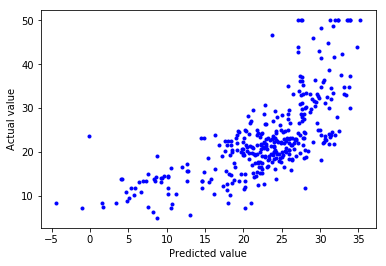

45.565571569830574
22.78278578491529


In [14]:
# ================= Plotting hypothesis value vs actual value for train set=========
h = x_train.dot(theta.T)
plt.plot(h, y_train, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

print(mean_squared_error(h, y_train))
print(cost_function(x_train, y_train, theta))

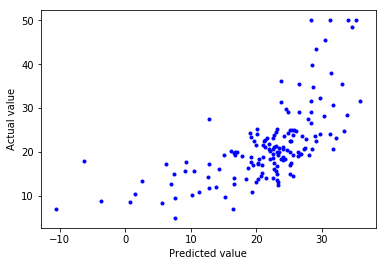

48.40429450169816
24.202147250849077


In [15]:
# =============== Plotting hypothesis value vs actual value for test set =======

plt.plot(y_pred, y_test, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

print(mean_squared_error(y_pred, y_test))
print(cost_function(x_test, y_test, theta))

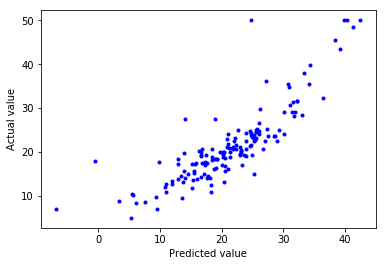

0.7109203586326183
21.540218943932437


In [16]:
# ============= COMPARING WITH SKLEARN'S LINEAR REGRESSION MODEL ===============

lm = LinearRegression()
lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)

plt.plot(y_predict, y_test, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

print(lm.score(x_test, y_test))
print(mean_squared_error(y_test, y_predict))

### Comparing error acheived by our algorithm with the inbuilt library for linear regression, we see there is a difference between the models.